In [3]:
import torch
import numpy as np

from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split


In [4]:


device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

class SineApproximator(nn.Module):
    def __init__(self):
        super(SineApproximator, self).__init__()
        self.regressor = nn.Sequential(nn.Linear(1, 190),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(190, 1))
    def forward(self, x):
        output = self.regressor(x)
        return output



In [5]:
class SineApproximator2(nn.Module):
    def __init__(self):
        super(SineApproximator2, self).__init__()
        self.regressor = nn.Sequential(nn.Linear(1, 5),
                                       nn.ReLU(inplace=True),
                                        nn.Linear(5, 10),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(10, 10),
                                       nn.ReLU(inplace=True),
                                    nn.Linear(10, 10),
                                       nn.ReLU(inplace=True),
                                     nn.Linear(10, 10),
                                       nn.ReLU(inplace=True),
                                     nn.Linear(10, 10),
                                       nn.ReLU(inplace=True),
                                     nn.Linear(10, 5),
                                       nn.ReLU(inplace=True),
                                     nn.Linear(5, 1))
        
    def forward(self, x):
        output = self.regressor(x)
        return output


In [6]:
class SineApproximator3(nn.Module):
    def __init__(self):
        super(SineApproximator3, self).__init__()
        self.regressor = nn.Sequential(nn.Linear(1, 10),
                                       nn.ReLU(inplace=True),
                                        nn.Linear(10, 18),
                                       nn.ReLU(inplace=True),
                                       nn.Linear(18, 15),
                                       nn.ReLU(inplace=True),
                                    nn.Linear(15, 4),
                                       nn.ReLU(inplace=True),
                                     nn.Linear(4, 1))
        
    def forward(self, x):
        output = self.regressor(x)
        return output



(2500,)


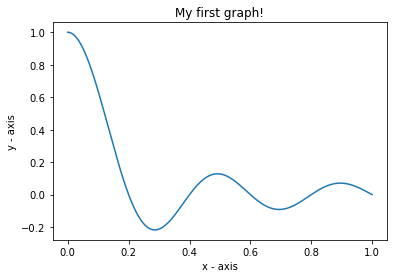

In [7]:
step = 0.1
X = np.linspace(1e-4, 1, 2500) 
print(X.shape)
#X = np.random.rand(10**5) * 2 * np.pi
y = np.sin(5*np.pi*X) / (5*np.pi*X)
#print(X[:100])
#print(y)

import matplotlib.pyplot as plt
#print(val_x.shape, val_y.shape)
plt.plot(X, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('My first graph!')
 
# function to show the plot
plt.show()

In [11]:
LR = 1e-4
MAX_EPOCH = 20000
BATCH_SIZE = 512

X_train, X_val, y_train, y_val = map(torch.tensor, train_test_split(X, y, test_size=0.2))
#X_train=torch.tensor(X)
#y_train=torch.tensor(y)
train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=BATCH_SIZE,
                              pin_memory=True, shuffle=True)
val_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=BATCH_SIZE,
                            pin_memory=True, shuffle=True)





In [12]:
def returnLossPredictedOp(model, train_dataloader, val_dataloader):
    optimizer = optim.Adam(model.parameters(), lr=LR)
    criterion = nn.MSELoss()
    
    # training loop
    train_loss_list = list()
    val_loss_list = list()
    actual_x=[]
    predicted_y=[]
    org_y=[]
    for epoch in range(MAX_EPOCH):
        print("epoch %d / %d" % (epoch+1, MAX_EPOCH))
        model.train()
        actual_x=[]
        predicted_y=[]
        org_y=[]
        # training loop
        temp_loss_list = list()
        for X_train, y_train in train_dataloader:
            X_train = X_train.type(torch.float32).to(device)
            y_train = y_train.type(torch.float32).to(device)

            optimizer.zero_grad()

            score = model(X_train)

            actual_x.append(X_train.detach().cpu().numpy())
            predicted_y.append(score.detach().cpu().numpy())
            org_y.append(y_train.detach().cpu().numpy())

            loss = criterion(input=score, target=y_train)
            #loss.requires_grad = True
            loss.backward()

            optimizer.step()

            temp_loss_list.append(loss.detach().cpu().numpy())

        train_loss_list.append(np.average(temp_loss_list))

        # validation
        model.eval()

        temp_loss_list = list()

        for X_val, y_val in val_dataloader:
            X_val = X_val.type(torch.float32).to(device)
            y_val = y_val.type(torch.float32).to(device)

            score = model(X_val)        
            loss = criterion(input=score, target=y_val)

            temp_loss_list.append(loss.detach().cpu().numpy())

        val_loss_list.append(np.average(temp_loss_list))

        print("\ttrain loss: %.5f" % train_loss_list[-1])
        print("\tval loss: %.5f" % val_loss_list[-1])
    
    return actual_x, org_y, predicted_y, train_loss_list, val_loss_list




In [13]:
model1 = SineApproximator().to(device)
ac_x_1, ac_y_1, p_y_1, t_ls_1, v_ls_1 = returnLossPredictedOp(model1, train_dataloader, val_dataloader)

epoch 1 / 20000
	train loss: 0.20868
	val loss: 0.18907
epoch 2 / 20000
	train loss: 0.19330
	val loss: 0.17405
epoch 3 / 20000
	train loss: 0.17974
	val loss: 0.16059
epoch 4 / 20000
	train loss: 0.16794
	val loss: 0.14870
epoch 5 / 20000
	train loss: 0.15745
	val loss: 0.13846
epoch 6 / 20000
	train loss: 0.14826
	val loss: 0.12971
epoch 7 / 20000
	train loss: 0.14182
	val loss: 0.12228
epoch 8 / 20000
	train loss: 0.13503
	val loss: 0.11611
epoch 9 / 20000
	train loss: 0.12983
	val loss: 0.11099
epoch 10 / 20000
	train loss: 0.12545
	val loss: 0.10677
epoch 11 / 20000
	train loss: 0.12188
	val loss: 0.10325
epoch 12 / 20000
	train loss: 0.11854
	val loss: 0.10029
epoch 13 / 20000
	train loss: 0.11614
	val loss: 0.09774
epoch 14 / 20000
	train loss: 0.11394
	val loss: 0.09553
epoch 15 / 20000
	train loss: 0.11213
	val loss: 0.09357
epoch 16 / 20000
	train loss: 0.10972
	val loss: 0.09179
epoch 17 / 20000
	train loss: 0.10841
	val loss: 0.09016
epoch 18 / 20000
	train loss: 0.10642
	v

	train loss: 0.05248
	val loss: 0.04652
epoch 149 / 20000
	train loss: 0.05231
	val loss: 0.04642
epoch 150 / 20000
	train loss: 0.05222
	val loss: 0.04632
epoch 151 / 20000
	train loss: 0.05219
	val loss: 0.04622
epoch 152 / 20000
	train loss: 0.05216
	val loss: 0.04613
epoch 153 / 20000
	train loss: 0.05186
	val loss: 0.04602
epoch 154 / 20000
	train loss: 0.05189
	val loss: 0.04593
epoch 155 / 20000
	train loss: 0.05169
	val loss: 0.04584
epoch 156 / 20000
	train loss: 0.05167
	val loss: 0.04574
epoch 157 / 20000
	train loss: 0.05145
	val loss: 0.04566
epoch 158 / 20000
	train loss: 0.05141
	val loss: 0.04557
epoch 159 / 20000
	train loss: 0.05138
	val loss: 0.04546
epoch 160 / 20000
	train loss: 0.05120
	val loss: 0.04537
epoch 161 / 20000
	train loss: 0.05096
	val loss: 0.04528
epoch 162 / 20000
	train loss: 0.05085
	val loss: 0.04519
epoch 163 / 20000
	train loss: 0.05066
	val loss: 0.04508
epoch 164 / 20000
	train loss: 0.05062
	val loss: 0.04498
epoch 165 / 20000
	train loss: 0

	train loss: 0.03658
	val loss: 0.03288
epoch 306 / 20000
	train loss: 0.03642
	val loss: 0.03280
epoch 307 / 20000
	train loss: 0.03642
	val loss: 0.03274
epoch 308 / 20000
	train loss: 0.03635
	val loss: 0.03267
epoch 309 / 20000
	train loss: 0.03637
	val loss: 0.03260
epoch 310 / 20000
	train loss: 0.03609
	val loss: 0.03253
epoch 311 / 20000
	train loss: 0.03608
	val loss: 0.03246
epoch 312 / 20000
	train loss: 0.03595
	val loss: 0.03240
epoch 313 / 20000
	train loss: 0.03584
	val loss: 0.03232
epoch 314 / 20000
	train loss: 0.03581
	val loss: 0.03226
epoch 315 / 20000
	train loss: 0.03579
	val loss: 0.03220
epoch 316 / 20000
	train loss: 0.03569
	val loss: 0.03213
epoch 317 / 20000
	train loss: 0.03544
	val loss: 0.03205
epoch 318 / 20000
	train loss: 0.03549
	val loss: 0.03198
epoch 319 / 20000
	train loss: 0.03542
	val loss: 0.03190
epoch 320 / 20000
	train loss: 0.03536
	val loss: 0.03184
epoch 321 / 20000
	train loss: 0.03524
	val loss: 0.03177
epoch 322 / 20000
	train loss: 0

	train loss: 0.02551
	val loss: 0.02344
epoch 461 / 20000
	train loss: 0.02536
	val loss: 0.02339
epoch 462 / 20000
	train loss: 0.02532
	val loss: 0.02333
epoch 463 / 20000
	train loss: 0.02519
	val loss: 0.02327
epoch 464 / 20000
	train loss: 0.02515
	val loss: 0.02321
epoch 465 / 20000
	train loss: 0.02510
	val loss: 0.02316
epoch 466 / 20000
	train loss: 0.02505
	val loss: 0.02311
epoch 467 / 20000
	train loss: 0.02503
	val loss: 0.02305
epoch 468 / 20000
	train loss: 0.02487
	val loss: 0.02298
epoch 469 / 20000
	train loss: 0.02490
	val loss: 0.02293
epoch 470 / 20000
	train loss: 0.02482
	val loss: 0.02287
epoch 471 / 20000
	train loss: 0.02474
	val loss: 0.02281
epoch 472 / 20000
	train loss: 0.02467
	val loss: 0.02275
epoch 473 / 20000
	train loss: 0.02465
	val loss: 0.02270
epoch 474 / 20000
	train loss: 0.02451
	val loss: 0.02264
epoch 475 / 20000
	train loss: 0.02454
	val loss: 0.02260
epoch 476 / 20000
	train loss: 0.02442
	val loss: 0.02254
epoch 477 / 20000
	train loss: 0

	train loss: 0.01672
	val loss: 0.01576
epoch 614 / 20000
	train loss: 0.01668
	val loss: 0.01572
epoch 615 / 20000
	train loss: 0.01663
	val loss: 0.01568
epoch 616 / 20000
	train loss: 0.01659
	val loss: 0.01564
epoch 617 / 20000
	train loss: 0.01654
	val loss: 0.01560
epoch 618 / 20000
	train loss: 0.01652
	val loss: 0.01557
epoch 619 / 20000
	train loss: 0.01645
	val loss: 0.01553
epoch 620 / 20000
	train loss: 0.01639
	val loss: 0.01548
epoch 621 / 20000
	train loss: 0.01635
	val loss: 0.01544
epoch 622 / 20000
	train loss: 0.01633
	val loss: 0.01541
epoch 623 / 20000
	train loss: 0.01628
	val loss: 0.01536
epoch 624 / 20000
	train loss: 0.01623
	val loss: 0.01533
epoch 625 / 20000
	train loss: 0.01620
	val loss: 0.01529
epoch 626 / 20000
	train loss: 0.01616
	val loss: 0.01524
epoch 627 / 20000
	train loss: 0.01608
	val loss: 0.01520
epoch 628 / 20000
	train loss: 0.01605
	val loss: 0.01517
epoch 629 / 20000
	train loss: 0.01600
	val loss: 0.01513
epoch 630 / 20000
	train loss: 0

	train loss: 0.01115
	val loss: 0.01085
epoch 766 / 20000
	train loss: 0.01111
	val loss: 0.01083
epoch 767 / 20000
	train loss: 0.01109
	val loss: 0.01081
epoch 768 / 20000
	train loss: 0.01108
	val loss: 0.01078
epoch 769 / 20000
	train loss: 0.01105
	val loss: 0.01076
epoch 770 / 20000
	train loss: 0.01102
	val loss: 0.01073
epoch 771 / 20000
	train loss: 0.01100
	val loss: 0.01070
epoch 772 / 20000
	train loss: 0.01095
	val loss: 0.01068
epoch 773 / 20000
	train loss: 0.01095
	val loss: 0.01066
epoch 774 / 20000
	train loss: 0.01090
	val loss: 0.01063
epoch 775 / 20000
	train loss: 0.01086
	val loss: 0.01061
epoch 776 / 20000
	train loss: 0.01084
	val loss: 0.01058
epoch 777 / 20000
	train loss: 0.01082
	val loss: 0.01055
epoch 778 / 20000
	train loss: 0.01080
	val loss: 0.01053
epoch 779 / 20000
	train loss: 0.01075
	val loss: 0.01051
epoch 780 / 20000
	train loss: 0.01075
	val loss: 0.01049
epoch 781 / 20000
	train loss: 0.01071
	val loss: 0.01046
epoch 782 / 20000
	train loss: 0

	train loss: 0.00784
	val loss: 0.00789
epoch 917 / 20000
	train loss: 0.00783
	val loss: 0.00787
epoch 918 / 20000
	train loss: 0.00780
	val loss: 0.00786
epoch 919 / 20000
	train loss: 0.00779
	val loss: 0.00784
epoch 920 / 20000
	train loss: 0.00778
	val loss: 0.00783
epoch 921 / 20000
	train loss: 0.00776
	val loss: 0.00781
epoch 922 / 20000
	train loss: 0.00775
	val loss: 0.00780
epoch 923 / 20000
	train loss: 0.00774
	val loss: 0.00778
epoch 924 / 20000
	train loss: 0.00773
	val loss: 0.00777
epoch 925 / 20000
	train loss: 0.00770
	val loss: 0.00775
epoch 926 / 20000
	train loss: 0.00769
	val loss: 0.00774
epoch 927 / 20000
	train loss: 0.00766
	val loss: 0.00773
epoch 928 / 20000
	train loss: 0.00765
	val loss: 0.00771
epoch 929 / 20000
	train loss: 0.00763
	val loss: 0.00770
epoch 930 / 20000
	train loss: 0.00763
	val loss: 0.00768
epoch 931 / 20000
	train loss: 0.00761
	val loss: 0.00767
epoch 932 / 20000
	train loss: 0.00759
	val loss: 0.00766
epoch 933 / 20000
	train loss: 0

	train loss: 0.00588
	val loss: 0.00605
epoch 1077 / 20000
	train loss: 0.00588
	val loss: 0.00605
epoch 1078 / 20000
	train loss: 0.00586
	val loss: 0.00604
epoch 1079 / 20000
	train loss: 0.00586
	val loss: 0.00603
epoch 1080 / 20000
	train loss: 0.00584
	val loss: 0.00602
epoch 1081 / 20000
	train loss: 0.00585
	val loss: 0.00601
epoch 1082 / 20000
	train loss: 0.00583
	val loss: 0.00600
epoch 1083 / 20000
	train loss: 0.00581
	val loss: 0.00599
epoch 1084 / 20000
	train loss: 0.00580
	val loss: 0.00599
epoch 1085 / 20000
	train loss: 0.00580
	val loss: 0.00598
epoch 1086 / 20000
	train loss: 0.00579
	val loss: 0.00597
epoch 1087 / 20000
	train loss: 0.00579
	val loss: 0.00596
epoch 1088 / 20000
	train loss: 0.00577
	val loss: 0.00595
epoch 1089 / 20000
	train loss: 0.00576
	val loss: 0.00594
epoch 1090 / 20000
	train loss: 0.00576
	val loss: 0.00594
epoch 1091 / 20000
	train loss: 0.00576
	val loss: 0.00593
epoch 1092 / 20000
	train loss: 0.00574
	val loss: 0.00593
epoch 1093 / 200

	train loss: 0.00476
	val loss: 0.00494
epoch 1234 / 20000
	train loss: 0.00475
	val loss: 0.00493
epoch 1235 / 20000
	train loss: 0.00474
	val loss: 0.00493
epoch 1236 / 20000
	train loss: 0.00475
	val loss: 0.00492
epoch 1237 / 20000
	train loss: 0.00474
	val loss: 0.00492
epoch 1238 / 20000
	train loss: 0.00473
	val loss: 0.00491
epoch 1239 / 20000
	train loss: 0.00473
	val loss: 0.00490
epoch 1240 / 20000
	train loss: 0.00472
	val loss: 0.00490
epoch 1241 / 20000
	train loss: 0.00471
	val loss: 0.00489
epoch 1242 / 20000
	train loss: 0.00471
	val loss: 0.00489
epoch 1243 / 20000
	train loss: 0.00470
	val loss: 0.00488
epoch 1244 / 20000
	train loss: 0.00469
	val loss: 0.00488
epoch 1245 / 20000
	train loss: 0.00469
	val loss: 0.00487
epoch 1246 / 20000
	train loss: 0.00469
	val loss: 0.00486
epoch 1247 / 20000
	train loss: 0.00469
	val loss: 0.00486
epoch 1248 / 20000
	train loss: 0.00467
	val loss: 0.00485
epoch 1249 / 20000
	train loss: 0.00467
	val loss: 0.00485
epoch 1250 / 200

	train loss: 0.00395
	val loss: 0.00411
epoch 1392 / 20000
	train loss: 0.00393
	val loss: 0.00410
epoch 1393 / 20000
	train loss: 0.00393
	val loss: 0.00410
epoch 1394 / 20000
	train loss: 0.00394
	val loss: 0.00409
epoch 1395 / 20000
	train loss: 0.00394
	val loss: 0.00409
epoch 1396 / 20000
	train loss: 0.00392
	val loss: 0.00408
epoch 1397 / 20000
	train loss: 0.00392
	val loss: 0.00408
epoch 1398 / 20000
	train loss: 0.00391
	val loss: 0.00407
epoch 1399 / 20000
	train loss: 0.00391
	val loss: 0.00407
epoch 1400 / 20000
	train loss: 0.00392
	val loss: 0.00407
epoch 1401 / 20000
	train loss: 0.00390
	val loss: 0.00406
epoch 1402 / 20000
	train loss: 0.00390
	val loss: 0.00406
epoch 1403 / 20000
	train loss: 0.00390
	val loss: 0.00405
epoch 1404 / 20000
	train loss: 0.00389
	val loss: 0.00404
epoch 1405 / 20000
	train loss: 0.00387
	val loss: 0.00404
epoch 1406 / 20000
	train loss: 0.00388
	val loss: 0.00404
epoch 1407 / 20000
	train loss: 0.00387
	val loss: 0.00403
epoch 1408 / 200

	train loss: 0.00327
	val loss: 0.00340
epoch 1550 / 20000
	train loss: 0.00327
	val loss: 0.00340
epoch 1551 / 20000
	train loss: 0.00326
	val loss: 0.00339
epoch 1552 / 20000
	train loss: 0.00326
	val loss: 0.00339
epoch 1553 / 20000
	train loss: 0.00325
	val loss: 0.00338
epoch 1554 / 20000
	train loss: 0.00325
	val loss: 0.00338
epoch 1555 / 20000
	train loss: 0.00325
	val loss: 0.00338
epoch 1556 / 20000
	train loss: 0.00324
	val loss: 0.00337
epoch 1557 / 20000
	train loss: 0.00324
	val loss: 0.00337
epoch 1558 / 20000
	train loss: 0.00324
	val loss: 0.00336
epoch 1559 / 20000
	train loss: 0.00323
	val loss: 0.00336
epoch 1560 / 20000
	train loss: 0.00323
	val loss: 0.00336
epoch 1561 / 20000
	train loss: 0.00322
	val loss: 0.00335
epoch 1562 / 20000
	train loss: 0.00323
	val loss: 0.00335
epoch 1563 / 20000
	train loss: 0.00322
	val loss: 0.00334
epoch 1564 / 20000
	train loss: 0.00321
	val loss: 0.00334
epoch 1565 / 20000
	train loss: 0.00321
	val loss: 0.00334
epoch 1566 / 200

	train loss: 0.00273
	val loss: 0.00283
epoch 1697 / 20000
	train loss: 0.00272
	val loss: 0.00282
epoch 1698 / 20000
	train loss: 0.00272
	val loss: 0.00283
epoch 1699 / 20000
	train loss: 0.00272
	val loss: 0.00282
epoch 1700 / 20000
	train loss: 0.00272
	val loss: 0.00281
epoch 1701 / 20000
	train loss: 0.00270
	val loss: 0.00281
epoch 1702 / 20000
	train loss: 0.00270
	val loss: 0.00281
epoch 1703 / 20000
	train loss: 0.00270
	val loss: 0.00280
epoch 1704 / 20000
	train loss: 0.00270
	val loss: 0.00280
epoch 1705 / 20000
	train loss: 0.00270
	val loss: 0.00279
epoch 1706 / 20000
	train loss: 0.00270
	val loss: 0.00279
epoch 1707 / 20000
	train loss: 0.00269
	val loss: 0.00279
epoch 1708 / 20000
	train loss: 0.00269
	val loss: 0.00278
epoch 1709 / 20000
	train loss: 0.00269
	val loss: 0.00278
epoch 1710 / 20000
	train loss: 0.00268
	val loss: 0.00278
epoch 1711 / 20000
	train loss: 0.00269
	val loss: 0.00277
epoch 1712 / 20000
	train loss: 0.00267
	val loss: 0.00277
epoch 1713 / 200

	train loss: 0.00226
	val loss: 0.00233
epoch 1845 / 20000
	train loss: 0.00226
	val loss: 0.00232
epoch 1846 / 20000
	train loss: 0.00225
	val loss: 0.00232
epoch 1847 / 20000
	train loss: 0.00225
	val loss: 0.00232
epoch 1848 / 20000
	train loss: 0.00225
	val loss: 0.00232
epoch 1849 / 20000
	train loss: 0.00224
	val loss: 0.00231
epoch 1850 / 20000
	train loss: 0.00224
	val loss: 0.00231
epoch 1851 / 20000
	train loss: 0.00224
	val loss: 0.00231
epoch 1852 / 20000
	train loss: 0.00223
	val loss: 0.00230
epoch 1853 / 20000
	train loss: 0.00223
	val loss: 0.00230
epoch 1854 / 20000
	train loss: 0.00223
	val loss: 0.00230
epoch 1855 / 20000
	train loss: 0.00222
	val loss: 0.00230
epoch 1856 / 20000
	train loss: 0.00222
	val loss: 0.00229
epoch 1857 / 20000
	train loss: 0.00222
	val loss: 0.00229
epoch 1858 / 20000
	train loss: 0.00222
	val loss: 0.00229
epoch 1859 / 20000
	train loss: 0.00222
	val loss: 0.00228
epoch 1860 / 20000
	train loss: 0.00221
	val loss: 0.00228
epoch 1861 / 200

	train loss: 0.00185
	val loss: 0.00190
epoch 1995 / 20000
	train loss: 0.00185
	val loss: 0.00190
epoch 1996 / 20000
	train loss: 0.00185
	val loss: 0.00189
epoch 1997 / 20000
	train loss: 0.00185
	val loss: 0.00189
epoch 1998 / 20000
	train loss: 0.00184
	val loss: 0.00189
epoch 1999 / 20000
	train loss: 0.00184
	val loss: 0.00188
epoch 2000 / 20000
	train loss: 0.00184
	val loss: 0.00188
epoch 2001 / 20000
	train loss: 0.00184
	val loss: 0.00188
epoch 2002 / 20000
	train loss: 0.00183
	val loss: 0.00188
epoch 2003 / 20000
	train loss: 0.00183
	val loss: 0.00188
epoch 2004 / 20000
	train loss: 0.00183
	val loss: 0.00187
epoch 2005 / 20000
	train loss: 0.00183
	val loss: 0.00187
epoch 2006 / 20000
	train loss: 0.00183
	val loss: 0.00187
epoch 2007 / 20000
	train loss: 0.00182
	val loss: 0.00187
epoch 2008 / 20000
	train loss: 0.00182
	val loss: 0.00186
epoch 2009 / 20000
	train loss: 0.00182
	val loss: 0.00186
epoch 2010 / 20000
	train loss: 0.00182
	val loss: 0.00186
epoch 2011 / 200

	train loss: 0.00152
	val loss: 0.00155
epoch 2145 / 20000
	train loss: 0.00151
	val loss: 0.00154
epoch 2146 / 20000
	train loss: 0.00152
	val loss: 0.00154
epoch 2147 / 20000
	train loss: 0.00152
	val loss: 0.00154
epoch 2148 / 20000
	train loss: 0.00152
	val loss: 0.00154
epoch 2149 / 20000
	train loss: 0.00151
	val loss: 0.00153
epoch 2150 / 20000
	train loss: 0.00151
	val loss: 0.00153
epoch 2151 / 20000
	train loss: 0.00151
	val loss: 0.00153
epoch 2152 / 20000
	train loss: 0.00151
	val loss: 0.00153
epoch 2153 / 20000
	train loss: 0.00150
	val loss: 0.00153
epoch 2154 / 20000
	train loss: 0.00150
	val loss: 0.00152
epoch 2155 / 20000
	train loss: 0.00150
	val loss: 0.00152
epoch 2156 / 20000
	train loss: 0.00150
	val loss: 0.00152
epoch 2157 / 20000
	train loss: 0.00150
	val loss: 0.00152
epoch 2158 / 20000
	train loss: 0.00149
	val loss: 0.00151
epoch 2159 / 20000
	train loss: 0.00149
	val loss: 0.00151
epoch 2160 / 20000
	train loss: 0.00149
	val loss: 0.00151
epoch 2161 / 200

	train loss: 0.00126
	val loss: 0.00126
epoch 2290 / 20000
	train loss: 0.00126
	val loss: 0.00126
epoch 2291 / 20000
	train loss: 0.00125
	val loss: 0.00126
epoch 2292 / 20000
	train loss: 0.00125
	val loss: 0.00126
epoch 2293 / 20000
	train loss: 0.00125
	val loss: 0.00125
epoch 2294 / 20000
	train loss: 0.00125
	val loss: 0.00125
epoch 2295 / 20000
	train loss: 0.00125
	val loss: 0.00125
epoch 2296 / 20000
	train loss: 0.00124
	val loss: 0.00125
epoch 2297 / 20000
	train loss: 0.00124
	val loss: 0.00125
epoch 2298 / 20000
	train loss: 0.00124
	val loss: 0.00124
epoch 2299 / 20000
	train loss: 0.00125
	val loss: 0.00124
epoch 2300 / 20000
	train loss: 0.00125
	val loss: 0.00125
epoch 2301 / 20000
	train loss: 0.00124
	val loss: 0.00124
epoch 2302 / 20000
	train loss: 0.00124
	val loss: 0.00124
epoch 2303 / 20000
	train loss: 0.00124
	val loss: 0.00123
epoch 2304 / 20000
	train loss: 0.00124
	val loss: 0.00123
epoch 2305 / 20000
	train loss: 0.00123
	val loss: 0.00123
epoch 2306 / 200

	train loss: 0.00104
	val loss: 0.00102
epoch 2443 / 20000
	train loss: 0.00104
	val loss: 0.00102
epoch 2444 / 20000
	train loss: 0.00103
	val loss: 0.00102
epoch 2445 / 20000
	train loss: 0.00104
	val loss: 0.00102
epoch 2446 / 20000
	train loss: 0.00104
	val loss: 0.00102
epoch 2447 / 20000
	train loss: 0.00103
	val loss: 0.00102
epoch 2448 / 20000
	train loss: 0.00104
	val loss: 0.00101
epoch 2449 / 20000
	train loss: 0.00103
	val loss: 0.00101
epoch 2450 / 20000
	train loss: 0.00103
	val loss: 0.00101
epoch 2451 / 20000
	train loss: 0.00103
	val loss: 0.00101
epoch 2452 / 20000
	train loss: 0.00103
	val loss: 0.00101
epoch 2453 / 20000
	train loss: 0.00103
	val loss: 0.00101
epoch 2454 / 20000
	train loss: 0.00102
	val loss: 0.00101
epoch 2455 / 20000
	train loss: 0.00103
	val loss: 0.00100
epoch 2456 / 20000
	train loss: 0.00102
	val loss: 0.00100
epoch 2457 / 20000
	train loss: 0.00102
	val loss: 0.00100
epoch 2458 / 20000
	train loss: 0.00101
	val loss: 0.00100
epoch 2459 / 200

	train loss: 0.00087
	val loss: 0.00084
epoch 2598 / 20000
	train loss: 0.00087
	val loss: 0.00084
epoch 2599 / 20000
	train loss: 0.00087
	val loss: 0.00084
epoch 2600 / 20000
	train loss: 0.00087
	val loss: 0.00083
epoch 2601 / 20000
	train loss: 0.00087
	val loss: 0.00083
epoch 2602 / 20000
	train loss: 0.00086
	val loss: 0.00083
epoch 2603 / 20000
	train loss: 0.00086
	val loss: 0.00083
epoch 2604 / 20000
	train loss: 0.00086
	val loss: 0.00083
epoch 2605 / 20000
	train loss: 0.00086
	val loss: 0.00083
epoch 2606 / 20000
	train loss: 0.00086
	val loss: 0.00083
epoch 2607 / 20000
	train loss: 0.00086
	val loss: 0.00083
epoch 2608 / 20000
	train loss: 0.00086
	val loss: 0.00083
epoch 2609 / 20000
	train loss: 0.00086
	val loss: 0.00083
epoch 2610 / 20000
	train loss: 0.00086
	val loss: 0.00082
epoch 2611 / 20000
	train loss: 0.00086
	val loss: 0.00082
epoch 2612 / 20000
	train loss: 0.00086
	val loss: 0.00082
epoch 2613 / 20000
	train loss: 0.00086
	val loss: 0.00082
epoch 2614 / 200

	train loss: 0.00075
	val loss: 0.00070
epoch 2757 / 20000
	train loss: 0.00075
	val loss: 0.00070
epoch 2758 / 20000
	train loss: 0.00075
	val loss: 0.00070
epoch 2759 / 20000
	train loss: 0.00075
	val loss: 0.00070
epoch 2760 / 20000
	train loss: 0.00074
	val loss: 0.00070
epoch 2761 / 20000
	train loss: 0.00074
	val loss: 0.00070
epoch 2762 / 20000
	train loss: 0.00074
	val loss: 0.00069
epoch 2763 / 20000
	train loss: 0.00074
	val loss: 0.00069
epoch 2764 / 20000
	train loss: 0.00074
	val loss: 0.00069
epoch 2765 / 20000
	train loss: 0.00074
	val loss: 0.00069
epoch 2766 / 20000
	train loss: 0.00074
	val loss: 0.00069
epoch 2767 / 20000
	train loss: 0.00074
	val loss: 0.00069
epoch 2768 / 20000
	train loss: 0.00073
	val loss: 0.00069
epoch 2769 / 20000
	train loss: 0.00074
	val loss: 0.00069
epoch 2770 / 20000
	train loss: 0.00073
	val loss: 0.00069
epoch 2771 / 20000
	train loss: 0.00073
	val loss: 0.00069
epoch 2772 / 20000
	train loss: 0.00073
	val loss: 0.00069
epoch 2773 / 200

	train loss: 0.00065
	val loss: 0.00060
epoch 2913 / 20000
	train loss: 0.00065
	val loss: 0.00060
epoch 2914 / 20000
	train loss: 0.00065
	val loss: 0.00060
epoch 2915 / 20000
	train loss: 0.00065
	val loss: 0.00060
epoch 2916 / 20000
	train loss: 0.00065
	val loss: 0.00059
epoch 2917 / 20000
	train loss: 0.00065
	val loss: 0.00059
epoch 2918 / 20000
	train loss: 0.00065
	val loss: 0.00059
epoch 2919 / 20000
	train loss: 0.00065
	val loss: 0.00059
epoch 2920 / 20000
	train loss: 0.00065
	val loss: 0.00059
epoch 2921 / 20000
	train loss: 0.00065
	val loss: 0.00059
epoch 2922 / 20000
	train loss: 0.00065
	val loss: 0.00059
epoch 2923 / 20000
	train loss: 0.00065
	val loss: 0.00059
epoch 2924 / 20000
	train loss: 0.00065
	val loss: 0.00059
epoch 2925 / 20000
	train loss: 0.00065
	val loss: 0.00059
epoch 2926 / 20000
	train loss: 0.00065
	val loss: 0.00059
epoch 2927 / 20000
	train loss: 0.00064
	val loss: 0.00059
epoch 2928 / 20000
	train loss: 0.00065
	val loss: 0.00059
epoch 2929 / 200

	train loss: 0.00059
	val loss: 0.00053
epoch 3061 / 20000
	train loss: 0.00059
	val loss: 0.00053
epoch 3062 / 20000
	train loss: 0.00059
	val loss: 0.00053
epoch 3063 / 20000
	train loss: 0.00060
	val loss: 0.00053
epoch 3064 / 20000
	train loss: 0.00060
	val loss: 0.00053
epoch 3065 / 20000
	train loss: 0.00059
	val loss: 0.00053
epoch 3066 / 20000
	train loss: 0.00060
	val loss: 0.00053
epoch 3067 / 20000
	train loss: 0.00059
	val loss: 0.00053
epoch 3068 / 20000
	train loss: 0.00060
	val loss: 0.00053
epoch 3069 / 20000
	train loss: 0.00059
	val loss: 0.00053
epoch 3070 / 20000
	train loss: 0.00059
	val loss: 0.00053
epoch 3071 / 20000
	train loss: 0.00059
	val loss: 0.00053
epoch 3072 / 20000
	train loss: 0.00059
	val loss: 0.00053
epoch 3073 / 20000
	train loss: 0.00059
	val loss: 0.00053
epoch 3074 / 20000
	train loss: 0.00059
	val loss: 0.00053
epoch 3075 / 20000
	train loss: 0.00059
	val loss: 0.00052
epoch 3076 / 20000
	train loss: 0.00059
	val loss: 0.00052
epoch 3077 / 200

	train loss: 0.00055
	val loss: 0.00049
epoch 3208 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3209 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3210 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3211 / 20000
	train loss: 0.00056
	val loss: 0.00048
epoch 3212 / 20000
	train loss: 0.00056
	val loss: 0.00049
epoch 3213 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3214 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3215 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3216 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3217 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3218 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3219 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3220 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3221 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3222 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3223 / 20000
	train loss: 0.00055
	val loss: 0.00048
epoch 3224 / 200

	train loss: 0.00053
	val loss: 0.00045
epoch 3363 / 20000
	train loss: 0.00053
	val loss: 0.00045
epoch 3364 / 20000
	train loss: 0.00052
	val loss: 0.00045
epoch 3365 / 20000
	train loss: 0.00053
	val loss: 0.00045
epoch 3366 / 20000
	train loss: 0.00052
	val loss: 0.00045
epoch 3367 / 20000
	train loss: 0.00053
	val loss: 0.00045
epoch 3368 / 20000
	train loss: 0.00053
	val loss: 0.00045
epoch 3369 / 20000
	train loss: 0.00052
	val loss: 0.00045
epoch 3370 / 20000
	train loss: 0.00052
	val loss: 0.00045
epoch 3371 / 20000
	train loss: 0.00052
	val loss: 0.00045
epoch 3372 / 20000
	train loss: 0.00052
	val loss: 0.00045
epoch 3373 / 20000
	train loss: 0.00052
	val loss: 0.00045
epoch 3374 / 20000
	train loss: 0.00052
	val loss: 0.00045
epoch 3375 / 20000
	train loss: 0.00053
	val loss: 0.00045
epoch 3376 / 20000
	train loss: 0.00052
	val loss: 0.00045
epoch 3377 / 20000
	train loss: 0.00052
	val loss: 0.00045
epoch 3378 / 20000
	train loss: 0.00052
	val loss: 0.00045
epoch 3379 / 200

	train loss: 0.00051
	val loss: 0.00043
epoch 3526 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3527 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3528 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3529 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3530 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3531 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3532 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3533 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3534 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3535 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3536 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3537 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3538 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3539 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3540 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3541 / 20000
	train loss: 0.00050
	val loss: 0.00043
epoch 3542 / 200

	train loss: 0.00049
	val loss: 0.00041
epoch 3688 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3689 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3690 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3691 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3692 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3693 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3694 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3695 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3696 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3697 / 20000
	train loss: 0.00048
	val loss: 0.00041
epoch 3698 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3699 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3700 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3701 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3702 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3703 / 20000
	train loss: 0.00049
	val loss: 0.00041
epoch 3704 / 200

	train loss: 0.00047
	val loss: 0.00039
epoch 3849 / 20000
	train loss: 0.00047
	val loss: 0.00039
epoch 3850 / 20000
	train loss: 0.00046
	val loss: 0.00039
epoch 3851 / 20000
	train loss: 0.00047
	val loss: 0.00039
epoch 3852 / 20000
	train loss: 0.00047
	val loss: 0.00039
epoch 3853 / 20000
	train loss: 0.00046
	val loss: 0.00039
epoch 3854 / 20000
	train loss: 0.00047
	val loss: 0.00039
epoch 3855 / 20000
	train loss: 0.00047
	val loss: 0.00039
epoch 3856 / 20000
	train loss: 0.00046
	val loss: 0.00039
epoch 3857 / 20000
	train loss: 0.00046
	val loss: 0.00039
epoch 3858 / 20000
	train loss: 0.00046
	val loss: 0.00039
epoch 3859 / 20000
	train loss: 0.00046
	val loss: 0.00039
epoch 3860 / 20000
	train loss: 0.00047
	val loss: 0.00039
epoch 3861 / 20000
	train loss: 0.00047
	val loss: 0.00040
epoch 3862 / 20000
	train loss: 0.00047
	val loss: 0.00040
epoch 3863 / 20000
	train loss: 0.00047
	val loss: 0.00039
epoch 3864 / 20000
	train loss: 0.00047
	val loss: 0.00039
epoch 3865 / 200

	train loss: 0.00045
	val loss: 0.00038
epoch 4001 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4002 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4003 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4004 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4005 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4006 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4007 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4008 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4009 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4010 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4011 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4012 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4013 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4014 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4015 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4016 / 20000
	train loss: 0.00045
	val loss: 0.00038
epoch 4017 / 200

	train loss: 0.00044
	val loss: 0.00037
epoch 4159 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4160 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4161 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4162 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4163 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4164 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4165 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4166 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4167 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4168 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4169 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4170 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4171 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4172 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4173 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4174 / 20000
	train loss: 0.00044
	val loss: 0.00037
epoch 4175 / 200

	train loss: 0.00043
	val loss: 0.00036
epoch 4311 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4312 / 20000
	train loss: 0.00044
	val loss: 0.00036
epoch 4313 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4314 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4315 / 20000
	train loss: 0.00044
	val loss: 0.00036
epoch 4316 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4317 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4318 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4319 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4320 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4321 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4322 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4323 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4324 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4325 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4326 / 20000
	train loss: 0.00043
	val loss: 0.00036
epoch 4327 / 200

	train loss: 0.00043
	val loss: 0.00035
epoch 4470 / 20000
	train loss: 0.00043
	val loss: 0.00035
epoch 4471 / 20000
	train loss: 0.00043
	val loss: 0.00035
epoch 4472 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4473 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4474 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4475 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4476 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4477 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4478 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4479 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4480 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4481 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4482 / 20000
	train loss: 0.00043
	val loss: 0.00035
epoch 4483 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4484 / 20000
	train loss: 0.00043
	val loss: 0.00035
epoch 4485 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4486 / 200

	train loss: 0.00042
	val loss: 0.00034
epoch 4628 / 20000
	train loss: 0.00042
	val loss: 0.00035
epoch 4629 / 20000
	train loss: 0.00042
	val loss: 0.00034
epoch 4630 / 20000
	train loss: 0.00042
	val loss: 0.00034
epoch 4631 / 20000
	train loss: 0.00042
	val loss: 0.00034
epoch 4632 / 20000
	train loss: 0.00042
	val loss: 0.00034
epoch 4633 / 20000
	train loss: 0.00042
	val loss: 0.00034
epoch 4634 / 20000
	train loss: 0.00042
	val loss: 0.00034
epoch 4635 / 20000
	train loss: 0.00042
	val loss: 0.00034
epoch 4636 / 20000
	train loss: 0.00042
	val loss: 0.00034
epoch 4637 / 20000
	train loss: 0.00042
	val loss: 0.00034
epoch 4638 / 20000
	train loss: 0.00042
	val loss: 0.00034
epoch 4639 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4640 / 20000
	train loss: 0.00042
	val loss: 0.00034
epoch 4641 / 20000
	train loss: 0.00042
	val loss: 0.00034
epoch 4642 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4643 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4644 / 200

	train loss: 0.00041
	val loss: 0.00034
epoch 4787 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4788 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4789 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4790 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4791 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4792 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4793 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4794 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4795 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4796 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4797 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4798 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4799 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4800 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4801 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4802 / 20000
	train loss: 0.00041
	val loss: 0.00034
epoch 4803 / 200

	train loss: 0.00040
	val loss: 0.00033
epoch 4939 / 20000
	train loss: 0.00041
	val loss: 0.00033
epoch 4940 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4941 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4942 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4943 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4944 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4945 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4946 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4947 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4948 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4949 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4950 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4951 / 20000
	train loss: 0.00041
	val loss: 0.00033
epoch 4952 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4953 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 4954 / 20000
	train loss: 0.00041
	val loss: 0.00033
epoch 4955 / 200

	train loss: 0.00040
	val loss: 0.00033
epoch 5098 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 5099 / 20000
	train loss: 0.00039
	val loss: 0.00033
epoch 5100 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 5101 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 5102 / 20000
	train loss: 0.00039
	val loss: 0.00033
epoch 5103 / 20000
	train loss: 0.00039
	val loss: 0.00033
epoch 5104 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 5105 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 5106 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 5107 / 20000
	train loss: 0.00039
	val loss: 0.00033
epoch 5108 / 20000
	train loss: 0.00039
	val loss: 0.00033
epoch 5109 / 20000
	train loss: 0.00039
	val loss: 0.00033
epoch 5110 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 5111 / 20000
	train loss: 0.00039
	val loss: 0.00033
epoch 5112 / 20000
	train loss: 0.00040
	val loss: 0.00032
epoch 5113 / 20000
	train loss: 0.00040
	val loss: 0.00033
epoch 5114 / 200

	train loss: 0.00039
	val loss: 0.00032
epoch 5257 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5258 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5259 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5260 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5261 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5262 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5263 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5264 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5265 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5266 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5267 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5268 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5269 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5270 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5271 / 20000
	train loss: 0.00039
	val loss: 0.00032
epoch 5272 / 20000
	train loss: 0.00039
	val loss: 0.00033
epoch 5273 / 200

	train loss: 0.00038
	val loss: 0.00031
epoch 5417 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5418 / 20000
	train loss: 0.00038
	val loss: 0.00032
epoch 5419 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5420 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5421 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5422 / 20000
	train loss: 0.00038
	val loss: 0.00032
epoch 5423 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5424 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5425 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5426 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5427 / 20000
	train loss: 0.00039
	val loss: 0.00031
epoch 5428 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5429 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5430 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5431 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5432 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5433 / 200

	train loss: 0.00037
	val loss: 0.00031
epoch 5576 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5577 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5578 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5579 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5580 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5581 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5582 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5583 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5584 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5585 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5586 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5587 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5588 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5589 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5590 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5591 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5592 / 200

	train loss: 0.00037
	val loss: 0.00031
epoch 5732 / 20000
	train loss: 0.00037
	val loss: 0.00031
epoch 5733 / 20000
	train loss: 0.00038
	val loss: 0.00031
epoch 5734 / 20000
	train loss: 0.00037
	val loss: 0.00031
epoch 5735 / 20000
	train loss: 0.00037
	val loss: 0.00031
epoch 5736 / 20000
	train loss: 0.00038
	val loss: 0.00030
epoch 5737 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5738 / 20000
	train loss: 0.00037
	val loss: 0.00031
epoch 5739 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5740 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5741 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5742 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5743 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5744 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5745 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5746 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5747 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5748 / 200

	train loss: 0.00037
	val loss: 0.00030
epoch 5892 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5893 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5894 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5895 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5896 / 20000
	train loss: 0.00036
	val loss: 0.00030
epoch 5897 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5898 / 20000
	train loss: 0.00036
	val loss: 0.00030
epoch 5899 / 20000
	train loss: 0.00036
	val loss: 0.00030
epoch 5900 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5901 / 20000
	train loss: 0.00036
	val loss: 0.00030
epoch 5902 / 20000
	train loss: 0.00036
	val loss: 0.00030
epoch 5903 / 20000
	train loss: 0.00036
	val loss: 0.00030
epoch 5904 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5905 / 20000
	train loss: 0.00036
	val loss: 0.00030
epoch 5906 / 20000
	train loss: 0.00036
	val loss: 0.00030
epoch 5907 / 20000
	train loss: 0.00037
	val loss: 0.00030
epoch 5908 / 200

	train loss: 0.00036
	val loss: 0.00029
epoch 6046 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6047 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6048 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6049 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6050 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6051 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6052 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6053 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6054 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6055 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6056 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6057 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6058 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6059 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6060 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6061 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6062 / 200

	train loss: 0.00036
	val loss: 0.00030
epoch 6204 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6205 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6206 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6207 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6208 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6209 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6210 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6211 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6212 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6213 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6214 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6215 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6216 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6217 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6218 / 20000
	train loss: 0.00036
	val loss: 0.00029
epoch 6219 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6220 / 200

	train loss: 0.00035
	val loss: 0.00029
epoch 6361 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6362 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6363 / 20000
	train loss: 0.00035
	val loss: 0.00028
epoch 6364 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6365 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6366 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6367 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6368 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6369 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6370 / 20000
	train loss: 0.00035
	val loss: 0.00029
epoch 6371 / 20000
	train loss: 0.00035
	val loss: 0.00028
epoch 6372 / 20000
	train loss: 0.00035
	val loss: 0.00028
epoch 6373 / 20000
	train loss: 0.00035
	val loss: 0.00028
epoch 6374 / 20000
	train loss: 0.00035
	val loss: 0.00028
epoch 6375 / 20000
	train loss: 0.00035
	val loss: 0.00028
epoch 6376 / 20000
	train loss: 0.00035
	val loss: 0.00028
epoch 6377 / 200

	train loss: 0.00034
	val loss: 0.00028
epoch 6516 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6517 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6518 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6519 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6520 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6521 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6522 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6523 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6524 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6525 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6526 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6527 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6528 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6529 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6530 / 20000
	train loss: 0.00035
	val loss: 0.00028
epoch 6531 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6532 / 200

	train loss: 0.00034
	val loss: 0.00028
epoch 6672 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6673 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6674 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6675 / 20000
	train loss: 0.00034
	val loss: 0.00028
epoch 6676 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6677 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6678 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6679 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6680 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6681 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6682 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6683 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6684 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6685 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6686 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6687 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6688 / 200

	train loss: 0.00033
	val loss: 0.00027
epoch 6812 / 20000
	train loss: 0.00034
	val loss: 0.00027
epoch 6813 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6814 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6815 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6816 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6817 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6818 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6819 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6820 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6821 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6822 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6823 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6824 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6825 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6826 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6827 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6828 / 200

	train loss: 0.00033
	val loss: 0.00027
epoch 6962 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6963 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6964 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6965 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6966 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6967 / 20000
	train loss: 0.00032
	val loss: 0.00027
epoch 6968 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6969 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6970 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6971 / 20000
	train loss: 0.00032
	val loss: 0.00027
epoch 6972 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6973 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6974 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6975 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6976 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6977 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 6978 / 200

	train loss: 0.00032
	val loss: 0.00026
epoch 7106 / 20000
	train loss: 0.00032
	val loss: 0.00027
epoch 7107 / 20000
	train loss: 0.00032
	val loss: 0.00027
epoch 7108 / 20000
	train loss: 0.00033
	val loss: 0.00027
epoch 7109 / 20000
	train loss: 0.00033
	val loss: 0.00026
epoch 7110 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7111 / 20000
	train loss: 0.00033
	val loss: 0.00026
epoch 7112 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7113 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7114 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7115 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7116 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7117 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7118 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7119 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7120 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7121 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7122 / 200

	train loss: 0.00032
	val loss: 0.00026
epoch 7259 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7260 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7261 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7262 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7263 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7264 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7265 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7266 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7267 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7268 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7269 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7270 / 20000
	train loss: 0.00031
	val loss: 0.00026
epoch 7271 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7272 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7273 / 20000
	train loss: 0.00031
	val loss: 0.00026
epoch 7274 / 20000
	train loss: 0.00032
	val loss: 0.00026
epoch 7275 / 200

	train loss: 0.00031
	val loss: 0.00025
epoch 7416 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7417 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7418 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7419 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7420 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7421 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7422 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7423 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7424 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7425 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7426 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7427 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7428 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7429 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7430 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7431 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7432 / 200

	train loss: 0.00031
	val loss: 0.00025
epoch 7559 / 20000
	train loss: 0.00030
	val loss: 0.00025
epoch 7560 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7561 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7562 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7563 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7564 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7565 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7566 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7567 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7568 / 20000
	train loss: 0.00030
	val loss: 0.00025
epoch 7569 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7570 / 20000
	train loss: 0.00030
	val loss: 0.00025
epoch 7571 / 20000
	train loss: 0.00030
	val loss: 0.00025
epoch 7572 / 20000
	train loss: 0.00030
	val loss: 0.00025
epoch 7573 / 20000
	train loss: 0.00030
	val loss: 0.00025
epoch 7574 / 20000
	train loss: 0.00031
	val loss: 0.00025
epoch 7575 / 200

	train loss: 0.00030
	val loss: 0.00024
epoch 7713 / 20000
	train loss: 0.00030
	val loss: 0.00025
epoch 7714 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7715 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7716 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7717 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7718 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7719 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7720 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7721 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7722 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7723 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7724 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7725 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7726 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7727 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7728 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7729 / 200

	train loss: 0.00030
	val loss: 0.00024
epoch 7859 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7860 / 20000
	train loss: 0.00030
	val loss: 0.00025
epoch 7861 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7862 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7863 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7864 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7865 / 20000
	train loss: 0.00029
	val loss: 0.00024
epoch 7866 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7867 / 20000
	train loss: 0.00029
	val loss: 0.00024
epoch 7868 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7869 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7870 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7871 / 20000
	train loss: 0.00029
	val loss: 0.00024
epoch 7872 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7873 / 20000
	train loss: 0.00030
	val loss: 0.00024
epoch 7874 / 20000
	train loss: 0.00029
	val loss: 0.00024
epoch 7875 / 200

	train loss: 0.00029
	val loss: 0.00023
epoch 8016 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8017 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8018 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8019 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8020 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8021 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8022 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8023 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8024 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8025 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8026 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8027 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8028 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8029 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8030 / 20000
	train loss: 0.00029
	val loss: 0.00024
epoch 8031 / 20000
	train loss: 0.00029
	val loss: 0.00024
epoch 8032 / 200

	train loss: 0.00029
	val loss: 0.00023
epoch 8174 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8175 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8176 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8177 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8178 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8179 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8180 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8181 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8182 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8183 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8184 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8185 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8186 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8187 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8188 / 20000
	train loss: 0.00029
	val loss: 0.00023
epoch 8189 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8190 / 200

	train loss: 0.00028
	val loss: 0.00023
epoch 8337 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8338 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8339 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8340 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8341 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8342 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8343 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8344 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8345 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8346 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8347 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8348 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8349 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8350 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8351 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8352 / 20000
	train loss: 0.00028
	val loss: 0.00023
epoch 8353 / 200

	train loss: 0.00027
	val loss: 0.00022
epoch 8493 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8494 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8495 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8496 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8497 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8498 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8499 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8500 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8501 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8502 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8503 / 20000
	train loss: 0.00028
	val loss: 0.00022
epoch 8504 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8505 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8506 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8507 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8508 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8509 / 200

	train loss: 0.00027
	val loss: 0.00022
epoch 8650 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8651 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8652 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8653 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8654 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8655 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8656 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8657 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8658 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8659 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8660 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8661 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8662 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8663 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8664 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8665 / 20000
	train loss: 0.00027
	val loss: 0.00022
epoch 8666 / 200

	train loss: 0.00026
	val loss: 0.00021
epoch 8815 / 20000
	train loss: 0.00027
	val loss: 0.00021
epoch 8816 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8817 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8818 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8819 / 20000
	train loss: 0.00027
	val loss: 0.00021
epoch 8820 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8821 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8822 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8823 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8824 / 20000
	train loss: 0.00027
	val loss: 0.00021
epoch 8825 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8826 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8827 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8828 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8829 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8830 / 20000
	train loss: 0.00027
	val loss: 0.00021
epoch 8831 / 200

	train loss: 0.00026
	val loss: 0.00021
epoch 8971 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8972 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8973 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8974 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8975 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8976 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8977 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8978 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8979 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8980 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8981 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8982 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8983 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8984 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8985 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8986 / 20000
	train loss: 0.00026
	val loss: 0.00021
epoch 8987 / 200

	train loss: 0.00025
	val loss: 0.00020
epoch 9128 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9129 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9130 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9131 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9132 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9133 / 20000
	train loss: 0.00026
	val loss: 0.00020
epoch 9134 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9135 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9136 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9137 / 20000
	train loss: 0.00026
	val loss: 0.00020
epoch 9138 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9139 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9140 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9141 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9142 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9143 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9144 / 200

	train loss: 0.00025
	val loss: 0.00020
epoch 9294 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9295 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9296 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9297 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9298 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9299 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9300 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9301 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9302 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9303 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9304 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9305 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9306 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9307 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9308 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9309 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9310 / 200

	train loss: 0.00024
	val loss: 0.00020
epoch 9449 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9450 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9451 / 20000
	train loss: 0.00024
	val loss: 0.00020
epoch 9452 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9453 / 20000
	train loss: 0.00024
	val loss: 0.00020
epoch 9454 / 20000
	train loss: 0.00024
	val loss: 0.00020
epoch 9455 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9456 / 20000
	train loss: 0.00024
	val loss: 0.00020
epoch 9457 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9458 / 20000
	train loss: 0.00025
	val loss: 0.00020
epoch 9459 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9460 / 20000
	train loss: 0.00024
	val loss: 0.00020
epoch 9461 / 20000
	train loss: 0.00024
	val loss: 0.00020
epoch 9462 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9463 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9464 / 20000
	train loss: 0.00024
	val loss: 0.00020
epoch 9465 / 200

	train loss: 0.00024
	val loss: 0.00019
epoch 9607 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9608 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9609 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9610 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9611 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9612 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9613 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9614 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9615 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9616 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9617 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9618 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9619 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9620 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9621 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9622 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9623 / 200

	train loss: 0.00024
	val loss: 0.00019
epoch 9767 / 20000
	train loss: 0.00023
	val loss: 0.00019
epoch 9768 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9769 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9770 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9771 / 20000
	train loss: 0.00023
	val loss: 0.00019
epoch 9772 / 20000
	train loss: 0.00023
	val loss: 0.00019
epoch 9773 / 20000
	train loss: 0.00023
	val loss: 0.00019
epoch 9774 / 20000
	train loss: 0.00023
	val loss: 0.00019
epoch 9775 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9776 / 20000
	train loss: 0.00023
	val loss: 0.00019
epoch 9777 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9778 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9779 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9780 / 20000
	train loss: 0.00024
	val loss: 0.00019
epoch 9781 / 20000
	train loss: 0.00023
	val loss: 0.00019
epoch 9782 / 20000
	train loss: 0.00023
	val loss: 0.00019
epoch 9783 / 200

	train loss: 0.00023
	val loss: 0.00018
epoch 9920 / 20000
	train loss: 0.00023
	val loss: 0.00019
epoch 9921 / 20000
	train loss: 0.00023
	val loss: 0.00019
epoch 9922 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9923 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9924 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9925 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9926 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9927 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9928 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9929 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9930 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9931 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9932 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9933 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9934 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9935 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 9936 / 200

	train loss: 0.00022
	val loss: 0.00018
epoch 10075 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10076 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10077 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10078 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10079 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10080 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10081 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10082 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10083 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10084 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10085 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10086 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10087 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10088 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10089 / 20000
	train loss: 0.00023
	val loss: 0.00018
epoch 10090 / 20000
	train loss: 0.00022
	val loss: 0.00018


	train loss: 0.00022
	val loss: 0.00018
epoch 10233 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10234 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10235 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10236 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10237 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10238 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10239 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10240 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10241 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10242 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10243 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10244 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10245 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10246 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10247 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10248 / 20000
	train loss: 0.00022
	val loss: 0.00018


	train loss: 0.00022
	val loss: 0.00017
epoch 10390 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10391 / 20000
	train loss: 0.00022
	val loss: 0.00018
epoch 10392 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10393 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10394 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10395 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10396 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10397 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10398 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10399 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10400 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10401 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10402 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10403 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10404 / 20000
	train loss: 0.00022
	val loss: 0.00017
epoch 10405 / 20000
	train loss: 0.00022
	val loss: 0.00017


	train loss: 0.00021
	val loss: 0.00017
epoch 10545 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10546 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10547 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10548 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10549 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10550 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10551 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10552 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10553 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10554 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10555 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10556 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10557 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10558 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10559 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10560 / 20000
	train loss: 0.00021
	val loss: 0.00017


	train loss: 0.00021
	val loss: 0.00017
epoch 10697 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10698 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10699 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10700 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10701 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10702 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10703 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10704 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10705 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10706 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10707 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10708 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10709 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10710 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10711 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10712 / 20000
	train loss: 0.00021
	val loss: 0.00017


	train loss: 0.00021
	val loss: 0.00016
epoch 10853 / 20000
	train loss: 0.00021
	val loss: 0.00017
epoch 10854 / 20000
	train loss: 0.00021
	val loss: 0.00016
epoch 10855 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 10856 / 20000
	train loss: 0.00021
	val loss: 0.00016
epoch 10857 / 20000
	train loss: 0.00021
	val loss: 0.00016
epoch 10858 / 20000
	train loss: 0.00021
	val loss: 0.00016
epoch 10859 / 20000
	train loss: 0.00021
	val loss: 0.00016
epoch 10860 / 20000
	train loss: 0.00021
	val loss: 0.00016
epoch 10861 / 20000
	train loss: 0.00021
	val loss: 0.00016
epoch 10862 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 10863 / 20000
	train loss: 0.00021
	val loss: 0.00016
epoch 10864 / 20000
	train loss: 0.00021
	val loss: 0.00016
epoch 10865 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 10866 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 10867 / 20000
	train loss: 0.00021
	val loss: 0.00016
epoch 10868 / 20000
	train loss: 0.00020
	val loss: 0.00016


	train loss: 0.00020
	val loss: 0.00016
epoch 10992 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 10993 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 10994 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 10995 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 10996 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 10997 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 10998 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 10999 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11000 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11001 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11002 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11003 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11004 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11005 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11006 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11007 / 20000
	train loss: 0.00020
	val loss: 0.00016


	train loss: 0.00020
	val loss: 0.00016
epoch 11149 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11150 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11151 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11152 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11153 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11154 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11155 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11156 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11157 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11158 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11159 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11160 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11161 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11162 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11163 / 20000
	train loss: 0.00020
	val loss: 0.00016
epoch 11164 / 20000
	train loss: 0.00020
	val loss: 0.00016


	train loss: 0.00019
	val loss: 0.00015
epoch 11306 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11307 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11308 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11309 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11310 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11311 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11312 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11313 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11314 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11315 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11316 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11317 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11318 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11319 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11320 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11321 / 20000
	train loss: 0.00019
	val loss: 0.00015


	train loss: 0.00019
	val loss: 0.00015
epoch 11463 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11464 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11465 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11466 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11467 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11468 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11469 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11470 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11471 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11472 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11473 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11474 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11475 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11476 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11477 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11478 / 20000
	train loss: 0.00019
	val loss: 0.00015


	train loss: 0.00019
	val loss: 0.00015
epoch 11614 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11615 / 20000
	train loss: 0.00018
	val loss: 0.00015
epoch 11616 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11617 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11618 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11619 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11620 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11621 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11622 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11623 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11624 / 20000
	train loss: 0.00019
	val loss: 0.00015
epoch 11625 / 20000
	train loss: 0.00018
	val loss: 0.00015
epoch 11626 / 20000
	train loss: 0.00018
	val loss: 0.00015
epoch 11627 / 20000
	train loss: 0.00018
	val loss: 0.00015
epoch 11628 / 20000
	train loss: 0.00018
	val loss: 0.00015
epoch 11629 / 20000
	train loss: 0.00019
	val loss: 0.00015


	train loss: 0.00018
	val loss: 0.00014
epoch 11770 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11771 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11772 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11773 / 20000
	train loss: 0.00018
	val loss: 0.00015
epoch 11774 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11775 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11776 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11777 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11778 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11779 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11780 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11781 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11782 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11783 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11784 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11785 / 20000
	train loss: 0.00018
	val loss: 0.00014


	train loss: 0.00018
	val loss: 0.00014
epoch 11925 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11926 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11927 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11928 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11929 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11930 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11931 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11932 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11933 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11934 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11935 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11936 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11937 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11938 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11939 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 11940 / 20000
	train loss: 0.00018
	val loss: 0.00014


	train loss: 0.00018
	val loss: 0.00014
epoch 12074 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12075 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12076 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12077 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12078 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12079 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12080 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12081 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12082 / 20000
	train loss: 0.00018
	val loss: 0.00014
epoch 12083 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12084 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12085 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12086 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12087 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12088 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12089 / 20000
	train loss: 0.00017
	val loss: 0.00014


	train loss: 0.00017
	val loss: 0.00013
epoch 12229 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12230 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12231 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12232 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12233 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12234 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12235 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12236 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12237 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12238 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12239 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12240 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12241 / 20000
	train loss: 0.00017
	val loss: 0.00014
epoch 12242 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12243 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12244 / 20000
	train loss: 0.00017
	val loss: 0.00013


	train loss: 0.00017
	val loss: 0.00013
epoch 12383 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12384 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12385 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12386 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12387 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12388 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12389 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12390 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12391 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12392 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12393 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12394 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12395 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12396 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12397 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12398 / 20000
	train loss: 0.00017
	val loss: 0.00013


	train loss: 0.00016
	val loss: 0.00013
epoch 12535 / 20000
	train loss: 0.00017
	val loss: 0.00013
epoch 12536 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12537 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12538 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12539 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12540 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12541 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12542 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12543 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12544 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12545 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12546 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12547 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12548 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12549 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12550 / 20000
	train loss: 0.00016
	val loss: 0.00013


	train loss: 0.00016
	val loss: 0.00013
epoch 12691 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12692 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12693 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12694 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12695 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12696 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12697 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12698 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12699 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12700 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12701 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12702 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12703 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12704 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12705 / 20000
	train loss: 0.00016
	val loss: 0.00013
epoch 12706 / 20000
	train loss: 0.00016
	val loss: 0.00013


	train loss: 0.00016
	val loss: 0.00012
epoch 12848 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12849 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12850 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12851 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12852 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12853 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12854 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12855 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12856 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12857 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12858 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12859 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12860 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12861 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12862 / 20000
	train loss: 0.00016
	val loss: 0.00012
epoch 12863 / 20000
	train loss: 0.00016
	val loss: 0.00012


	train loss: 0.00016
	val loss: 0.00012
epoch 13000 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13001 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13002 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13003 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13004 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13005 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13006 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13007 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13008 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13009 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13010 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13011 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13012 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13013 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13014 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13015 / 20000
	train loss: 0.00015
	val loss: 0.00012


	train loss: 0.00015
	val loss: 0.00012
epoch 13158 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13159 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13160 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13161 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13162 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13163 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13164 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13165 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13166 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13167 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13168 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13169 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13170 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13171 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13172 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13173 / 20000
	train loss: 0.00015
	val loss: 0.00012


	train loss: 0.00015
	val loss: 0.00012
epoch 13322 / 20000
	train loss: 0.00015
	val loss: 0.00011
epoch 13323 / 20000
	train loss: 0.00015
	val loss: 0.00011
epoch 13324 / 20000
	train loss: 0.00015
	val loss: 0.00011
epoch 13325 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13326 / 20000
	train loss: 0.00015
	val loss: 0.00011
epoch 13327 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13328 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13329 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13330 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13331 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13332 / 20000
	train loss: 0.00015
	val loss: 0.00011
epoch 13333 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13334 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13335 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13336 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13337 / 20000
	train loss: 0.00015
	val loss: 0.00011


	train loss: 0.00015
	val loss: 0.00012
epoch 13471 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13472 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13473 / 20000
	train loss: 0.00015
	val loss: 0.00011
epoch 13474 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13475 / 20000
	train loss: 0.00015
	val loss: 0.00012
epoch 13476 / 20000
	train loss: 0.00015
	val loss: 0.00011
epoch 13477 / 20000
	train loss: 0.00015
	val loss: 0.00011
epoch 13478 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13479 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13480 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13481 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13482 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13483 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13484 / 20000
	train loss: 0.00015
	val loss: 0.00011
epoch 13485 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13486 / 20000
	train loss: 0.00014
	val loss: 0.00011


	train loss: 0.00014
	val loss: 0.00011
epoch 13620 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13621 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13622 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13623 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13624 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13625 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13626 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13627 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13628 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13629 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13630 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13631 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13632 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13633 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13634 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13635 / 20000
	train loss: 0.00014
	val loss: 0.00011


	train loss: 0.00014
	val loss: 0.00011
epoch 13769 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13770 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13771 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13772 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13773 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13774 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13775 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13776 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13777 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13778 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13779 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13780 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13781 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13782 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13783 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13784 / 20000
	train loss: 0.00014
	val loss: 0.00011


	train loss: 0.00014
	val loss: 0.00011
epoch 13920 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13921 / 20000
	train loss: 0.00013
	val loss: 0.00011
epoch 13922 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13923 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13924 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13925 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13926 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13927 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13928 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13929 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13930 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13931 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13932 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13933 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13934 / 20000
	train loss: 0.00014
	val loss: 0.00011
epoch 13935 / 20000
	train loss: 0.00014
	val loss: 0.00011


	train loss: 0.00013
	val loss: 0.00010
epoch 14074 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14075 / 20000
	train loss: 0.00013
	val loss: 0.00011
epoch 14076 / 20000
	train loss: 0.00013
	val loss: 0.00011
epoch 14077 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14078 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14079 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14080 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14081 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14082 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14083 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14084 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14085 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14086 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14087 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14088 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14089 / 20000
	train loss: 0.00013
	val loss: 0.00010


	train loss: 0.00013
	val loss: 0.00010
epoch 14228 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14229 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14230 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14231 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14232 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14233 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14234 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14235 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14236 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14237 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14238 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14239 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14240 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14241 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14242 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14243 / 20000
	train loss: 0.00013
	val loss: 0.00010


	train loss: 0.00013
	val loss: 0.00010
epoch 14378 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14379 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14380 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14381 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14382 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14383 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14384 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14385 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14386 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14387 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14388 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14389 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14390 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14391 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14392 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14393 / 20000
	train loss: 0.00013
	val loss: 0.00010


	train loss: 0.00013
	val loss: 0.00010
epoch 14531 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14532 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14533 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14534 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14535 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14536 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14537 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14538 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14539 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14540 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14541 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14542 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14543 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14544 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14545 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14546 / 20000
	train loss: 0.00013
	val loss: 0.00010


	train loss: 0.00012
	val loss: 0.00010
epoch 14686 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14687 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14688 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14689 / 20000
	train loss: 0.00013
	val loss: 0.00009
epoch 14690 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14691 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14692 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14693 / 20000
	train loss: 0.00013
	val loss: 0.00009
epoch 14694 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14695 / 20000
	train loss: 0.00013
	val loss: 0.00010
epoch 14696 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14697 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14698 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14699 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14700 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14701 / 20000
	train loss: 0.00012
	val loss: 0.00009


	train loss: 0.00012
	val loss: 0.00009
epoch 14833 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14834 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14835 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14836 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14837 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14838 / 20000
	train loss: 0.00012
	val loss: 0.00010
epoch 14839 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14840 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14841 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14842 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14843 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14844 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14845 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14846 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14847 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14848 / 20000
	train loss: 0.00012
	val loss: 0.00009


	train loss: 0.00012
	val loss: 0.00009
epoch 14987 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14988 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14989 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14990 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14991 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14992 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14993 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14994 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14995 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14996 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14997 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14998 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 14999 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 15000 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 15001 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 15002 / 20000
	train loss: 0.00012
	val loss: 0.00009


	train loss: 0.00011
	val loss: 0.00009
epoch 15145 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15146 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15147 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 15148 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15149 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15150 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15151 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 15152 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15153 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15154 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15155 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 15156 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 15157 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15158 / 20000
	train loss: 0.00012
	val loss: 0.00009
epoch 15159 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15160 / 20000
	train loss: 0.00011
	val loss: 0.00009


	train loss: 0.00011
	val loss: 0.00009
epoch 15299 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15300 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15301 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15302 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15303 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15304 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15305 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15306 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15307 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15308 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15309 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15310 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15311 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15312 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15313 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15314 / 20000
	train loss: 0.00011
	val loss: 0.00009


	train loss: 0.00011
	val loss: 0.00009
epoch 15448 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15449 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15450 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15451 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15452 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15453 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15454 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15455 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15456 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15457 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15458 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15459 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15460 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15461 / 20000
	train loss: 0.00011
	val loss: 0.00009
epoch 15462 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15463 / 20000
	train loss: 0.00011
	val loss: 0.00008


	train loss: 0.00011
	val loss: 0.00008
epoch 15601 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15602 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15603 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15604 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15605 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15606 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15607 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15608 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15609 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15610 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15611 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15612 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15613 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15614 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15615 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15616 / 20000
	train loss: 0.00011
	val loss: 0.00008


	train loss: 0.00010
	val loss: 0.00008
epoch 15750 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15751 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15752 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15753 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15754 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15755 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15756 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15757 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15758 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15759 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15760 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15761 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15762 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15763 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15764 / 20000
	train loss: 0.00011
	val loss: 0.00008
epoch 15765 / 20000
	train loss: 0.00011
	val loss: 0.00008


	train loss: 0.00010
	val loss: 0.00008
epoch 15898 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15899 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15900 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15901 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15902 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15903 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15904 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15905 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15906 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15907 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15908 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15909 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15910 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15911 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15912 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 15913 / 20000
	train loss: 0.00010
	val loss: 0.00008


	train loss: 0.00010
	val loss: 0.00008
epoch 16051 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16052 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16053 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16054 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16055 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16056 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16057 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16058 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16059 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16060 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16061 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16062 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16063 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16064 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16065 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16066 / 20000
	train loss: 0.00010
	val loss: 0.00008


	train loss: 0.00010
	val loss: 0.00008
epoch 16203 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16204 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16205 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16206 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16207 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16208 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16209 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16210 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16211 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16212 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16213 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16214 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16215 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16216 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16217 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16218 / 20000
	train loss: 0.00010
	val loss: 0.00008


	train loss: 0.00010
	val loss: 0.00007
epoch 16355 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16356 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16357 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16358 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16359 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16360 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16361 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16362 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16363 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16364 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16365 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16366 / 20000
	train loss: 0.00010
	val loss: 0.00008
epoch 16367 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16368 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16369 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16370 / 20000
	train loss: 0.00010
	val loss: 0.00008


	train loss: 0.00009
	val loss: 0.00007
epoch 16507 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16508 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16509 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16510 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16511 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16512 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16513 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16514 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16515 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16516 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16517 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16518 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16519 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16520 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16521 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16522 / 20000
	train loss: 0.00009
	val loss: 0.00007


	train loss: 0.00009
	val loss: 0.00008
epoch 16658 / 20000
	train loss: 0.00010
	val loss: 0.00007
epoch 16659 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16660 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16661 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16662 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16663 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16664 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16665 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16666 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16667 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16668 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16669 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16670 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16671 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16672 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16673 / 20000
	train loss: 0.00009
	val loss: 0.00007


	train loss: 0.00009
	val loss: 0.00007
epoch 16811 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16812 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16813 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16814 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16815 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16816 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16817 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16818 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16819 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16820 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16821 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16822 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16823 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16824 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16825 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16826 / 20000
	train loss: 0.00009
	val loss: 0.00007


	train loss: 0.00009
	val loss: 0.00007
epoch 16967 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16968 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16969 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16970 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16971 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16972 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16973 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16974 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16975 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16976 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16977 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16978 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16979 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16980 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16981 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 16982 / 20000
	train loss: 0.00009
	val loss: 0.00007


	train loss: 0.00009
	val loss: 0.00007
epoch 17119 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17120 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17121 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17122 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17123 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17124 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17125 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17126 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17127 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17128 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17129 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17130 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17131 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17132 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17133 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17134 / 20000
	train loss: 0.00009
	val loss: 0.00007


	train loss: 0.00009
	val loss: 0.00007
epoch 17270 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17271 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17272 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17273 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17274 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17275 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17276 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17277 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17278 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17279 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17280 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 17281 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 17282 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17283 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17284 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17285 / 20000
	train loss: 0.00009
	val loss: 0.00007


	train loss: 0.00008
	val loss: 0.00007
epoch 17422 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17423 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17424 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17425 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17426 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17427 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17428 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17429 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 17430 / 20000
	train loss: 0.00009
	val loss: 0.00007
epoch 17431 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17432 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17433 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17434 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17435 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17436 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17437 / 20000
	train loss: 0.00008
	val loss: 0.00006


	train loss: 0.00008
	val loss: 0.00006
epoch 17576 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17577 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17578 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17579 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17580 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17581 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17582 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17583 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17584 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17585 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17586 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17587 / 20000
	train loss: 0.00008
	val loss: 0.00007
epoch 17588 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17589 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17590 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17591 / 20000
	train loss: 0.00008
	val loss: 0.00006


	train loss: 0.00008
	val loss: 0.00006
epoch 17725 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17726 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17727 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17728 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17729 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17730 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17731 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17732 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17733 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17734 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17735 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17736 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17737 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17738 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17739 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17740 / 20000
	train loss: 0.00008
	val loss: 0.00006


	train loss: 0.00008
	val loss: 0.00006
epoch 17874 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17875 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17876 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17877 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17878 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17879 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17880 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17881 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17882 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17883 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17884 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17885 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17886 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17887 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17888 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 17889 / 20000
	train loss: 0.00008
	val loss: 0.00006


	train loss: 0.00008
	val loss: 0.00006
epoch 18026 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18027 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18028 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18029 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18030 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18031 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18032 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18033 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18034 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18035 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18036 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18037 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18038 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18039 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18040 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18041 / 20000
	train loss: 0.00008
	val loss: 0.00006


	train loss: 0.00007
	val loss: 0.00006
epoch 18177 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18178 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18179 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18180 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18181 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18182 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18183 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18184 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18185 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18186 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18187 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18188 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18189 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18190 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18191 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18192 / 20000
	train loss: 0.00007
	val loss: 0.00006


	train loss: 0.00007
	val loss: 0.00006
epoch 18328 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18329 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18330 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18331 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18332 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18333 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18334 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18335 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18336 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18337 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18338 / 20000
	train loss: 0.00008
	val loss: 0.00006
epoch 18339 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18340 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18341 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18342 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18343 / 20000
	train loss: 0.00007
	val loss: 0.00006


	train loss: 0.00007
	val loss: 0.00006
epoch 18477 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18478 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18479 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18480 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18481 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18482 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18483 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18484 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18485 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18486 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18487 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18488 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18489 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18490 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18491 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18492 / 20000
	train loss: 0.00007
	val loss: 0.00006


	train loss: 0.00007
	val loss: 0.00005
epoch 18629 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18630 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18631 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18632 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18633 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18634 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18635 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18636 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18637 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18638 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18639 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18640 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18641 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18642 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18643 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18644 / 20000
	train loss: 0.00007
	val loss: 0.00005


	train loss: 0.00007
	val loss: 0.00005
epoch 18781 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18782 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18783 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18784 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18785 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18786 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18787 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18788 / 20000
	train loss: 0.00007
	val loss: 0.00006
epoch 18789 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18790 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18791 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18792 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18793 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18794 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18795 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18796 / 20000
	train loss: 0.00007
	val loss: 0.00005


	train loss: 0.00007
	val loss: 0.00005
epoch 18936 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18937 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18938 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18939 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18940 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18941 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18942 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18943 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18944 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18945 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18946 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18947 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18948 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18949 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18950 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 18951 / 20000
	train loss: 0.00007
	val loss: 0.00005


	train loss: 0.00007
	val loss: 0.00005
epoch 19088 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19089 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19090 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19091 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19092 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19093 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19094 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19095 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19096 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19097 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19098 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19099 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19100 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19101 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19102 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19103 / 20000
	train loss: 0.00007
	val loss: 0.00005


	train loss: 0.00007
	val loss: 0.00005
epoch 19244 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19245 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19246 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19247 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19248 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19249 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19250 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19251 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19252 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19253 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19254 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19255 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19256 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19257 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19258 / 20000
	train loss: 0.00007
	val loss: 0.00005
epoch 19259 / 20000
	train loss: 0.00006
	val loss: 0.00005


	train loss: 0.00006
	val loss: 0.00005
epoch 19396 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19397 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19398 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19399 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19400 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19401 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19402 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19403 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19404 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19405 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19406 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19407 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19408 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19409 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19410 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19411 / 20000
	train loss: 0.00006
	val loss: 0.00005


	train loss: 0.00006
	val loss: 0.00005
epoch 19550 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19551 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19552 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19553 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19554 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19555 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19556 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19557 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19558 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19559 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19560 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19561 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19562 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19563 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19564 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19565 / 20000
	train loss: 0.00006
	val loss: 0.00005


	train loss: 0.00006
	val loss: 0.00005
epoch 19711 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19712 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19713 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19714 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19715 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19716 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19717 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19718 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19719 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19720 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19721 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19722 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19723 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19724 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19725 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19726 / 20000
	train loss: 0.00006
	val loss: 0.00005


	train loss: 0.00006
	val loss: 0.00005
epoch 19868 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19869 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19870 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19871 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19872 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19873 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19874 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19875 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19876 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19877 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19878 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19879 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19880 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19881 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19882 / 20000
	train loss: 0.00006
	val loss: 0.00005
epoch 19883 / 20000
	train loss: 0.00006
	val loss: 0.00005


In [14]:
model2 = SineApproximator2().to(device)
ac_x_2, ac_y_2, p_y_2, t_ls_2, v_ls_2 = returnLossPredictedOp(model2, train_dataloader, val_dataloader)

epoch 1 / 20000
	train loss: 0.09200
	val loss: 0.07634
epoch 2 / 20000
	train loss: 0.09178
	val loss: 0.07626
epoch 3 / 20000
	train loss: 0.09141
	val loss: 0.07619
epoch 4 / 20000
	train loss: 0.09136
	val loss: 0.07611
epoch 5 / 20000
	train loss: 0.09123
	val loss: 0.07604
epoch 6 / 20000
	train loss: 0.09123
	val loss: 0.07599
epoch 7 / 20000
	train loss: 0.09103
	val loss: 0.07595
epoch 8 / 20000
	train loss: 0.09057
	val loss: 0.07591
epoch 9 / 20000
	train loss: 0.09083
	val loss: 0.07587
epoch 10 / 20000
	train loss: 0.09077
	val loss: 0.07584
epoch 11 / 20000
	train loss: 0.09077
	val loss: 0.07581
epoch 12 / 20000
	train loss: 0.09064
	val loss: 0.07578
epoch 13 / 20000
	train loss: 0.09059
	val loss: 0.07576
epoch 14 / 20000
	train loss: 0.09068
	val loss: 0.07574
epoch 15 / 20000
	train loss: 0.09050
	val loss: 0.07572
epoch 16 / 20000
	train loss: 0.09062
	val loss: 0.07571
epoch 17 / 20000
	train loss: 0.09037
	val loss: 0.07570
epoch 18 / 20000
	train loss: 0.09012
	v

	train loss: 0.08794
	val loss: 0.07435
epoch 156 / 20000
	train loss: 0.08805
	val loss: 0.07431
epoch 157 / 20000
	train loss: 0.08775
	val loss: 0.07426
epoch 158 / 20000
	train loss: 0.08802
	val loss: 0.07421
epoch 159 / 20000
	train loss: 0.08787
	val loss: 0.07416
epoch 160 / 20000
	train loss: 0.08792
	val loss: 0.07411
epoch 161 / 20000
	train loss: 0.08749
	val loss: 0.07406
epoch 162 / 20000
	train loss: 0.08735
	val loss: 0.07400
epoch 163 / 20000
	train loss: 0.08745
	val loss: 0.07394
epoch 164 / 20000
	train loss: 0.08732
	val loss: 0.07389
epoch 165 / 20000
	train loss: 0.08705
	val loss: 0.07384
epoch 166 / 20000
	train loss: 0.08736
	val loss: 0.07377
epoch 167 / 20000
	train loss: 0.08705
	val loss: 0.07371
epoch 168 / 20000
	train loss: 0.08675
	val loss: 0.07364
epoch 169 / 20000
	train loss: 0.08730
	val loss: 0.07357
epoch 170 / 20000
	train loss: 0.08692
	val loss: 0.07351
epoch 171 / 20000
	train loss: 0.08694
	val loss: 0.07344
epoch 172 / 20000
	train loss: 0

	train loss: 0.03683
	val loss: 0.03181
epoch 314 / 20000
	train loss: 0.03622
	val loss: 0.03137
epoch 315 / 20000
	train loss: 0.03577
	val loss: 0.03093
epoch 316 / 20000
	train loss: 0.03522
	val loss: 0.03049
epoch 317 / 20000
	train loss: 0.03468
	val loss: 0.03006
epoch 318 / 20000
	train loss: 0.03413
	val loss: 0.02963
epoch 319 / 20000
	train loss: 0.03368
	val loss: 0.02921
epoch 320 / 20000
	train loss: 0.03318
	val loss: 0.02879
epoch 321 / 20000
	train loss: 0.03268
	val loss: 0.02837
epoch 322 / 20000
	train loss: 0.03211
	val loss: 0.02797
epoch 323 / 20000
	train loss: 0.03162
	val loss: 0.02756
epoch 324 / 20000
	train loss: 0.03109
	val loss: 0.02716
epoch 325 / 20000
	train loss: 0.03060
	val loss: 0.02674
epoch 326 / 20000
	train loss: 0.03018
	val loss: 0.02634
epoch 327 / 20000
	train loss: 0.02960
	val loss: 0.02594
epoch 328 / 20000
	train loss: 0.02924
	val loss: 0.02556
epoch 329 / 20000
	train loss: 0.02871
	val loss: 0.02517
epoch 330 / 20000
	train loss: 0

	train loss: 0.00667
	val loss: 0.00698
epoch 477 / 20000
	train loss: 0.00667
	val loss: 0.00697
epoch 478 / 20000
	train loss: 0.00666
	val loss: 0.00696
epoch 479 / 20000
	train loss: 0.00666
	val loss: 0.00696
epoch 480 / 20000
	train loss: 0.00664
	val loss: 0.00695
epoch 481 / 20000
	train loss: 0.00664
	val loss: 0.00695
epoch 482 / 20000
	train loss: 0.00664
	val loss: 0.00694
epoch 483 / 20000
	train loss: 0.00663
	val loss: 0.00694
epoch 484 / 20000
	train loss: 0.00661
	val loss: 0.00693
epoch 485 / 20000
	train loss: 0.00662
	val loss: 0.00693
epoch 486 / 20000
	train loss: 0.00662
	val loss: 0.00692
epoch 487 / 20000
	train loss: 0.00661
	val loss: 0.00692
epoch 488 / 20000
	train loss: 0.00659
	val loss: 0.00691
epoch 489 / 20000
	train loss: 0.00660
	val loss: 0.00691
epoch 490 / 20000
	train loss: 0.00659
	val loss: 0.00691
epoch 491 / 20000
	train loss: 0.00659
	val loss: 0.00690
epoch 492 / 20000
	train loss: 0.00659
	val loss: 0.00690
epoch 493 / 20000
	train loss: 0

	train loss: 0.00642
	val loss: 0.00677
epoch 633 / 20000
	train loss: 0.00644
	val loss: 0.00677
epoch 634 / 20000
	train loss: 0.00644
	val loss: 0.00676
epoch 635 / 20000
	train loss: 0.00644
	val loss: 0.00676
epoch 636 / 20000
	train loss: 0.00644
	val loss: 0.00676
epoch 637 / 20000
	train loss: 0.00644
	val loss: 0.00676
epoch 638 / 20000
	train loss: 0.00644
	val loss: 0.00676
epoch 639 / 20000
	train loss: 0.00645
	val loss: 0.00676
epoch 640 / 20000
	train loss: 0.00642
	val loss: 0.00676
epoch 641 / 20000
	train loss: 0.00641
	val loss: 0.00676
epoch 642 / 20000
	train loss: 0.00643
	val loss: 0.00676
epoch 643 / 20000
	train loss: 0.00644
	val loss: 0.00676
epoch 644 / 20000
	train loss: 0.00645
	val loss: 0.00676
epoch 645 / 20000
	train loss: 0.00642
	val loss: 0.00676
epoch 646 / 20000
	train loss: 0.00643
	val loss: 0.00676
epoch 647 / 20000
	train loss: 0.00642
	val loss: 0.00676
epoch 648 / 20000
	train loss: 0.00644
	val loss: 0.00676
epoch 649 / 20000
	train loss: 0

	train loss: 0.00641
	val loss: 0.00673
epoch 786 / 20000
	train loss: 0.00640
	val loss: 0.00673
epoch 787 / 20000
	train loss: 0.00641
	val loss: 0.00673
epoch 788 / 20000
	train loss: 0.00640
	val loss: 0.00673
epoch 789 / 20000
	train loss: 0.00640
	val loss: 0.00673
epoch 790 / 20000
	train loss: 0.00641
	val loss: 0.00673
epoch 791 / 20000
	train loss: 0.00639
	val loss: 0.00673
epoch 792 / 20000
	train loss: 0.00643
	val loss: 0.00673
epoch 793 / 20000
	train loss: 0.00642
	val loss: 0.00673
epoch 794 / 20000
	train loss: 0.00640
	val loss: 0.00673
epoch 795 / 20000
	train loss: 0.00641
	val loss: 0.00673
epoch 796 / 20000
	train loss: 0.00640
	val loss: 0.00673
epoch 797 / 20000
	train loss: 0.00640
	val loss: 0.00673
epoch 798 / 20000
	train loss: 0.00641
	val loss: 0.00673
epoch 799 / 20000
	train loss: 0.00642
	val loss: 0.00672
epoch 800 / 20000
	train loss: 0.00640
	val loss: 0.00672
epoch 801 / 20000
	train loss: 0.00641
	val loss: 0.00672
epoch 802 / 20000
	train loss: 0

	train loss: 0.00637
	val loss: 0.00669
epoch 940 / 20000
	train loss: 0.00638
	val loss: 0.00669
epoch 941 / 20000
	train loss: 0.00636
	val loss: 0.00669
epoch 942 / 20000
	train loss: 0.00638
	val loss: 0.00669
epoch 943 / 20000
	train loss: 0.00639
	val loss: 0.00669
epoch 944 / 20000
	train loss: 0.00636
	val loss: 0.00669
epoch 945 / 20000
	train loss: 0.00638
	val loss: 0.00669
epoch 946 / 20000
	train loss: 0.00637
	val loss: 0.00669
epoch 947 / 20000
	train loss: 0.00638
	val loss: 0.00669
epoch 948 / 20000
	train loss: 0.00636
	val loss: 0.00669
epoch 949 / 20000
	train loss: 0.00637
	val loss: 0.00669
epoch 950 / 20000
	train loss: 0.00636
	val loss: 0.00669
epoch 951 / 20000
	train loss: 0.00637
	val loss: 0.00669
epoch 952 / 20000
	train loss: 0.00639
	val loss: 0.00669
epoch 953 / 20000
	train loss: 0.00637
	val loss: 0.00669
epoch 954 / 20000
	train loss: 0.00635
	val loss: 0.00669
epoch 955 / 20000
	train loss: 0.00638
	val loss: 0.00669
epoch 956 / 20000
	train loss: 0

	train loss: 0.00634
	val loss: 0.00666
epoch 1098 / 20000
	train loss: 0.00634
	val loss: 0.00666
epoch 1099 / 20000
	train loss: 0.00634
	val loss: 0.00666
epoch 1100 / 20000
	train loss: 0.00635
	val loss: 0.00666
epoch 1101 / 20000
	train loss: 0.00635
	val loss: 0.00666
epoch 1102 / 20000
	train loss: 0.00634
	val loss: 0.00666
epoch 1103 / 20000
	train loss: 0.00634
	val loss: 0.00666
epoch 1104 / 20000
	train loss: 0.00634
	val loss: 0.00666
epoch 1105 / 20000
	train loss: 0.00636
	val loss: 0.00666
epoch 1106 / 20000
	train loss: 0.00634
	val loss: 0.00666
epoch 1107 / 20000
	train loss: 0.00634
	val loss: 0.00666
epoch 1108 / 20000
	train loss: 0.00634
	val loss: 0.00666
epoch 1109 / 20000
	train loss: 0.00633
	val loss: 0.00666
epoch 1110 / 20000
	train loss: 0.00635
	val loss: 0.00666
epoch 1111 / 20000
	train loss: 0.00633
	val loss: 0.00666
epoch 1112 / 20000
	train loss: 0.00634
	val loss: 0.00666
epoch 1113 / 20000
	train loss: 0.00634
	val loss: 0.00666
epoch 1114 / 200

	train loss: 0.00631
	val loss: 0.00663
epoch 1256 / 20000
	train loss: 0.00632
	val loss: 0.00663
epoch 1257 / 20000
	train loss: 0.00632
	val loss: 0.00663
epoch 1258 / 20000
	train loss: 0.00631
	val loss: 0.00663
epoch 1259 / 20000
	train loss: 0.00632
	val loss: 0.00663
epoch 1260 / 20000
	train loss: 0.00631
	val loss: 0.00663
epoch 1261 / 20000
	train loss: 0.00631
	val loss: 0.00663
epoch 1262 / 20000
	train loss: 0.00634
	val loss: 0.00663
epoch 1263 / 20000
	train loss: 0.00631
	val loss: 0.00663
epoch 1264 / 20000
	train loss: 0.00633
	val loss: 0.00663
epoch 1265 / 20000
	train loss: 0.00631
	val loss: 0.00663
epoch 1266 / 20000
	train loss: 0.00631
	val loss: 0.00663
epoch 1267 / 20000
	train loss: 0.00631
	val loss: 0.00663
epoch 1268 / 20000
	train loss: 0.00633
	val loss: 0.00663
epoch 1269 / 20000
	train loss: 0.00631
	val loss: 0.00663
epoch 1270 / 20000
	train loss: 0.00630
	val loss: 0.00663
epoch 1271 / 20000
	train loss: 0.00630
	val loss: 0.00663
epoch 1272 / 200

	train loss: 0.00629
	val loss: 0.00660
epoch 1414 / 20000
	train loss: 0.00631
	val loss: 0.00660
epoch 1415 / 20000
	train loss: 0.00630
	val loss: 0.00660
epoch 1416 / 20000
	train loss: 0.00630
	val loss: 0.00660
epoch 1417 / 20000
	train loss: 0.00630
	val loss: 0.00660
epoch 1418 / 20000
	train loss: 0.00630
	val loss: 0.00660
epoch 1419 / 20000
	train loss: 0.00630
	val loss: 0.00660
epoch 1420 / 20000
	train loss: 0.00628
	val loss: 0.00660
epoch 1421 / 20000
	train loss: 0.00630
	val loss: 0.00660
epoch 1422 / 20000
	train loss: 0.00629
	val loss: 0.00660
epoch 1423 / 20000
	train loss: 0.00629
	val loss: 0.00660
epoch 1424 / 20000
	train loss: 0.00631
	val loss: 0.00660
epoch 1425 / 20000
	train loss: 0.00630
	val loss: 0.00660
epoch 1426 / 20000
	train loss: 0.00630
	val loss: 0.00660
epoch 1427 / 20000
	train loss: 0.00630
	val loss: 0.00660
epoch 1428 / 20000
	train loss: 0.00627
	val loss: 0.00660
epoch 1429 / 20000
	train loss: 0.00632
	val loss: 0.00660
epoch 1430 / 200

	train loss: 0.00628
	val loss: 0.00658
epoch 1572 / 20000
	train loss: 0.00627
	val loss: 0.00658
epoch 1573 / 20000
	train loss: 0.00629
	val loss: 0.00658
epoch 1574 / 20000
	train loss: 0.00628
	val loss: 0.00658
epoch 1575 / 20000
	train loss: 0.00629
	val loss: 0.00658
epoch 1576 / 20000
	train loss: 0.00628
	val loss: 0.00658
epoch 1577 / 20000
	train loss: 0.00628
	val loss: 0.00658
epoch 1578 / 20000
	train loss: 0.00628
	val loss: 0.00658
epoch 1579 / 20000
	train loss: 0.00628
	val loss: 0.00658
epoch 1580 / 20000
	train loss: 0.00628
	val loss: 0.00658
epoch 1581 / 20000
	train loss: 0.00626
	val loss: 0.00658
epoch 1582 / 20000
	train loss: 0.00629
	val loss: 0.00658
epoch 1583 / 20000
	train loss: 0.00627
	val loss: 0.00658
epoch 1584 / 20000
	train loss: 0.00629
	val loss: 0.00658
epoch 1585 / 20000
	train loss: 0.00630
	val loss: 0.00658
epoch 1586 / 20000
	train loss: 0.00627
	val loss: 0.00658
epoch 1587 / 20000
	train loss: 0.00628
	val loss: 0.00658
epoch 1588 / 200

	train loss: 0.00626
	val loss: 0.00656
epoch 1730 / 20000
	train loss: 0.00627
	val loss: 0.00656
epoch 1731 / 20000
	train loss: 0.00626
	val loss: 0.00656
epoch 1732 / 20000
	train loss: 0.00625
	val loss: 0.00656
epoch 1733 / 20000
	train loss: 0.00626
	val loss: 0.00656
epoch 1734 / 20000
	train loss: 0.00627
	val loss: 0.00656
epoch 1735 / 20000
	train loss: 0.00625
	val loss: 0.00656
epoch 1736 / 20000
	train loss: 0.00627
	val loss: 0.00656
epoch 1737 / 20000
	train loss: 0.00626
	val loss: 0.00656
epoch 1738 / 20000
	train loss: 0.00626
	val loss: 0.00656
epoch 1739 / 20000
	train loss: 0.00626
	val loss: 0.00656
epoch 1740 / 20000
	train loss: 0.00626
	val loss: 0.00656
epoch 1741 / 20000
	train loss: 0.00626
	val loss: 0.00656
epoch 1742 / 20000
	train loss: 0.00626
	val loss: 0.00656
epoch 1743 / 20000
	train loss: 0.00627
	val loss: 0.00656
epoch 1744 / 20000
	train loss: 0.00625
	val loss: 0.00656
epoch 1745 / 20000
	train loss: 0.00625
	val loss: 0.00656
epoch 1746 / 200

	train loss: 0.00626
	val loss: 0.00655
epoch 1881 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 1882 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 1883 / 20000
	train loss: 0.00627
	val loss: 0.00655
epoch 1884 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 1885 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 1886 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 1887 / 20000
	train loss: 0.00627
	val loss: 0.00655
epoch 1888 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 1889 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 1890 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 1891 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 1892 / 20000
	train loss: 0.00627
	val loss: 0.00655
epoch 1893 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 1894 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 1895 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 1896 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 1897 / 200

	train loss: 0.00625
	val loss: 0.00655
epoch 2038 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2039 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 2040 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2041 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2042 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2043 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2044 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2045 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 2046 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2047 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2048 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2049 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2050 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2051 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2052 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2053 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 2054 / 200

	train loss: 0.00625
	val loss: 0.00655
epoch 2198 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2199 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2200 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2201 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2202 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2203 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2204 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2205 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2206 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2207 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2208 / 20000
	train loss: 0.00627
	val loss: 0.00655
epoch 2209 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2210 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2211 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2212 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2213 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2214 / 200

	train loss: 0.00623
	val loss: 0.00655
epoch 2352 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2353 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2354 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2355 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2356 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2357 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2358 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2359 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2360 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 2361 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2362 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2363 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2364 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2365 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 2366 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2367 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2368 / 200

	train loss: 0.00625
	val loss: 0.00655
epoch 2491 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2492 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2493 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2494 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2495 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2496 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2497 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2498 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2499 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2500 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2501 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2502 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2503 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2504 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2505 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 2506 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2507 / 200

	train loss: 0.00624
	val loss: 0.00655
epoch 2644 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2645 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2646 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2647 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2648 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2649 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2650 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 2651 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2652 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2653 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2654 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2655 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2656 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 2657 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2658 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 2659 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2660 / 200

	train loss: 0.00624
	val loss: 0.00655
epoch 2797 / 20000
	train loss: 0.00622
	val loss: 0.00655
epoch 2798 / 20000
	train loss: 0.00622
	val loss: 0.00655
epoch 2799 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2800 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 2801 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2802 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2803 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2804 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2805 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2806 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2807 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2808 / 20000
	train loss: 0.00622
	val loss: 0.00655
epoch 2809 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2810 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2811 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2812 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2813 / 200

	train loss: 0.00625
	val loss: 0.00655
epoch 2953 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2954 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2955 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2956 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2957 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2958 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2959 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 2960 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2961 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2962 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2963 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2964 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2965 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2966 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 2967 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2968 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 2969 / 200

	train loss: 0.00624
	val loss: 0.00655
epoch 3108 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3109 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3110 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 3111 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 3112 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 3113 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 3114 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3115 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 3116 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3117 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3118 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 3119 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 3120 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 3121 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3122 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3123 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 3124 / 200

	train loss: 0.00626
	val loss: 0.00655
epoch 3262 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 3263 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 3264 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 3265 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 3266 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 3267 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3268 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 3269 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 3270 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3271 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3272 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3273 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 3274 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3275 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 3276 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3277 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3278 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 3417 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3418 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3419 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3420 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3421 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3422 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3423 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3424 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 3425 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3426 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3427 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 3428 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3429 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3430 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3431 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3432 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 3433 / 200

	train loss: 0.00625
	val loss: 0.00654
epoch 3569 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 3570 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3571 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3572 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 3573 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3574 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3575 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 3576 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 3577 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3578 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3579 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 3580 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 3581 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3582 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 3583 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3584 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3585 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 3725 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3726 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 3727 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 3728 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 3729 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3730 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3731 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3732 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 3733 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3734 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3735 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 3736 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3737 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3738 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3739 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3740 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 3741 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 3883 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3884 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3885 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3886 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 3887 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 3888 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 3889 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 3890 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 3891 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3892 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3893 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 3894 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3895 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3896 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 3897 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 3898 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 3899 / 200

	train loss: 0.00625
	val loss: 0.00654
epoch 4039 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4040 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4041 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 4042 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4043 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4044 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4045 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4046 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 4047 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4048 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4049 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4050 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 4051 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 4052 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4053 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 4054 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 4055 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 4186 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4187 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4188 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4189 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4190 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4191 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4192 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4193 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4194 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4195 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 4196 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4197 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4198 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4199 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 4200 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4201 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4202 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 4342 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4343 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 4344 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4345 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 4346 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 4347 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4348 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4349 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4350 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4351 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 4352 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 4353 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4354 / 20000
	train loss: 0.00627
	val loss: 0.00655
epoch 4355 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4356 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 4357 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 4358 / 200

	train loss: 0.00625
	val loss: 0.00654
epoch 4502 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4503 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4504 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4505 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4506 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4507 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4508 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 4509 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4510 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4511 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4512 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 4513 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4514 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4515 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4516 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4517 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4518 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 4657 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4658 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4659 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 4660 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4661 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 4662 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4663 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4664 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4665 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4666 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4667 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4668 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4669 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 4670 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4671 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4672 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4673 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 4796 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4797 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4798 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 4799 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4800 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4801 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 4802 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4803 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4804 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4805 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4806 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4807 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4808 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4809 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4810 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4811 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4812 / 200

	train loss: 0.00622
	val loss: 0.00654
epoch 4949 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4950 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4951 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 4952 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4953 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4954 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4955 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4956 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4957 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4958 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 4959 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4960 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 4961 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4962 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4963 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 4964 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 4965 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 5098 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 5099 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5100 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5101 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5102 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5103 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5104 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5105 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5106 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5107 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5108 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5109 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5110 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5111 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 5112 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5113 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5114 / 200

	train loss: 0.00626
	val loss: 0.00654
epoch 5250 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5251 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5252 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5253 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5254 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5255 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5256 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5257 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5258 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5259 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5260 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 5261 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5262 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5263 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5264 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5265 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5266 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 5403 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5404 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5405 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5406 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 5407 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 5408 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5409 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5410 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5411 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5412 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5413 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5414 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5415 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5416 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5417 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5418 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5419 / 200

	train loss: 0.00626
	val loss: 0.00654
epoch 5559 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 5560 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5561 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5562 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5563 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5564 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5565 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5566 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5567 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5568 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5569 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5570 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5571 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5572 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5573 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5574 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5575 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 5714 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5715 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5716 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 5717 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5718 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5719 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5720 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5721 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 5722 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5723 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5724 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 5725 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5726 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 5727 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 5728 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5729 / 20000
	train loss: 0.00628
	val loss: 0.00654
epoch 5730 / 200

	train loss: 0.00622
	val loss: 0.00654
epoch 5869 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5870 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5871 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5872 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 5873 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 5874 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5875 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 5876 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5877 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5878 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5879 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 5880 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 5881 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5882 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 5883 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5884 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 5885 / 200

	train loss: 0.00623
	val loss: 0.00654
epoch 6017 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6018 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6019 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6020 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6021 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 6022 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6023 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6024 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6025 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6026 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6027 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6028 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6029 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6030 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6031 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 6032 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6033 / 200

	train loss: 0.00623
	val loss: 0.00654
epoch 6175 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 6176 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6177 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 6178 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6179 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6180 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 6181 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 6182 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 6183 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6184 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6185 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6186 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6187 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6188 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6189 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6190 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 6191 / 200

	train loss: 0.00626
	val loss: 0.00654
epoch 6333 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6334 / 20000
	train loss: 0.00627
	val loss: 0.00655
epoch 6335 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6336 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6337 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6338 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6339 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6340 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6341 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 6342 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6343 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 6344 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6345 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6346 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 6347 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6348 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6349 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 6474 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6475 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6476 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6477 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6478 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6479 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6480 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6481 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 6482 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6483 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6484 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6485 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6486 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6487 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6488 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 6489 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6490 / 200

	train loss: 0.00626
	val loss: 0.00654
epoch 6613 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6614 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6615 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6616 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6617 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6618 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 6619 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6620 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6621 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 6622 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6623 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 6624 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6625 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6626 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6627 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6628 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6629 / 200

	train loss: 0.00623
	val loss: 0.00654
epoch 6766 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6767 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6768 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6769 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6770 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6771 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6772 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6773 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6774 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6775 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 6776 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6777 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6778 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6779 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6780 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 6781 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6782 / 200

	train loss: 0.00625
	val loss: 0.00655
epoch 6918 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6919 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 6920 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6921 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6922 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6923 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6924 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6925 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 6926 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 6927 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 6928 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6929 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6930 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6931 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 6932 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 6933 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 6934 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 7070 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7071 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 7072 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 7073 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7074 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 7075 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7076 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7077 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7078 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7079 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 7080 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 7081 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 7082 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7083 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7084 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7085 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7086 / 200

	train loss: 0.00625
	val loss: 0.00654
epoch 7223 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7224 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7225 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7226 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7227 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7228 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7229 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 7230 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7231 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7232 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7233 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7234 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7235 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7236 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7237 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 7238 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7239 / 200

	train loss: 0.00623
	val loss: 0.00654
epoch 7377 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7378 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7379 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7380 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7381 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7382 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7383 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 7384 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7385 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7386 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7387 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7388 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7389 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7390 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7391 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7392 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7393 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 7533 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7534 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7535 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7536 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7537 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7538 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7539 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7540 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7541 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7542 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 7543 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7544 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7545 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7546 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 7547 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7548 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7549 / 200

	train loss: 0.00625
	val loss: 0.00654
epoch 7687 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 7688 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7689 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7690 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 7691 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7692 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 7693 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7694 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7695 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7696 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7697 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7698 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7699 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7700 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7701 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7702 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 7703 / 200

	train loss: 0.00625
	val loss: 0.00654
epoch 7838 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7839 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7840 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7841 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7842 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7843 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7844 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7845 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 7846 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7847 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7848 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7849 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7850 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 7851 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7852 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7853 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7854 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 7995 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 7996 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 7997 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 7998 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 7999 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8000 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8001 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8002 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8003 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8004 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 8005 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 8006 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8007 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 8008 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8009 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8010 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8011 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 8150 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8151 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8152 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8153 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8154 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 8155 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8156 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8157 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8158 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8159 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8160 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8161 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8162 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8163 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8164 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 8165 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 8166 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 8306 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8307 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8308 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8309 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8310 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8311 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8312 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 8313 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8314 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 8315 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8316 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8317 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8318 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8319 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8320 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8321 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8322 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 8462 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8463 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8464 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8465 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 8466 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8467 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8468 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8469 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8470 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8471 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8472 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 8473 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 8474 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8475 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8476 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8477 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 8478 / 200

	train loss: 0.00622
	val loss: 0.00655
epoch 8620 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8621 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8622 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 8623 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8624 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8625 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 8626 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 8627 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 8628 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8629 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 8630 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8631 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8632 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8633 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8634 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8635 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8636 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 8782 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8783 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8784 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8785 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8786 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8787 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8788 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8789 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8790 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8791 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8792 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 8793 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8794 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8795 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8796 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8797 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8798 / 200

	train loss: 0.00623
	val loss: 0.00654
epoch 8936 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8937 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8938 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 8939 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8940 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8941 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 8942 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 8943 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 8944 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 8945 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 8946 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8947 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8948 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8949 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8950 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 8951 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 8952 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 9088 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9089 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9090 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9091 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9092 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9093 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9094 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9095 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9096 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9097 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9098 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 9099 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9100 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 9101 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9102 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 9103 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9104 / 200

	train loss: 0.00626
	val loss: 0.00654
epoch 9244 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9245 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9246 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 9247 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9248 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9249 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 9250 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9251 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9252 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9253 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9254 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9255 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9256 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9257 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9258 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9259 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9260 / 200

	train loss: 0.00625
	val loss: 0.00654
epoch 9400 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 9401 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9402 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9403 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 9404 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9405 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 9406 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9407 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9408 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9409 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 9410 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9411 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9412 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9413 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9414 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9415 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 9416 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 9557 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9558 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 9559 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9560 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9561 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 9562 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9563 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9564 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9565 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9566 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9567 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9568 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 9569 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9570 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 9571 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9572 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9573 / 200

	train loss: 0.00626
	val loss: 0.00654
epoch 9716 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9717 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9718 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9719 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9720 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9721 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 9722 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 9723 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9724 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9725 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9726 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9727 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9728 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9729 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 9730 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9731 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9732 / 200

	train loss: 0.00625
	val loss: 0.00654
epoch 9874 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 9875 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9876 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 9877 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9878 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9879 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9880 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9881 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9882 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9883 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9884 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 9885 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 9886 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9887 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9888 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 9889 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 9890 / 200

	train loss: 0.00624
	val loss: 0.00654
epoch 10034 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 10035 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10036 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 10037 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10038 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10039 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10040 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10041 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10042 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10043 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 10044 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10045 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 10046 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 10047 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 10048 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10049 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 10194 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10195 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10196 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10197 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 10198 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10199 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10200 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10201 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 10202 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10203 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10204 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 10205 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10206 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 10207 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10208 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10209 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 10347 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10348 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10349 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 10350 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 10351 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 10352 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10353 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 10354 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10355 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10356 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10357 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 10358 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10359 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10360 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10361 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10362 / 20000
	train loss: 0.00627
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 10497 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10498 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10499 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 10500 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10501 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10502 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10503 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10504 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 10505 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 10506 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 10507 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10508 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 10509 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10510 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10511 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10512 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00623
	val loss: 0.00654
epoch 10653 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10654 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 10655 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10656 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10657 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 10658 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 10659 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 10660 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10661 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10662 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 10663 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10664 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10665 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10666 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10667 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10668 / 20000
	train loss: 0.00625
	val loss: 0.00655


	train loss: 0.00623
	val loss: 0.00654
epoch 10808 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10809 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10810 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10811 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 10812 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10813 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 10814 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10815 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10816 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10817 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10818 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10819 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10820 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 10821 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10822 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10823 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00623
	val loss: 0.00654
epoch 10961 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10962 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 10963 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10964 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10965 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 10966 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10967 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 10968 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10969 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10970 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10971 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 10972 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10973 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 10974 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10975 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 10976 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00626
	val loss: 0.00655
epoch 11119 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11120 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11121 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 11122 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11123 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11124 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11125 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11126 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11127 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11128 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 11129 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 11130 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11131 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11132 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11133 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11134 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 11275 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11276 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11277 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11278 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11279 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11280 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11281 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11282 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11283 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11284 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11285 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11286 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11287 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 11288 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11289 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11290 / 20000
	train loss: 0.00622
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 11429 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11430 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11431 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11432 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11433 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 11434 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11435 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11436 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11437 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11438 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11439 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11440 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11441 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11442 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11443 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 11444 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 11586 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11587 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11588 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11589 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11590 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11591 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11592 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11593 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 11594 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11595 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11596 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11597 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11598 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11599 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11600 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11601 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00623
	val loss: 0.00654
epoch 11740 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11741 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11742 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11743 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 11744 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11745 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11746 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11747 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11748 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 11749 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11750 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11751 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11752 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11753 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11754 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11755 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 11895 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 11896 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11897 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 11898 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11899 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11900 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11901 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11902 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11903 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 11904 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 11905 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 11906 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11907 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 11908 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 11909 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 11910 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00623
	val loss: 0.00654
epoch 12046 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12047 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12048 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12049 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12050 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12051 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 12052 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12053 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 12054 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 12055 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12056 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12057 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12058 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12059 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12060 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12061 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 12202 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12203 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12204 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12205 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12206 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12207 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12208 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 12209 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12210 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12211 / 20000
	train loss: 0.00627
	val loss: 0.00655
epoch 12212 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12213 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12214 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12215 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12216 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12217 / 20000
	train loss: 0.00624
	val loss: 0.00655


	train loss: 0.00624
	val loss: 0.00654
epoch 12356 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12357 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12358 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 12359 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12360 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12361 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 12362 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 12363 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 12364 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12365 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12366 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12367 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12368 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12369 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12370 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 12371 / 20000
	train loss: 0.00624
	val loss: 0.00655


	train loss: 0.00625
	val loss: 0.00654
epoch 12511 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12512 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12513 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12514 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12515 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12516 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12517 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12518 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12519 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 12520 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12521 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12522 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12523 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12524 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12525 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 12526 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 12665 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12666 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12667 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12668 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12669 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12670 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 12671 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12672 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12673 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12674 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12675 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12676 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12677 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12678 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12679 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 12680 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00623
	val loss: 0.00654
epoch 12817 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12818 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12819 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12820 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12821 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12822 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12823 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12824 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12825 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12826 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12827 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12828 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12829 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12830 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12831 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12832 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 12972 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12973 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12974 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12975 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12976 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12977 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 12978 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12979 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12980 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12981 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12982 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 12983 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12984 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12985 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 12986 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 12987 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 13126 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 13127 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13128 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13129 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13130 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 13131 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13132 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13133 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13134 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13135 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 13136 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13137 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 13138 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13139 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 13140 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13141 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00626
	val loss: 0.00654
epoch 13276 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13277 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13278 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 13279 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13280 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13281 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13282 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13283 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13284 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 13285 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13286 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13287 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13288 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13289 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13290 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13291 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00623
	val loss: 0.00654
epoch 13431 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13432 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13433 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 13434 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 13435 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13436 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13437 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 13438 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13439 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13440 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13441 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13442 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13443 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 13444 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13445 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 13446 / 20000
	train loss: 0.00627
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 13588 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 13589 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13590 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 13591 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13592 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13593 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13594 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13595 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13596 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13597 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13598 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13599 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13600 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13601 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13602 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13603 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 13742 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13743 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13744 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13745 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13746 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13747 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 13748 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 13749 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13750 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13751 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13752 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13753 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13754 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13755 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13756 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 13757 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 13899 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13900 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13901 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13902 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 13903 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 13904 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 13905 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 13906 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13907 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13908 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13909 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 13910 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 13911 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 13912 / 20000
	train loss: 0.00627
	val loss: 0.00655
epoch 13913 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 13914 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 14050 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14051 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 14052 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14053 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14054 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14055 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14056 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14057 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14058 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14059 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14060 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 14061 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14062 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14063 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14064 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14065 / 20000
	train loss: 0.00626
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 14187 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14188 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 14189 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14190 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14191 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14192 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14193 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14194 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14195 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14196 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14197 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14198 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14199 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14200 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14201 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14202 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 14333 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14334 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14335 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14336 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14337 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14338 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14339 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14340 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14341 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14342 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 14343 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14344 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14345 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14346 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14347 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14348 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00623
	val loss: 0.00654
epoch 14485 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14486 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14487 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14488 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14489 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14490 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14491 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14492 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14493 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14494 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14495 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14496 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14497 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14498 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14499 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14500 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00627
	val loss: 0.00654
epoch 14641 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14642 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14643 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 14644 / 20000
	train loss: 0.00622
	val loss: 0.00655
epoch 14645 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14646 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14647 / 20000
	train loss: 0.00621
	val loss: 0.00654
epoch 14648 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14649 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14650 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14651 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14652 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14653 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14654 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14655 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14656 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 14796 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 14797 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 14798 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14799 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14800 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14801 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14802 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14803 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14804 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14805 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14806 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14807 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14808 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14809 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 14810 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14811 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 14951 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14952 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14953 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 14954 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14955 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14956 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14957 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14958 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14959 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 14960 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14961 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14962 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14963 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14964 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 14965 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 14966 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 15105 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15106 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15107 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15108 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15109 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15110 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15111 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15112 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15113 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15114 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15115 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15116 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15117 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15118 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15119 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 15120 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 15260 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15261 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15262 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15263 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15264 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15265 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15266 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15267 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15268 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15269 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15270 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15271 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15272 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15273 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15274 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 15275 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00626
	val loss: 0.00654
epoch 15416 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15417 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15418 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15419 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15420 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15421 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15422 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15423 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 15424 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15425 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15426 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15427 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15428 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 15429 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15430 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15431 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 15567 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15568 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15569 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15570 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 15571 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15572 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15573 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 15574 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 15575 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15576 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 15577 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 15578 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15579 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15580 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15581 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15582 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00623
	val loss: 0.00654
epoch 15722 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15723 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15724 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15725 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15726 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15727 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15728 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15729 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15730 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15731 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15732 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15733 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15734 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15735 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15736 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15737 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00626
	val loss: 0.00654
epoch 15873 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 15874 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15875 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15876 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15877 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 15878 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15879 / 20000
	train loss: 0.00626
	val loss: 0.00655
epoch 15880 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15881 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15882 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15883 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15884 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15885 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15886 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 15887 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 15888 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 16027 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16028 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16029 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16030 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16031 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16032 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16033 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16034 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16035 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16036 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16037 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16038 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 16039 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 16040 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16041 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16042 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 16180 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16181 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16182 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16183 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16184 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16185 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16186 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16187 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16188 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16189 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16190 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16191 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16192 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16193 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16194 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16195 / 20000
	train loss: 0.00626
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 16336 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16337 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 16338 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16339 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16340 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 16341 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16342 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16343 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16344 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16345 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 16346 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16347 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16348 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16349 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16350 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16351 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 16492 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16493 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 16494 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16495 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16496 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16497 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16498 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16499 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 16500 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16501 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16502 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16503 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 16504 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16505 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16506 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16507 / 20000
	train loss: 0.00626
	val loss: 0.00654


	train loss: 0.00626
	val loss: 0.00654
epoch 16645 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16646 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16647 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16648 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16649 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16650 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16651 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16652 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16653 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16654 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16655 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16656 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16657 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16658 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16659 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16660 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00623
	val loss: 0.00654
epoch 16797 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16798 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16799 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16800 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16801 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16802 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16803 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16804 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16805 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16806 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16807 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16808 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16809 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16810 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 16811 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 16812 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 16947 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16948 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 16949 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16950 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16951 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16952 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16953 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16954 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16955 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16956 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16957 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 16958 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16959 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16960 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 16961 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 16962 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 17100 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17101 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17102 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 17103 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17104 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 17105 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 17106 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17107 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17108 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17109 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17110 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 17111 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17112 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17113 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17114 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17115 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 17257 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17258 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17259 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17260 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 17261 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17262 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17263 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17264 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17265 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17266 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17267 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 17268 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17269 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17270 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17271 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17272 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 17410 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 17411 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17412 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17413 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 17414 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17415 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17416 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17417 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17418 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17419 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17420 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 17421 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17422 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17423 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17424 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17425 / 20000
	train loss: 0.00626
	val loss: 0.00654


	train loss: 0.00622
	val loss: 0.00654
epoch 17566 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17567 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17568 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17569 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17570 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17571 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 17572 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17573 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17574 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17575 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 17576 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17577 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 17578 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17579 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 17580 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17581 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 17722 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17723 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 17724 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 17725 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17726 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17727 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17728 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17729 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 17730 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 17731 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 17732 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 17733 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17734 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 17735 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17736 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 17737 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00626
	val loss: 0.00654
epoch 17874 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 17875 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 17876 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17877 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 17878 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 17879 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 17880 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 17881 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17882 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17883 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 17884 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17885 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17886 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 17887 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 17888 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 17889 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00623
	val loss: 0.00654
epoch 18028 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18029 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18030 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18031 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18032 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18033 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18034 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18035 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 18036 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18037 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 18038 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18039 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18040 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18041 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18042 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18043 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 18181 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 18182 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18183 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18184 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18185 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18186 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18187 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18188 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 18189 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18190 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18191 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 18192 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18193 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18194 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18195 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18196 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 18336 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18337 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 18338 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18339 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18340 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18341 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18342 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18343 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 18344 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18345 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18346 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18347 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18348 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18349 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18350 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18351 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00627
	val loss: 0.00654
epoch 18489 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18490 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18491 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18492 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 18493 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18494 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 18495 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18496 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18497 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18498 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 18499 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18500 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18501 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18502 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18503 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18504 / 20000
	train loss: 0.00626
	val loss: 0.00654


	train loss: 0.00623
	val loss: 0.00654
epoch 18643 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18644 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 18645 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18646 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18647 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18648 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18649 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18650 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18651 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18652 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 18653 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 18654 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18655 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18656 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18657 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18658 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 18799 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 18800 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18801 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 18802 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18803 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18804 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18805 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18806 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18807 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18808 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18809 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18810 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18811 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18812 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18813 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18814 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00655
epoch 18953 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18954 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18955 / 20000
	train loss: 0.00623
	val loss: 0.00655
epoch 18956 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18957 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18958 / 20000
	train loss: 0.00625
	val loss: 0.00655
epoch 18959 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 18960 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18961 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18962 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18963 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18964 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18965 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 18966 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 18967 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 18968 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 19107 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 19108 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19109 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19110 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19111 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19112 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19113 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19114 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19115 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19116 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19117 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19118 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19119 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 19120 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19121 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19122 / 20000
	train loss: 0.00622
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 19260 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19261 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19262 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19263 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 19264 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19265 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19266 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19267 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19268 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19269 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19270 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19271 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19272 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19273 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19274 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19275 / 20000
	train loss: 0.00624
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 19415 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19416 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19417 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19418 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19419 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 19420 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19421 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19422 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 19423 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19424 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19425 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19426 / 20000
	train loss: 0.00624
	val loss: 0.00655
epoch 19427 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19428 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19429 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19430 / 20000
	train loss: 0.00625
	val loss: 0.00654


	train loss: 0.00625
	val loss: 0.00654
epoch 19568 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 19569 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19570 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19571 / 20000
	train loss: 0.00627
	val loss: 0.00654
epoch 19572 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19573 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19574 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19575 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19576 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 19577 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19578 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19579 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 19580 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19581 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19582 / 20000
	train loss: 0.00622
	val loss: 0.00654
epoch 19583 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 19724 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19725 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19726 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19727 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19728 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19729 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19730 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19731 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19732 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19733 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19734 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19735 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19736 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19737 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19738 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19739 / 20000
	train loss: 0.00623
	val loss: 0.00654


	train loss: 0.00624
	val loss: 0.00654
epoch 19878 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19879 / 20000
	train loss: 0.00623
	val loss: 0.00654
epoch 19880 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19881 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19882 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19883 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19884 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19885 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19886 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19887 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19888 / 20000
	train loss: 0.00626
	val loss: 0.00654
epoch 19889 / 20000
	train loss: 0.00625
	val loss: 0.00654
epoch 19890 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19891 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19892 / 20000
	train loss: 0.00624
	val loss: 0.00654
epoch 19893 / 20000
	train loss: 0.00623
	val loss: 0.00654


In [15]:
model3 = SineApproximator3().to(device)
ac_x_3, ac_y_3, p_y_3, t_ls_3, v_ls_3 = returnLossPredictedOp(model3, train_dataloader, val_dataloader)

epoch 1 / 20000
	train loss: 0.39743
	val loss: 0.36313
epoch 2 / 20000
	train loss: 0.39624
	val loss: 0.36187
epoch 3 / 20000
	train loss: 0.39511
	val loss: 0.36060
epoch 4 / 20000
	train loss: 0.39368
	val loss: 0.35933
epoch 5 / 20000
	train loss: 0.39239
	val loss: 0.35806
epoch 6 / 20000
	train loss: 0.39128
	val loss: 0.35678
epoch 7 / 20000
	train loss: 0.39043
	val loss: 0.35549
epoch 8 / 20000
	train loss: 0.38894
	val loss: 0.35420
epoch 9 / 20000
	train loss: 0.38743
	val loss: 0.35289
epoch 10 / 20000
	train loss: 0.38633
	val loss: 0.35157
epoch 11 / 20000
	train loss: 0.38449
	val loss: 0.35024
epoch 12 / 20000
	train loss: 0.38373
	val loss: 0.34890
epoch 13 / 20000
	train loss: 0.38199
	val loss: 0.34755
epoch 14 / 20000
	train loss: 0.37989
	val loss: 0.34618
epoch 15 / 20000
	train loss: 0.37924
	val loss: 0.34481
epoch 16 / 20000
	train loss: 0.37731
	val loss: 0.34343
epoch 17 / 20000
	train loss: 0.37651
	val loss: 0.34205
epoch 18 / 20000
	train loss: 0.37500
	v

	train loss: 0.30044
	val loss: 0.26960
epoch 165 / 20000
	train loss: 0.29904
	val loss: 0.26927
epoch 166 / 20000
	train loss: 0.29936
	val loss: 0.26894
epoch 167 / 20000
	train loss: 0.29869
	val loss: 0.26861
epoch 168 / 20000
	train loss: 0.29892
	val loss: 0.26828
epoch 169 / 20000
	train loss: 0.29835
	val loss: 0.26795
epoch 170 / 20000
	train loss: 0.29788
	val loss: 0.26762
epoch 171 / 20000
	train loss: 0.29749
	val loss: 0.26730
epoch 172 / 20000
	train loss: 0.29745
	val loss: 0.26697
epoch 173 / 20000
	train loss: 0.29696
	val loss: 0.26664
epoch 174 / 20000
	train loss: 0.29728
	val loss: 0.26632
epoch 175 / 20000
	train loss: 0.29653
	val loss: 0.26599
epoch 176 / 20000
	train loss: 0.29612
	val loss: 0.26566
epoch 177 / 20000
	train loss: 0.29561
	val loss: 0.26534
epoch 178 / 20000
	train loss: 0.29485
	val loss: 0.26501
epoch 179 / 20000
	train loss: 0.29456
	val loss: 0.26469
epoch 180 / 20000
	train loss: 0.29578
	val loss: 0.26436
epoch 181 / 20000
	train loss: 0

	train loss: 0.24981
	val loss: 0.22148
epoch 325 / 20000
	train loss: 0.24947
	val loss: 0.22121
epoch 326 / 20000
	train loss: 0.25012
	val loss: 0.22094
epoch 327 / 20000
	train loss: 0.24856
	val loss: 0.22067
epoch 328 / 20000
	train loss: 0.24878
	val loss: 0.22040
epoch 329 / 20000
	train loss: 0.24756
	val loss: 0.22013
epoch 330 / 20000
	train loss: 0.24887
	val loss: 0.21986
epoch 331 / 20000
	train loss: 0.24781
	val loss: 0.21959
epoch 332 / 20000
	train loss: 0.24765
	val loss: 0.21932
epoch 333 / 20000
	train loss: 0.24683
	val loss: 0.21905
epoch 334 / 20000
	train loss: 0.24727
	val loss: 0.21878
epoch 335 / 20000
	train loss: 0.24634
	val loss: 0.21851
epoch 336 / 20000
	train loss: 0.24632
	val loss: 0.21824
epoch 337 / 20000
	train loss: 0.24648
	val loss: 0.21797
epoch 338 / 20000
	train loss: 0.24561
	val loss: 0.21771
epoch 339 / 20000
	train loss: 0.24588
	val loss: 0.21744
epoch 340 / 20000
	train loss: 0.24508
	val loss: 0.21717
epoch 341 / 20000
	train loss: 0

	train loss: 0.20792
	val loss: 0.18145
epoch 488 / 20000
	train loss: 0.20703
	val loss: 0.18123
epoch 489 / 20000
	train loss: 0.20739
	val loss: 0.18101
epoch 490 / 20000
	train loss: 0.20678
	val loss: 0.18079
epoch 491 / 20000
	train loss: 0.20670
	val loss: 0.18057
epoch 492 / 20000
	train loss: 0.20623
	val loss: 0.18035
epoch 493 / 20000
	train loss: 0.20655
	val loss: 0.18013
epoch 494 / 20000
	train loss: 0.20584
	val loss: 0.17991
epoch 495 / 20000
	train loss: 0.20538
	val loss: 0.17969
epoch 496 / 20000
	train loss: 0.20605
	val loss: 0.17948
epoch 497 / 20000
	train loss: 0.20512
	val loss: 0.17926
epoch 498 / 20000
	train loss: 0.20509
	val loss: 0.17904
epoch 499 / 20000
	train loss: 0.20442
	val loss: 0.17883
epoch 500 / 20000
	train loss: 0.20453
	val loss: 0.17861
epoch 501 / 20000
	train loss: 0.20466
	val loss: 0.17839
epoch 502 / 20000
	train loss: 0.20420
	val loss: 0.17818
epoch 503 / 20000
	train loss: 0.20448
	val loss: 0.17796
epoch 504 / 20000
	train loss: 0

	train loss: 0.17773
	val loss: 0.15309
epoch 630 / 20000
	train loss: 0.17744
	val loss: 0.15291
epoch 631 / 20000
	train loss: 0.17722
	val loss: 0.15273
epoch 632 / 20000
	train loss: 0.17697
	val loss: 0.15255
epoch 633 / 20000
	train loss: 0.17693
	val loss: 0.15237
epoch 634 / 20000
	train loss: 0.17660
	val loss: 0.15219
epoch 635 / 20000
	train loss: 0.17643
	val loss: 0.15202
epoch 636 / 20000
	train loss: 0.17636
	val loss: 0.15184
epoch 637 / 20000
	train loss: 0.17549
	val loss: 0.15166
epoch 638 / 20000
	train loss: 0.17624
	val loss: 0.15148
epoch 639 / 20000
	train loss: 0.17617
	val loss: 0.15131
epoch 640 / 20000
	train loss: 0.17594
	val loss: 0.15113
epoch 641 / 20000
	train loss: 0.17556
	val loss: 0.15095
epoch 642 / 20000
	train loss: 0.17512
	val loss: 0.15077
epoch 643 / 20000
	train loss: 0.17503
	val loss: 0.15060
epoch 644 / 20000
	train loss: 0.17464
	val loss: 0.15042
epoch 645 / 20000
	train loss: 0.17463
	val loss: 0.15025
epoch 646 / 20000
	train loss: 0

	train loss: 0.14922
	val loss: 0.12637
epoch 799 / 20000
	train loss: 0.14927
	val loss: 0.12623
epoch 800 / 20000
	train loss: 0.14856
	val loss: 0.12610
epoch 801 / 20000
	train loss: 0.14831
	val loss: 0.12596
epoch 802 / 20000
	train loss: 0.14908
	val loss: 0.12582
epoch 803 / 20000
	train loss: 0.14803
	val loss: 0.12569
epoch 804 / 20000
	train loss: 0.14825
	val loss: 0.12555
epoch 805 / 20000
	train loss: 0.14849
	val loss: 0.12542
epoch 806 / 20000
	train loss: 0.14787
	val loss: 0.12528
epoch 807 / 20000
	train loss: 0.14761
	val loss: 0.12515
epoch 808 / 20000
	train loss: 0.14764
	val loss: 0.12501
epoch 809 / 20000
	train loss: 0.14741
	val loss: 0.12488
epoch 810 / 20000
	train loss: 0.14742
	val loss: 0.12474
epoch 811 / 20000
	train loss: 0.14714
	val loss: 0.12461
epoch 812 / 20000
	train loss: 0.14724
	val loss: 0.12447
epoch 813 / 20000
	train loss: 0.14688
	val loss: 0.12434
epoch 814 / 20000
	train loss: 0.14721
	val loss: 0.12421
epoch 815 / 20000
	train loss: 0

	train loss: 0.12817
	val loss: 0.10723
epoch 960 / 20000
	train loss: 0.12845
	val loss: 0.10713
epoch 961 / 20000
	train loss: 0.12789
	val loss: 0.10703
epoch 962 / 20000
	train loss: 0.12760
	val loss: 0.10693
epoch 963 / 20000
	train loss: 0.12732
	val loss: 0.10683
epoch 964 / 20000
	train loss: 0.12764
	val loss: 0.10673
epoch 965 / 20000
	train loss: 0.12793
	val loss: 0.10663
epoch 966 / 20000
	train loss: 0.12700
	val loss: 0.10653
epoch 967 / 20000
	train loss: 0.12719
	val loss: 0.10643
epoch 968 / 20000
	train loss: 0.12713
	val loss: 0.10633
epoch 969 / 20000
	train loss: 0.12676
	val loss: 0.10623
epoch 970 / 20000
	train loss: 0.12756
	val loss: 0.10613
epoch 971 / 20000
	train loss: 0.12675
	val loss: 0.10603
epoch 972 / 20000
	train loss: 0.12672
	val loss: 0.10593
epoch 973 / 20000
	train loss: 0.12692
	val loss: 0.10583
epoch 974 / 20000
	train loss: 0.12641
	val loss: 0.10573
epoch 975 / 20000
	train loss: 0.12667
	val loss: 0.10564
epoch 976 / 20000
	train loss: 0

	train loss: 0.11289
	val loss: 0.09350
epoch 1121 / 20000
	train loss: 0.11275
	val loss: 0.09343
epoch 1122 / 20000
	train loss: 0.11268
	val loss: 0.09336
epoch 1123 / 20000
	train loss: 0.11298
	val loss: 0.09329
epoch 1124 / 20000
	train loss: 0.11253
	val loss: 0.09322
epoch 1125 / 20000
	train loss: 0.11241
	val loss: 0.09315
epoch 1126 / 20000
	train loss: 0.11244
	val loss: 0.09308
epoch 1127 / 20000
	train loss: 0.11223
	val loss: 0.09301
epoch 1128 / 20000
	train loss: 0.11254
	val loss: 0.09294
epoch 1129 / 20000
	train loss: 0.11239
	val loss: 0.09287
epoch 1130 / 20000
	train loss: 0.11246
	val loss: 0.09280
epoch 1131 / 20000
	train loss: 0.11209
	val loss: 0.09274
epoch 1132 / 20000
	train loss: 0.11241
	val loss: 0.09267
epoch 1133 / 20000
	train loss: 0.11206
	val loss: 0.09260
epoch 1134 / 20000
	train loss: 0.11188
	val loss: 0.09253
epoch 1135 / 20000
	train loss: 0.11222
	val loss: 0.09246
epoch 1136 / 20000
	train loss: 0.11147
	val loss: 0.09240
epoch 1137 / 200

	train loss: 0.10249
	val loss: 0.08422
epoch 1286 / 20000
	train loss: 0.10199
	val loss: 0.08417
epoch 1287 / 20000
	train loss: 0.10227
	val loss: 0.08413
epoch 1288 / 20000
	train loss: 0.10207
	val loss: 0.08409
epoch 1289 / 20000
	train loss: 0.10183
	val loss: 0.08405
epoch 1290 / 20000
	train loss: 0.10211
	val loss: 0.08400
epoch 1291 / 20000
	train loss: 0.10142
	val loss: 0.08396
epoch 1292 / 20000
	train loss: 0.10163
	val loss: 0.08392
epoch 1293 / 20000
	train loss: 0.10161
	val loss: 0.08388
epoch 1294 / 20000
	train loss: 0.10171
	val loss: 0.08383
epoch 1295 / 20000
	train loss: 0.10141
	val loss: 0.08379
epoch 1296 / 20000
	train loss: 0.10151
	val loss: 0.08375
epoch 1297 / 20000
	train loss: 0.10130
	val loss: 0.08371
epoch 1298 / 20000
	train loss: 0.10139
	val loss: 0.08367
epoch 1299 / 20000
	train loss: 0.10132
	val loss: 0.08363
epoch 1300 / 20000
	train loss: 0.10160
	val loss: 0.08358
epoch 1301 / 20000
	train loss: 0.10092
	val loss: 0.08354
epoch 1302 / 200

	train loss: 0.09547
	val loss: 0.07891
epoch 1450 / 20000
	train loss: 0.09527
	val loss: 0.07888
epoch 1451 / 20000
	train loss: 0.09565
	val loss: 0.07886
epoch 1452 / 20000
	train loss: 0.09585
	val loss: 0.07884
epoch 1453 / 20000
	train loss: 0.09557
	val loss: 0.07882
epoch 1454 / 20000
	train loss: 0.09527
	val loss: 0.07879
epoch 1455 / 20000
	train loss: 0.09550
	val loss: 0.07877
epoch 1456 / 20000
	train loss: 0.09525
	val loss: 0.07875
epoch 1457 / 20000
	train loss: 0.09485
	val loss: 0.07873
epoch 1458 / 20000
	train loss: 0.09496
	val loss: 0.07871
epoch 1459 / 20000
	train loss: 0.09516
	val loss: 0.07868
epoch 1460 / 20000
	train loss: 0.09499
	val loss: 0.07866
epoch 1461 / 20000
	train loss: 0.09495
	val loss: 0.07864
epoch 1462 / 20000
	train loss: 0.09501
	val loss: 0.07862
epoch 1463 / 20000
	train loss: 0.09529
	val loss: 0.07860
epoch 1464 / 20000
	train loss: 0.09519
	val loss: 0.07858
epoch 1465 / 20000
	train loss: 0.09523
	val loss: 0.07856
epoch 1466 / 200

	train loss: 0.09197
	val loss: 0.07652
epoch 1606 / 20000
	train loss: 0.09240
	val loss: 0.07651
epoch 1607 / 20000
	train loss: 0.09223
	val loss: 0.07650
epoch 1608 / 20000
	train loss: 0.09226
	val loss: 0.07649
epoch 1609 / 20000
	train loss: 0.09210
	val loss: 0.07649
epoch 1610 / 20000
	train loss: 0.09227
	val loss: 0.07648
epoch 1611 / 20000
	train loss: 0.09228
	val loss: 0.07647
epoch 1612 / 20000
	train loss: 0.09185
	val loss: 0.07646
epoch 1613 / 20000
	train loss: 0.09191
	val loss: 0.07645
epoch 1614 / 20000
	train loss: 0.09233
	val loss: 0.07644
epoch 1615 / 20000
	train loss: 0.09184
	val loss: 0.07643
epoch 1616 / 20000
	train loss: 0.09193
	val loss: 0.07643
epoch 1617 / 20000
	train loss: 0.09189
	val loss: 0.07642
epoch 1618 / 20000
	train loss: 0.09203
	val loss: 0.07641
epoch 1619 / 20000
	train loss: 0.09182
	val loss: 0.07640
epoch 1620 / 20000
	train loss: 0.09191
	val loss: 0.07639
epoch 1621 / 20000
	train loss: 0.09190
	val loss: 0.07639
epoch 1622 / 200

	train loss: 0.09048
	val loss: 0.07576
epoch 1769 / 20000
	train loss: 0.09060
	val loss: 0.07576
epoch 1770 / 20000
	train loss: 0.09051
	val loss: 0.07575
epoch 1771 / 20000
	train loss: 0.09034
	val loss: 0.07575
epoch 1772 / 20000
	train loss: 0.09063
	val loss: 0.07575
epoch 1773 / 20000
	train loss: 0.09067
	val loss: 0.07575
epoch 1774 / 20000
	train loss: 0.09075
	val loss: 0.07575
epoch 1775 / 20000
	train loss: 0.09066
	val loss: 0.07575
epoch 1776 / 20000
	train loss: 0.09060
	val loss: 0.07575
epoch 1777 / 20000
	train loss: 0.09059
	val loss: 0.07575
epoch 1778 / 20000
	train loss: 0.09072
	val loss: 0.07574
epoch 1779 / 20000
	train loss: 0.09055
	val loss: 0.07574
epoch 1780 / 20000
	train loss: 0.09032
	val loss: 0.07574
epoch 1781 / 20000
	train loss: 0.09048
	val loss: 0.07574
epoch 1782 / 20000
	train loss: 0.09080
	val loss: 0.07574
epoch 1783 / 20000
	train loss: 0.09087
	val loss: 0.07574
epoch 1784 / 20000
	train loss: 0.09053
	val loss: 0.07574
epoch 1785 / 200

	train loss: 0.09012
	val loss: 0.07577
epoch 1926 / 20000
	train loss: 0.09013
	val loss: 0.07577
epoch 1927 / 20000
	train loss: 0.08988
	val loss: 0.07577
epoch 1928 / 20000
	train loss: 0.09027
	val loss: 0.07577
epoch 1929 / 20000
	train loss: 0.09031
	val loss: 0.07578
epoch 1930 / 20000
	train loss: 0.08998
	val loss: 0.07578
epoch 1931 / 20000
	train loss: 0.09025
	val loss: 0.07578
epoch 1932 / 20000
	train loss: 0.08999
	val loss: 0.07578
epoch 1933 / 20000
	train loss: 0.09027
	val loss: 0.07578
epoch 1934 / 20000
	train loss: 0.09002
	val loss: 0.07578
epoch 1935 / 20000
	train loss: 0.09024
	val loss: 0.07578
epoch 1936 / 20000
	train loss: 0.09036
	val loss: 0.07578
epoch 1937 / 20000
	train loss: 0.08978
	val loss: 0.07578
epoch 1938 / 20000
	train loss: 0.09004
	val loss: 0.07578
epoch 1939 / 20000
	train loss: 0.09020
	val loss: 0.07579
epoch 1940 / 20000
	train loss: 0.09027
	val loss: 0.07579
epoch 1941 / 20000
	train loss: 0.08986
	val loss: 0.07579
epoch 1942 / 200

	train loss: 0.09037
	val loss: 0.07591
epoch 2071 / 20000
	train loss: 0.09001
	val loss: 0.07591
epoch 2072 / 20000
	train loss: 0.09001
	val loss: 0.07592
epoch 2073 / 20000
	train loss: 0.09034
	val loss: 0.07592
epoch 2074 / 20000
	train loss: 0.08979
	val loss: 0.07592
epoch 2075 / 20000
	train loss: 0.09005
	val loss: 0.07592
epoch 2076 / 20000
	train loss: 0.09017
	val loss: 0.07592
epoch 2077 / 20000
	train loss: 0.09035
	val loss: 0.07592
epoch 2078 / 20000
	train loss: 0.09025
	val loss: 0.07592
epoch 2079 / 20000
	train loss: 0.08982
	val loss: 0.07592
epoch 2080 / 20000
	train loss: 0.08994
	val loss: 0.07592
epoch 2081 / 20000
	train loss: 0.08997
	val loss: 0.07592
epoch 2082 / 20000
	train loss: 0.08997
	val loss: 0.07592
epoch 2083 / 20000
	train loss: 0.08987
	val loss: 0.07592
epoch 2084 / 20000
	train loss: 0.08986
	val loss: 0.07593
epoch 2085 / 20000
	train loss: 0.08988
	val loss: 0.07593
epoch 2086 / 20000
	train loss: 0.08969
	val loss: 0.07593
epoch 2087 / 200

	train loss: 0.09020
	val loss: 0.07601
epoch 2237 / 20000
	train loss: 0.08990
	val loss: 0.07601
epoch 2238 / 20000
	train loss: 0.08981
	val loss: 0.07601
epoch 2239 / 20000
	train loss: 0.08984
	val loss: 0.07601
epoch 2240 / 20000
	train loss: 0.09003
	val loss: 0.07601
epoch 2241 / 20000
	train loss: 0.09005
	val loss: 0.07601
epoch 2242 / 20000
	train loss: 0.09022
	val loss: 0.07601
epoch 2243 / 20000
	train loss: 0.08997
	val loss: 0.07601
epoch 2244 / 20000
	train loss: 0.09034
	val loss: 0.07601
epoch 2245 / 20000
	train loss: 0.08994
	val loss: 0.07601
epoch 2246 / 20000
	train loss: 0.09033
	val loss: 0.07601
epoch 2247 / 20000
	train loss: 0.08991
	val loss: 0.07601
epoch 2248 / 20000
	train loss: 0.09013
	val loss: 0.07601
epoch 2249 / 20000
	train loss: 0.09000
	val loss: 0.07601
epoch 2250 / 20000
	train loss: 0.08988
	val loss: 0.07601
epoch 2251 / 20000
	train loss: 0.09002
	val loss: 0.07601
epoch 2252 / 20000
	train loss: 0.09005
	val loss: 0.07601
epoch 2253 / 200

	train loss: 0.09020
	val loss: 0.07603
epoch 2399 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 2400 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 2401 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 2402 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 2403 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 2404 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 2405 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 2406 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 2407 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 2408 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 2409 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 2410 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 2411 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 2412 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 2413 / 20000
	train loss: 0.08974
	val loss: 0.07603
epoch 2414 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 2415 / 200

	train loss: 0.08987
	val loss: 0.07603
epoch 2539 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 2540 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 2541 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 2542 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 2543 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 2544 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 2545 / 20000
	train loss: 0.08965
	val loss: 0.07603
epoch 2546 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 2547 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 2548 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 2549 / 20000
	train loss: 0.08972
	val loss: 0.07603
epoch 2550 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 2551 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 2552 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 2553 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 2554 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 2555 / 200

	train loss: 0.09030
	val loss: 0.07603
epoch 2680 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 2681 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 2682 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 2683 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 2684 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 2685 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 2686 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 2687 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 2688 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 2689 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 2690 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 2691 / 20000
	train loss: 0.08971
	val loss: 0.07603
epoch 2692 / 20000
	train loss: 0.08976
	val loss: 0.07603
epoch 2693 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 2694 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 2695 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 2696 / 200

	train loss: 0.08997
	val loss: 0.07603
epoch 2821 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 2822 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 2823 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 2824 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 2825 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 2826 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 2827 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 2828 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 2829 / 20000
	train loss: 0.08974
	val loss: 0.07603
epoch 2830 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 2831 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 2832 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 2833 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 2834 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 2835 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 2836 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 2837 / 200

	train loss: 0.08995
	val loss: 0.07603
epoch 2982 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 2983 / 20000
	train loss: 0.08973
	val loss: 0.07603
epoch 2984 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 2985 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 2986 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 2987 / 20000
	train loss: 0.08969
	val loss: 0.07603
epoch 2988 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 2989 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 2990 / 20000
	train loss: 0.08972
	val loss: 0.07603
epoch 2991 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 2992 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 2993 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 2994 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 2995 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 2996 / 20000
	train loss: 0.09032
	val loss: 0.07603
epoch 2997 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 2998 / 200

	train loss: 0.09003
	val loss: 0.07603
epoch 3147 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 3148 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 3149 / 20000
	train loss: 0.08963
	val loss: 0.07603
epoch 3150 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 3151 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 3152 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 3153 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 3154 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 3155 / 20000
	train loss: 0.09038
	val loss: 0.07603
epoch 3156 / 20000
	train loss: 0.08972
	val loss: 0.07603
epoch 3157 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 3158 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 3159 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 3160 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 3161 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 3162 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 3163 / 200

	train loss: 0.08999
	val loss: 0.07603
epoch 3290 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 3291 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 3292 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 3293 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 3294 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 3295 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 3296 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 3297 / 20000
	train loss: 0.09028
	val loss: 0.07603
epoch 3298 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 3299 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 3300 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 3301 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 3302 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 3303 / 20000
	train loss: 0.08976
	val loss: 0.07603
epoch 3304 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 3305 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 3306 / 200

	train loss: 0.08981
	val loss: 0.07603
epoch 3435 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 3436 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 3437 / 20000
	train loss: 0.08972
	val loss: 0.07603
epoch 3438 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 3439 / 20000
	train loss: 0.08963
	val loss: 0.07603
epoch 3440 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 3441 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 3442 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 3443 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 3444 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 3445 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 3446 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 3447 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 3448 / 20000
	train loss: 0.08979
	val loss: 0.07603
epoch 3449 / 20000
	train loss: 0.08970
	val loss: 0.07603
epoch 3450 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 3451 / 200

	train loss: 0.08964
	val loss: 0.07603
epoch 3579 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 3580 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 3581 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 3582 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 3583 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 3584 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 3585 / 20000
	train loss: 0.09039
	val loss: 0.07603
epoch 3586 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 3587 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 3588 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 3589 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 3590 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 3591 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 3592 / 20000
	train loss: 0.09039
	val loss: 0.07603
epoch 3593 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 3594 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 3595 / 200

	train loss: 0.09015
	val loss: 0.07604
epoch 3723 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 3724 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 3725 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 3726 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 3727 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 3728 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 3729 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 3730 / 20000
	train loss: 0.09041
	val loss: 0.07603
epoch 3731 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 3732 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 3733 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 3734 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 3735 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 3736 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 3737 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 3738 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 3739 / 200

	train loss: 0.08998
	val loss: 0.07603
epoch 3867 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 3868 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 3869 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 3870 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 3871 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 3872 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 3873 / 20000
	train loss: 0.09030
	val loss: 0.07603
epoch 3874 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 3875 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 3876 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 3877 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 3878 / 20000
	train loss: 0.09053
	val loss: 0.07603
epoch 3879 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 3880 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 3881 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 3882 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 3883 / 200

	train loss: 0.08983
	val loss: 0.07603
epoch 4011 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 4012 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 4013 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 4014 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 4015 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 4016 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 4017 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 4018 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 4019 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 4020 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 4021 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 4022 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 4023 / 20000
	train loss: 0.08973
	val loss: 0.07603
epoch 4024 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 4025 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 4026 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 4027 / 200

	train loss: 0.09037
	val loss: 0.07603
epoch 4155 / 20000
	train loss: 0.08955
	val loss: 0.07603
epoch 4156 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 4157 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 4158 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 4159 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 4160 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 4161 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 4162 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 4163 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 4164 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 4165 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 4166 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 4167 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 4168 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 4169 / 20000
	train loss: 0.09044
	val loss: 0.07603
epoch 4170 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 4171 / 200

	train loss: 0.08993
	val loss: 0.07603
epoch 4299 / 20000
	train loss: 0.09036
	val loss: 0.07603
epoch 4300 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 4301 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 4302 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 4303 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 4304 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 4305 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 4306 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 4307 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 4308 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 4309 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 4310 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 4311 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 4312 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 4313 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 4314 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 4315 / 200

	train loss: 0.09010
	val loss: 0.07603
epoch 4444 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 4445 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 4446 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 4447 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 4448 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 4449 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 4450 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 4451 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 4452 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 4453 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 4454 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 4455 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 4456 / 20000
	train loss: 0.08971
	val loss: 0.07603
epoch 4457 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 4458 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 4459 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 4460 / 200

	train loss: 0.08991
	val loss: 0.07603
epoch 4588 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 4589 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 4590 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 4591 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 4592 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 4593 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 4594 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 4595 / 20000
	train loss: 0.08976
	val loss: 0.07603
epoch 4596 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 4597 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 4598 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 4599 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 4600 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 4601 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 4602 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 4603 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 4604 / 200

	train loss: 0.08991
	val loss: 0.07603
epoch 4732 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 4733 / 20000
	train loss: 0.08970
	val loss: 0.07603
epoch 4734 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 4735 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 4736 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 4737 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 4738 / 20000
	train loss: 0.09069
	val loss: 0.07603
epoch 4739 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 4740 / 20000
	train loss: 0.09046
	val loss: 0.07603
epoch 4741 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 4742 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 4743 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 4744 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 4745 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 4746 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 4747 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 4748 / 200

	train loss: 0.08996
	val loss: 0.07603
epoch 4876 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 4877 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 4878 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 4879 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 4880 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 4881 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 4882 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 4883 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 4884 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 4885 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 4886 / 20000
	train loss: 0.09032
	val loss: 0.07603
epoch 4887 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 4888 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 4889 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 4890 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 4891 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 4892 / 200

	train loss: 0.09031
	val loss: 0.07603
epoch 5020 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 5021 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 5022 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 5023 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 5024 / 20000
	train loss: 0.09028
	val loss: 0.07603
epoch 5025 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 5026 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 5027 / 20000
	train loss: 0.08980
	val loss: 0.07604
epoch 5028 / 20000
	train loss: 0.09008
	val loss: 0.07604
epoch 5029 / 20000
	train loss: 0.08976
	val loss: 0.07603
epoch 5030 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 5031 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 5032 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 5033 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 5034 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 5035 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 5036 / 200

	train loss: 0.08988
	val loss: 0.07603
epoch 5164 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 5165 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 5166 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 5167 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 5168 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 5169 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 5170 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 5171 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 5172 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 5173 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 5174 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 5175 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 5176 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 5177 / 20000
	train loss: 0.09030
	val loss: 0.07603
epoch 5178 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 5179 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 5180 / 200

	train loss: 0.08975
	val loss: 0.07603
epoch 5308 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 5309 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 5310 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 5311 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 5312 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 5313 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 5314 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 5315 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 5316 / 20000
	train loss: 0.09053
	val loss: 0.07603
epoch 5317 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 5318 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 5319 / 20000
	train loss: 0.09032
	val loss: 0.07603
epoch 5320 / 20000
	train loss: 0.09056
	val loss: 0.07603
epoch 5321 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 5322 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 5323 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 5324 / 200

	train loss: 0.09034
	val loss: 0.07603
epoch 5452 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 5453 / 20000
	train loss: 0.08956
	val loss: 0.07603
epoch 5454 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 5455 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 5456 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 5457 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 5458 / 20000
	train loss: 0.09037
	val loss: 0.07603
epoch 5459 / 20000
	train loss: 0.08963
	val loss: 0.07603
epoch 5460 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 5461 / 20000
	train loss: 0.09056
	val loss: 0.07603
epoch 5462 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 5463 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 5464 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 5465 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 5466 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 5467 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 5468 / 200

	train loss: 0.09022
	val loss: 0.07603
epoch 5597 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 5598 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 5599 / 20000
	train loss: 0.09028
	val loss: 0.07603
epoch 5600 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 5601 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 5602 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 5603 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 5604 / 20000
	train loss: 0.09045
	val loss: 0.07603
epoch 5605 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 5606 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 5607 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 5608 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 5609 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 5610 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 5611 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 5612 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 5613 / 200

	train loss: 0.09027
	val loss: 0.07603
epoch 5741 / 20000
	train loss: 0.09007
	val loss: 0.07604
epoch 5742 / 20000
	train loss: 0.08998
	val loss: 0.07604
epoch 5743 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 5744 / 20000
	train loss: 0.08982
	val loss: 0.07604
epoch 5745 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 5746 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 5747 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 5748 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 5749 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 5750 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 5751 / 20000
	train loss: 0.08996
	val loss: 0.07604
epoch 5752 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 5753 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 5754 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 5755 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 5756 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 5757 / 200

	train loss: 0.09009
	val loss: 0.07603
epoch 5885 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 5886 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 5887 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 5888 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 5889 / 20000
	train loss: 0.08979
	val loss: 0.07603
epoch 5890 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 5891 / 20000
	train loss: 0.09050
	val loss: 0.07603
epoch 5892 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 5893 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 5894 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 5895 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 5896 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 5897 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 5898 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 5899 / 20000
	train loss: 0.09036
	val loss: 0.07603
epoch 5900 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 5901 / 200

	train loss: 0.09033
	val loss: 0.07603
epoch 6029 / 20000
	train loss: 0.08967
	val loss: 0.07603
epoch 6030 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 6031 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 6032 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 6033 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 6034 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 6035 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 6036 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 6037 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 6038 / 20000
	train loss: 0.08979
	val loss: 0.07603
epoch 6039 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 6040 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 6041 / 20000
	train loss: 0.08955
	val loss: 0.07603
epoch 6042 / 20000
	train loss: 0.09037
	val loss: 0.07603
epoch 6043 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 6044 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 6045 / 200

	train loss: 0.09008
	val loss: 0.07603
epoch 6173 / 20000
	train loss: 0.08973
	val loss: 0.07603
epoch 6174 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 6175 / 20000
	train loss: 0.08979
	val loss: 0.07604
epoch 6176 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 6177 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 6178 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 6179 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 6180 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 6181 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 6182 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 6183 / 20000
	train loss: 0.09033
	val loss: 0.07603
epoch 6184 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 6185 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 6186 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 6187 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 6188 / 20000
	train loss: 0.08967
	val loss: 0.07603
epoch 6189 / 200

	train loss: 0.08995
	val loss: 0.07603
epoch 6317 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 6318 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 6319 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 6320 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 6321 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 6322 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 6323 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 6324 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 6325 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 6326 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 6327 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 6328 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 6329 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 6330 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 6331 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 6332 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 6333 / 200

	train loss: 0.09006
	val loss: 0.07603
epoch 6461 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 6462 / 20000
	train loss: 0.08960
	val loss: 0.07603
epoch 6463 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 6464 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 6465 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 6466 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 6467 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 6468 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 6469 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 6470 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 6471 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 6472 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 6473 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 6474 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 6475 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 6476 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 6477 / 200

	train loss: 0.08996
	val loss: 0.07603
epoch 6605 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 6606 / 20000
	train loss: 0.08979
	val loss: 0.07603
epoch 6607 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 6608 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 6609 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 6610 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 6611 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 6612 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 6613 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 6614 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 6615 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 6616 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 6617 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 6618 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 6619 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 6620 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 6621 / 200

	train loss: 0.09002
	val loss: 0.07603
epoch 6750 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 6751 / 20000
	train loss: 0.08979
	val loss: 0.07603
epoch 6752 / 20000
	train loss: 0.08979
	val loss: 0.07603
epoch 6753 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 6754 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 6755 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 6756 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 6757 / 20000
	train loss: 0.08966
	val loss: 0.07603
epoch 6758 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 6759 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 6760 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 6761 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 6762 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 6763 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 6764 / 20000
	train loss: 0.09040
	val loss: 0.07603
epoch 6765 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 6766 / 200

	train loss: 0.09034
	val loss: 0.07603
epoch 6894 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 6895 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 6896 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 6897 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 6898 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 6899 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 6900 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 6901 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 6902 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 6903 / 20000
	train loss: 0.08973
	val loss: 0.07603
epoch 6904 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 6905 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 6906 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 6907 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 6908 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 6909 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 6910 / 200

	train loss: 0.08994
	val loss: 0.07603
epoch 7038 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 7039 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 7040 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 7041 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 7042 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 7043 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 7044 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 7045 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 7046 / 20000
	train loss: 0.08979
	val loss: 0.07603
epoch 7047 / 20000
	train loss: 0.08974
	val loss: 0.07603
epoch 7048 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 7049 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 7050 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 7051 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 7052 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 7053 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 7054 / 200

	train loss: 0.09016
	val loss: 0.07603
epoch 7182 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 7183 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 7184 / 20000
	train loss: 0.09037
	val loss: 0.07603
epoch 7185 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 7186 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 7187 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 7188 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 7189 / 20000
	train loss: 0.08955
	val loss: 0.07604
epoch 7190 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 7191 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 7192 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 7193 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 7194 / 20000
	train loss: 0.08968
	val loss: 0.07603
epoch 7195 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 7196 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 7197 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 7198 / 200

	train loss: 0.09035
	val loss: 0.07603
epoch 7326 / 20000
	train loss: 0.08976
	val loss: 0.07603
epoch 7327 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 7328 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 7329 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 7330 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 7331 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 7332 / 20000
	train loss: 0.09009
	val loss: 0.07604
epoch 7333 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 7334 / 20000
	train loss: 0.08972
	val loss: 0.07604
epoch 7335 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 7336 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 7337 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 7338 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 7339 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 7340 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 7341 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 7342 / 200

	train loss: 0.09050
	val loss: 0.07603
epoch 7470 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 7471 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 7472 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 7473 / 20000
	train loss: 0.09040
	val loss: 0.07603
epoch 7474 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 7475 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 7476 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 7477 / 20000
	train loss: 0.09033
	val loss: 0.07603
epoch 7478 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 7479 / 20000
	train loss: 0.08988
	val loss: 0.07604
epoch 7480 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 7481 / 20000
	train loss: 0.08999
	val loss: 0.07604
epoch 7482 / 20000
	train loss: 0.08995
	val loss: 0.07604
epoch 7483 / 20000
	train loss: 0.08984
	val loss: 0.07604
epoch 7484 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 7485 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 7486 / 200

	train loss: 0.08996
	val loss: 0.07603
epoch 7614 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 7615 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 7616 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 7617 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 7618 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 7619 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 7620 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 7621 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 7622 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 7623 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 7624 / 20000
	train loss: 0.08961
	val loss: 0.07603
epoch 7625 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 7626 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 7627 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 7628 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 7629 / 20000
	train loss: 0.09043
	val loss: 0.07603
epoch 7630 / 200

	train loss: 0.08988
	val loss: 0.07603
epoch 7758 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 7759 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 7760 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 7761 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 7762 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 7763 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 7764 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 7765 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 7766 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 7767 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 7768 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 7769 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 7770 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 7771 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 7772 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 7773 / 20000
	train loss: 0.09044
	val loss: 0.07603
epoch 7774 / 200

	train loss: 0.08986
	val loss: 0.07603
epoch 7903 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 7904 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 7905 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 7906 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 7907 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 7908 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 7909 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 7910 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 7911 / 20000
	train loss: 0.08950
	val loss: 0.07603
epoch 7912 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 7913 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 7914 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 7915 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 7916 / 20000
	train loss: 0.09037
	val loss: 0.07603
epoch 7917 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 7918 / 20000
	train loss: 0.09032
	val loss: 0.07603
epoch 7919 / 200

	train loss: 0.08976
	val loss: 0.07603
epoch 8047 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 8048 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 8049 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 8050 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 8051 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 8052 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 8053 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 8054 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 8055 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 8056 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 8057 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 8058 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 8059 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 8060 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 8061 / 20000
	train loss: 0.09032
	val loss: 0.07603
epoch 8062 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 8063 / 200

	train loss: 0.08987
	val loss: 0.07603
epoch 8191 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 8192 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 8193 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 8194 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 8195 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 8196 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 8197 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 8198 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 8199 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 8200 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 8201 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 8202 / 20000
	train loss: 0.08973
	val loss: 0.07603
epoch 8203 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 8204 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 8205 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 8206 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 8207 / 200

	train loss: 0.08979
	val loss: 0.07603
epoch 8335 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 8336 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 8337 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 8338 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 8339 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 8340 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 8341 / 20000
	train loss: 0.09030
	val loss: 0.07603
epoch 8342 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 8343 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 8344 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 8345 / 20000
	train loss: 0.08976
	val loss: 0.07603
epoch 8346 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 8347 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 8348 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 8349 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 8350 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 8351 / 200

	train loss: 0.08969
	val loss: 0.07603
epoch 8479 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 8480 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 8481 / 20000
	train loss: 0.08972
	val loss: 0.07603
epoch 8482 / 20000
	train loss: 0.09041
	val loss: 0.07603
epoch 8483 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 8484 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 8485 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 8486 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 8487 / 20000
	train loss: 0.08979
	val loss: 0.07603
epoch 8488 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 8489 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 8490 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 8491 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 8492 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 8493 / 20000
	train loss: 0.08971
	val loss: 0.07603
epoch 8494 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 8495 / 200

	train loss: 0.09022
	val loss: 0.07603
epoch 8623 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 8624 / 20000
	train loss: 0.08971
	val loss: 0.07603
epoch 8625 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 8626 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 8627 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 8628 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 8629 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 8630 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 8631 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 8632 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 8633 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 8634 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 8635 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 8636 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 8637 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 8638 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 8639 / 200

	train loss: 0.09007
	val loss: 0.07603
epoch 8767 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 8768 / 20000
	train loss: 0.09044
	val loss: 0.07603
epoch 8769 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 8770 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 8771 / 20000
	train loss: 0.08972
	val loss: 0.07603
epoch 8772 / 20000
	train loss: 0.09036
	val loss: 0.07603
epoch 8773 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 8774 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 8775 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 8776 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 8777 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 8778 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 8779 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 8780 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 8781 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 8782 / 20000
	train loss: 0.08976
	val loss: 0.07603
epoch 8783 / 200

	train loss: 0.09006
	val loss: 0.07603
epoch 8911 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 8912 / 20000
	train loss: 0.09033
	val loss: 0.07603
epoch 8913 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 8914 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 8915 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 8916 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 8917 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 8918 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 8919 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 8920 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 8921 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 8922 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 8923 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 8924 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 8925 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 8926 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 8927 / 200

	train loss: 0.09017
	val loss: 0.07603
epoch 9056 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 9057 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 9058 / 20000
	train loss: 0.08971
	val loss: 0.07603
epoch 9059 / 20000
	train loss: 0.08969
	val loss: 0.07603
epoch 9060 / 20000
	train loss: 0.09030
	val loss: 0.07603
epoch 9061 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 9062 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 9063 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 9064 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 9065 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 9066 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 9067 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 9068 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 9069 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 9070 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 9071 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 9072 / 200

	train loss: 0.08993
	val loss: 0.07603
epoch 9200 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 9201 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 9202 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 9203 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 9204 / 20000
	train loss: 0.08965
	val loss: 0.07603
epoch 9205 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 9206 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 9207 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 9208 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 9209 / 20000
	train loss: 0.09030
	val loss: 0.07603
epoch 9210 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 9211 / 20000
	train loss: 0.08972
	val loss: 0.07603
epoch 9212 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 9213 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 9214 / 20000
	train loss: 0.09038
	val loss: 0.07603
epoch 9215 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 9216 / 200

	train loss: 0.08975
	val loss: 0.07603
epoch 9344 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 9345 / 20000
	train loss: 0.08964
	val loss: 0.07603
epoch 9346 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 9347 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 9348 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 9349 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 9350 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 9351 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 9352 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 9353 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 9354 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 9355 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 9356 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 9357 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 9358 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 9359 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 9360 / 200

	train loss: 0.08996
	val loss: 0.07603
epoch 9488 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 9489 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 9490 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 9491 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 9492 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 9493 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 9494 / 20000
	train loss: 0.08971
	val loss: 0.07604
epoch 9495 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 9496 / 20000
	train loss: 0.08982
	val loss: 0.07604
epoch 9497 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 9498 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 9499 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 9500 / 20000
	train loss: 0.08969
	val loss: 0.07603
epoch 9501 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 9502 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 9503 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 9504 / 200

	train loss: 0.08990
	val loss: 0.07603
epoch 9632 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 9633 / 20000
	train loss: 0.08974
	val loss: 0.07603
epoch 9634 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 9635 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 9636 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 9637 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 9638 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 9639 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 9640 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 9641 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 9642 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 9643 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 9644 / 20000
	train loss: 0.09044
	val loss: 0.07603
epoch 9645 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 9646 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 9647 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 9648 / 200

	train loss: 0.09028
	val loss: 0.07603
epoch 9795 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 9796 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 9797 / 20000
	train loss: 0.09028
	val loss: 0.07603
epoch 9798 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 9799 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 9800 / 20000
	train loss: 0.08968
	val loss: 0.07603
epoch 9801 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 9802 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 9803 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 9804 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 9805 / 20000
	train loss: 0.09036
	val loss: 0.07603
epoch 9806 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 9807 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 9808 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 9809 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 9810 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 9811 / 200

	train loss: 0.08998
	val loss: 0.07603
epoch 9935 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 9936 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 9937 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 9938 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 9939 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 9940 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 9941 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 9942 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 9943 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 9944 / 20000
	train loss: 0.08964
	val loss: 0.07603
epoch 9945 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 9946 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 9947 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 9948 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 9949 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 9950 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 9951 / 200

	train loss: 0.09011
	val loss: 0.07603
epoch 10096 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 10097 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 10098 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 10099 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 10100 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 10101 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 10102 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 10103 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 10104 / 20000
	train loss: 0.09030
	val loss: 0.07603
epoch 10105 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 10106 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 10107 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 10108 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 10109 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 10110 / 20000
	train loss: 0.08973
	val loss: 0.07603
epoch 10111 / 20000
	train loss: 0.09006
	val loss: 0.07603


	train loss: 0.09006
	val loss: 0.07603
epoch 10236 / 20000
	train loss: 0.09033
	val loss: 0.07603
epoch 10237 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 10238 / 20000
	train loss: 0.08969
	val loss: 0.07603
epoch 10239 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 10240 / 20000
	train loss: 0.09028
	val loss: 0.07603
epoch 10241 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 10242 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 10243 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 10244 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 10245 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 10246 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 10247 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 10248 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 10249 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 10250 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 10251 / 20000
	train loss: 0.08999
	val loss: 0.07603


	train loss: 0.08987
	val loss: 0.07603
epoch 10383 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 10384 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 10385 / 20000
	train loss: 0.08959
	val loss: 0.07603
epoch 10386 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 10387 / 20000
	train loss: 0.09050
	val loss: 0.07603
epoch 10388 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 10389 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 10390 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 10391 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 10392 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 10393 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 10394 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 10395 / 20000
	train loss: 0.08951
	val loss: 0.07603
epoch 10396 / 20000
	train loss: 0.09032
	val loss: 0.07603
epoch 10397 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 10398 / 20000
	train loss: 0.09010
	val loss: 0.07603


	train loss: 0.09034
	val loss: 0.07603
epoch 10522 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 10523 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 10524 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 10525 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 10526 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 10527 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 10528 / 20000
	train loss: 0.09038
	val loss: 0.07603
epoch 10529 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 10530 / 20000
	train loss: 0.09016
	val loss: 0.07604
epoch 10531 / 20000
	train loss: 0.09007
	val loss: 0.07604
epoch 10532 / 20000
	train loss: 0.09000
	val loss: 0.07604
epoch 10533 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 10534 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 10535 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 10536 / 20000
	train loss: 0.09041
	val loss: 0.07603
epoch 10537 / 20000
	train loss: 0.09021
	val loss: 0.07603


	train loss: 0.09013
	val loss: 0.07603
epoch 10671 / 20000
	train loss: 0.08973
	val loss: 0.07603
epoch 10672 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 10673 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 10674 / 20000
	train loss: 0.09033
	val loss: 0.07603
epoch 10675 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 10676 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 10677 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 10678 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 10679 / 20000
	train loss: 0.09028
	val loss: 0.07603
epoch 10680 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 10681 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 10682 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 10683 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 10684 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 10685 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 10686 / 20000
	train loss: 0.09012
	val loss: 0.07603


	train loss: 0.09015
	val loss: 0.07603
epoch 10815 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 10816 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 10817 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 10818 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 10819 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 10820 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 10821 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 10822 / 20000
	train loss: 0.09041
	val loss: 0.07603
epoch 10823 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 10824 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 10825 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 10826 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 10827 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 10828 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 10829 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 10830 / 20000
	train loss: 0.09024
	val loss: 0.07603


	train loss: 0.09004
	val loss: 0.07603
epoch 10959 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 10960 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 10961 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 10962 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 10963 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 10964 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 10965 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 10966 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 10967 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 10968 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 10969 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 10970 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 10971 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 10972 / 20000
	train loss: 0.09028
	val loss: 0.07603
epoch 10973 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 10974 / 20000
	train loss: 0.08995
	val loss: 0.07603


	train loss: 0.09018
	val loss: 0.07603
epoch 11099 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 11100 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 11101 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 11102 / 20000
	train loss: 0.08971
	val loss: 0.07603
epoch 11103 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 11104 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 11105 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 11106 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 11107 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 11108 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 11109 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 11110 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 11111 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 11112 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 11113 / 20000
	train loss: 0.09042
	val loss: 0.07603
epoch 11114 / 20000
	train loss: 0.09035
	val loss: 0.07603


	train loss: 0.08990
	val loss: 0.07603
epoch 11248 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 11249 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 11250 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 11251 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 11252 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 11253 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 11254 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 11255 / 20000
	train loss: 0.09054
	val loss: 0.07603
epoch 11256 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 11257 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 11258 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 11259 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 11260 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 11261 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 11262 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 11263 / 20000
	train loss: 0.09004
	val loss: 0.07603


	train loss: 0.09026
	val loss: 0.07603
epoch 11387 / 20000
	train loss: 0.09039
	val loss: 0.07603
epoch 11388 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 11389 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 11390 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 11391 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 11392 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 11393 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 11394 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 11395 / 20000
	train loss: 0.08967
	val loss: 0.07603
epoch 11396 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 11397 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 11398 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 11399 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 11400 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 11401 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 11402 / 20000
	train loss: 0.08997
	val loss: 0.07603


	train loss: 0.08989
	val loss: 0.07603
epoch 11536 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 11537 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 11538 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 11539 / 20000
	train loss: 0.08991
	val loss: 0.07604
epoch 11540 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 11541 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 11542 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 11543 / 20000
	train loss: 0.08976
	val loss: 0.07603
epoch 11544 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 11545 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 11546 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 11547 / 20000
	train loss: 0.08976
	val loss: 0.07603
epoch 11548 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 11549 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 11550 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 11551 / 20000
	train loss: 0.08983
	val loss: 0.07603


	train loss: 0.09009
	val loss: 0.07603
epoch 11675 / 20000
	train loss: 0.08965
	val loss: 0.07604
epoch 11676 / 20000
	train loss: 0.09005
	val loss: 0.07604
epoch 11677 / 20000
	train loss: 0.09030
	val loss: 0.07603
epoch 11678 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 11679 / 20000
	train loss: 0.08993
	val loss: 0.07604
epoch 11680 / 20000
	train loss: 0.08995
	val loss: 0.07604
epoch 11681 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 11682 / 20000
	train loss: 0.08959
	val loss: 0.07603
epoch 11683 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 11684 / 20000
	train loss: 0.08968
	val loss: 0.07604
epoch 11685 / 20000
	train loss: 0.08973
	val loss: 0.07604
epoch 11686 / 20000
	train loss: 0.09010
	val loss: 0.07604
epoch 11687 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 11688 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 11689 / 20000
	train loss: 0.08976
	val loss: 0.07603
epoch 11690 / 20000
	train loss: 0.09027
	val loss: 0.07603


	train loss: 0.09014
	val loss: 0.07603
epoch 11824 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 11825 / 20000
	train loss: 0.09044
	val loss: 0.07603
epoch 11826 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 11827 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 11828 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 11829 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 11830 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 11831 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 11832 / 20000
	train loss: 0.08963
	val loss: 0.07603
epoch 11833 / 20000
	train loss: 0.09033
	val loss: 0.07603
epoch 11834 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 11835 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 11836 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 11837 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 11838 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 11839 / 20000
	train loss: 0.08991
	val loss: 0.07603


	train loss: 0.09018
	val loss: 0.07603
epoch 11968 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 11969 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 11970 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 11971 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 11972 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 11973 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 11974 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 11975 / 20000
	train loss: 0.09030
	val loss: 0.07603
epoch 11976 / 20000
	train loss: 0.09044
	val loss: 0.07603
epoch 11977 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 11978 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 11979 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 11980 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 11981 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 11982 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 11983 / 20000
	train loss: 0.09023
	val loss: 0.07603


	train loss: 0.08990
	val loss: 0.07603
epoch 12112 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 12113 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 12114 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 12115 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 12116 / 20000
	train loss: 0.08966
	val loss: 0.07603
epoch 12117 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 12118 / 20000
	train loss: 0.08965
	val loss: 0.07603
epoch 12119 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 12120 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 12121 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 12122 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 12123 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 12124 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 12125 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 12126 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 12127 / 20000
	train loss: 0.08974
	val loss: 0.07603


	train loss: 0.09002
	val loss: 0.07603
epoch 12252 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 12253 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 12254 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 12255 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 12256 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 12257 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 12258 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 12259 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 12260 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 12261 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 12262 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 12263 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 12264 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 12265 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 12266 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 12267 / 20000
	train loss: 0.09020
	val loss: 0.07603


	train loss: 0.08989
	val loss: 0.07603
epoch 12401 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 12402 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 12403 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 12404 / 20000
	train loss: 0.08956
	val loss: 0.07603
epoch 12405 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 12406 / 20000
	train loss: 0.09033
	val loss: 0.07603
epoch 12407 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 12408 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 12409 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 12410 / 20000
	train loss: 0.08972
	val loss: 0.07603
epoch 12411 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 12412 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 12413 / 20000
	train loss: 0.08972
	val loss: 0.07603
epoch 12414 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 12415 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 12416 / 20000
	train loss: 0.09011
	val loss: 0.07603


	train loss: 0.08994
	val loss: 0.07603
epoch 12540 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 12541 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 12542 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 12543 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 12544 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 12545 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 12546 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 12547 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 12548 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 12549 / 20000
	train loss: 0.08970
	val loss: 0.07603
epoch 12550 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 12551 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 12552 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 12553 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 12554 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 12555 / 20000
	train loss: 0.08993
	val loss: 0.07603


	train loss: 0.09010
	val loss: 0.07603
epoch 12689 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 12690 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 12691 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 12692 / 20000
	train loss: 0.08960
	val loss: 0.07603
epoch 12693 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 12694 / 20000
	train loss: 0.08977
	val loss: 0.07604
epoch 12695 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 12696 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 12697 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 12698 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 12699 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 12700 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 12701 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 12702 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 12703 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 12704 / 20000
	train loss: 0.08955
	val loss: 0.07603


	train loss: 0.09036
	val loss: 0.07603
epoch 12828 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 12829 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 12830 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 12831 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 12832 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 12833 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 12834 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 12835 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 12836 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 12837 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 12838 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 12839 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 12840 / 20000
	train loss: 0.08973
	val loss: 0.07603
epoch 12841 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 12842 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 12843 / 20000
	train loss: 0.09017
	val loss: 0.07603


	train loss: 0.09007
	val loss: 0.07603
epoch 12977 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 12978 / 20000
	train loss: 0.08965
	val loss: 0.07603
epoch 12979 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 12980 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 12981 / 20000
	train loss: 0.08967
	val loss: 0.07603
epoch 12982 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 12983 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 12984 / 20000
	train loss: 0.09040
	val loss: 0.07603
epoch 12985 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 12986 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 12987 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 12988 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 12989 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 12990 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 12991 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 12992 / 20000
	train loss: 0.09008
	val loss: 0.07603


	train loss: 0.08990
	val loss: 0.07603
epoch 13121 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 13122 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 13123 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 13124 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 13125 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 13126 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 13127 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 13128 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 13129 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 13130 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 13131 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 13132 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 13133 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 13134 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 13135 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 13136 / 20000
	train loss: 0.09010
	val loss: 0.07603


	train loss: 0.09036
	val loss: 0.07603
epoch 13265 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 13266 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 13267 / 20000
	train loss: 0.08967
	val loss: 0.07603
epoch 13268 / 20000
	train loss: 0.09030
	val loss: 0.07603
epoch 13269 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 13270 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 13271 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 13272 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 13273 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 13274 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 13275 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 13276 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 13277 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 13278 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 13279 / 20000
	train loss: 0.09049
	val loss: 0.07603
epoch 13280 / 20000
	train loss: 0.09017
	val loss: 0.07603


	train loss: 0.09021
	val loss: 0.07603
epoch 13409 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 13410 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 13411 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 13412 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 13413 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 13414 / 20000
	train loss: 0.08974
	val loss: 0.07603
epoch 13415 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 13416 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 13417 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 13418 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 13419 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 13420 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 13421 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 13422 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 13423 / 20000
	train loss: 0.08981
	val loss: 0.07604
epoch 13424 / 20000
	train loss: 0.09006
	val loss: 0.07603


	train loss: 0.09022
	val loss: 0.07603
epoch 13549 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 13550 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 13551 / 20000
	train loss: 0.08972
	val loss: 0.07603
epoch 13552 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 13553 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 13554 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 13555 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 13556 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 13557 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 13558 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 13559 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 13560 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 13561 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 13562 / 20000
	train loss: 0.08968
	val loss: 0.07603
epoch 13563 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 13564 / 20000
	train loss: 0.08979
	val loss: 0.07603


	train loss: 0.09011
	val loss: 0.07603
epoch 13698 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 13699 / 20000
	train loss: 0.08970
	val loss: 0.07603
epoch 13700 / 20000
	train loss: 0.09048
	val loss: 0.07603
epoch 13701 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 13702 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 13703 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 13704 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 13705 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 13706 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 13707 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 13708 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 13709 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 13710 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 13711 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 13712 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 13713 / 20000
	train loss: 0.09020
	val loss: 0.07603


	train loss: 0.08981
	val loss: 0.07603
epoch 13837 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 13838 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 13839 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 13840 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 13841 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 13842 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 13843 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 13844 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 13845 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 13846 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 13847 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 13848 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 13849 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 13850 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 13851 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 13852 / 20000
	train loss: 0.08974
	val loss: 0.07603


	train loss: 0.08981
	val loss: 0.07603
epoch 13986 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 13987 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 13988 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 13989 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 13990 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 13991 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 13992 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 13993 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 13994 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 13995 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 13996 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 13997 / 20000
	train loss: 0.09000
	val loss: 0.07604
epoch 13998 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 13999 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 14000 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 14001 / 20000
	train loss: 0.08991
	val loss: 0.07603


	train loss: 0.08995
	val loss: 0.07603
epoch 14130 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 14131 / 20000
	train loss: 0.08970
	val loss: 0.07603
epoch 14132 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 14133 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 14134 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 14135 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 14136 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 14137 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 14138 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 14139 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 14140 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 14141 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 14142 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 14143 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 14144 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 14145 / 20000
	train loss: 0.09006
	val loss: 0.07603


	train loss: 0.08988
	val loss: 0.07603
epoch 14274 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 14275 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 14276 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 14277 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 14278 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 14279 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 14280 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 14281 / 20000
	train loss: 0.09032
	val loss: 0.07603
epoch 14282 / 20000
	train loss: 0.08962
	val loss: 0.07603
epoch 14283 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 14284 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 14285 / 20000
	train loss: 0.08987
	val loss: 0.07604
epoch 14286 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 14287 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 14288 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 14289 / 20000
	train loss: 0.08969
	val loss: 0.07603


	train loss: 0.09044
	val loss: 0.07603
epoch 14414 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 14415 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 14416 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 14417 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 14418 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 14419 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 14420 / 20000
	train loss: 0.08979
	val loss: 0.07603
epoch 14421 / 20000
	train loss: 0.09041
	val loss: 0.07603
epoch 14422 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 14423 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 14424 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 14425 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 14426 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 14427 / 20000
	train loss: 0.09040
	val loss: 0.07603
epoch 14428 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 14429 / 20000
	train loss: 0.08990
	val loss: 0.07603


	train loss: 0.08995
	val loss: 0.07603
epoch 14563 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 14564 / 20000
	train loss: 0.09042
	val loss: 0.07603
epoch 14565 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 14566 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 14567 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 14568 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 14569 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 14570 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 14571 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 14572 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 14573 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 14574 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 14575 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 14576 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 14577 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 14578 / 20000
	train loss: 0.09023
	val loss: 0.07603


	train loss: 0.08998
	val loss: 0.07603
epoch 14702 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 14703 / 20000
	train loss: 0.08971
	val loss: 0.07603
epoch 14704 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 14705 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 14706 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 14707 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 14708 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 14709 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 14710 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 14711 / 20000
	train loss: 0.08969
	val loss: 0.07603
epoch 14712 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 14713 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 14714 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 14715 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 14716 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 14717 / 20000
	train loss: 0.09002
	val loss: 0.07603


	train loss: 0.09015
	val loss: 0.07603
epoch 14851 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 14852 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 14853 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 14854 / 20000
	train loss: 0.09028
	val loss: 0.07603
epoch 14855 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 14856 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 14857 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 14858 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 14859 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 14860 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 14861 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 14862 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 14863 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 14864 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 14865 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 14866 / 20000
	train loss: 0.09045
	val loss: 0.07603


	train loss: 0.09016
	val loss: 0.07603
epoch 14990 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 14991 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 14992 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 14993 / 20000
	train loss: 0.08965
	val loss: 0.07603
epoch 14994 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 14995 / 20000
	train loss: 0.08959
	val loss: 0.07603
epoch 14996 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 14997 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 14998 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 14999 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 15000 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 15001 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 15002 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 15003 / 20000
	train loss: 0.08974
	val loss: 0.07603
epoch 15004 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 15005 / 20000
	train loss: 0.08987
	val loss: 0.07603


	train loss: 0.09000
	val loss: 0.07603
epoch 15138 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 15139 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 15140 / 20000
	train loss: 0.08961
	val loss: 0.07603
epoch 15141 / 20000
	train loss: 0.09028
	val loss: 0.07603
epoch 15142 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 15143 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 15144 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 15145 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 15146 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 15147 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 15148 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 15149 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 15150 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 15151 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 15152 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 15153 / 20000
	train loss: 0.09004
	val loss: 0.07603


	train loss: 0.08989
	val loss: 0.07603
epoch 15283 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 15284 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 15285 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 15286 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 15287 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 15288 / 20000
	train loss: 0.09032
	val loss: 0.07603
epoch 15289 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 15290 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 15291 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 15292 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 15293 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 15294 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 15295 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 15296 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 15297 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 15298 / 20000
	train loss: 0.09004
	val loss: 0.07603


	train loss: 0.08990
	val loss: 0.07603
epoch 15426 / 20000
	train loss: 0.08967
	val loss: 0.07603
epoch 15427 / 20000
	train loss: 0.09038
	val loss: 0.07603
epoch 15428 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 15429 / 20000
	train loss: 0.08969
	val loss: 0.07603
epoch 15430 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 15431 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 15432 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 15433 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 15434 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 15435 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 15436 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 15437 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 15438 / 20000
	train loss: 0.08979
	val loss: 0.07603
epoch 15439 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 15440 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 15441 / 20000
	train loss: 0.09010
	val loss: 0.07603


	train loss: 0.09041
	val loss: 0.07603
epoch 15571 / 20000
	train loss: 0.09004
	val loss: 0.07604
epoch 15572 / 20000
	train loss: 0.08992
	val loss: 0.07604
epoch 15573 / 20000
	train loss: 0.09006
	val loss: 0.07604
epoch 15574 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 15575 / 20000
	train loss: 0.09000
	val loss: 0.07604
epoch 15576 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 15577 / 20000
	train loss: 0.09039
	val loss: 0.07603
epoch 15578 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 15579 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 15580 / 20000
	train loss: 0.08955
	val loss: 0.07604
epoch 15581 / 20000
	train loss: 0.08992
	val loss: 0.07604
epoch 15582 / 20000
	train loss: 0.08968
	val loss: 0.07604
epoch 15583 / 20000
	train loss: 0.09033
	val loss: 0.07603
epoch 15584 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 15585 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 15586 / 20000
	train loss: 0.08999
	val loss: 0.07603


	train loss: 0.09013
	val loss: 0.07603
epoch 15711 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 15712 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 15713 / 20000
	train loss: 0.08967
	val loss: 0.07603
epoch 15714 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 15715 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 15716 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 15717 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 15718 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 15719 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 15720 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 15721 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 15722 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 15723 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 15724 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 15725 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 15726 / 20000
	train loss: 0.09041
	val loss: 0.07603


	train loss: 0.09007
	val loss: 0.07603
epoch 15860 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 15861 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 15862 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 15863 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 15864 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 15865 / 20000
	train loss: 0.08974
	val loss: 0.07603
epoch 15866 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 15867 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 15868 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 15869 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 15870 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 15871 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 15872 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 15873 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 15874 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 15875 / 20000
	train loss: 0.09030
	val loss: 0.07603


	train loss: 0.09015
	val loss: 0.07603
epoch 15999 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 16000 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 16001 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 16002 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 16003 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 16004 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 16005 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 16006 / 20000
	train loss: 0.08973
	val loss: 0.07603
epoch 16007 / 20000
	train loss: 0.08965
	val loss: 0.07603
epoch 16008 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 16009 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 16010 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 16011 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 16012 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 16013 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 16014 / 20000
	train loss: 0.09002
	val loss: 0.07603


	train loss: 0.09000
	val loss: 0.07603
epoch 16148 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 16149 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 16150 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 16151 / 20000
	train loss: 0.09036
	val loss: 0.07603
epoch 16152 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 16153 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 16154 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 16155 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 16156 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 16157 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 16158 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 16159 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 16160 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 16161 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 16162 / 20000
	train loss: 0.08973
	val loss: 0.07603
epoch 16163 / 20000
	train loss: 0.09007
	val loss: 0.07603


	train loss: 0.09001
	val loss: 0.07603
epoch 16292 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 16293 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 16294 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 16295 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 16296 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 16297 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 16298 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 16299 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 16300 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 16301 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 16302 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 16303 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 16304 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 16305 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 16306 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 16307 / 20000
	train loss: 0.09010
	val loss: 0.07603


	train loss: 0.09006
	val loss: 0.07603
epoch 16436 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 16437 / 20000
	train loss: 0.08965
	val loss: 0.07603
epoch 16438 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 16439 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 16440 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 16441 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 16442 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 16443 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 16444 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 16445 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 16446 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 16447 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 16448 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 16449 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 16450 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 16451 / 20000
	train loss: 0.09008
	val loss: 0.07603


	train loss: 0.08990
	val loss: 0.07603
epoch 16576 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 16577 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 16578 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 16579 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 16580 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 16581 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 16582 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 16583 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 16584 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 16585 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 16586 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 16587 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 16588 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 16589 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 16590 / 20000
	train loss: 0.09038
	val loss: 0.07603
epoch 16591 / 20000
	train loss: 0.09020
	val loss: 0.07603


	train loss: 0.08972
	val loss: 0.07603
epoch 16725 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 16726 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 16727 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 16728 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 16729 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 16730 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 16731 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 16732 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 16733 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 16734 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 16735 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 16736 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 16737 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 16738 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 16739 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 16740 / 20000
	train loss: 0.08987
	val loss: 0.07603


	train loss: 0.09000
	val loss: 0.07603
epoch 16864 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 16865 / 20000
	train loss: 0.09036
	val loss: 0.07603
epoch 16866 / 20000
	train loss: 0.08966
	val loss: 0.07603
epoch 16867 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 16868 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 16869 / 20000
	train loss: 0.08974
	val loss: 0.07603
epoch 16870 / 20000
	train loss: 0.08970
	val loss: 0.07603
epoch 16871 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 16872 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 16873 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 16874 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 16875 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 16876 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 16877 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 16878 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 16879 / 20000
	train loss: 0.09008
	val loss: 0.07603


	train loss: 0.09009
	val loss: 0.07603
epoch 17013 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 17014 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 17015 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 17016 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 17017 / 20000
	train loss: 0.08964
	val loss: 0.07603
epoch 17018 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 17019 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 17020 / 20000
	train loss: 0.09028
	val loss: 0.07603
epoch 17021 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 17022 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 17023 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 17024 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 17025 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 17026 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 17027 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 17028 / 20000
	train loss: 0.09029
	val loss: 0.07603


	train loss: 0.08997
	val loss: 0.07603
epoch 17152 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 17153 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 17154 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 17155 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 17156 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 17157 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 17158 / 20000
	train loss: 0.08974
	val loss: 0.07603
epoch 17159 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 17160 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 17161 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 17162 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 17163 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 17164 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 17165 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 17166 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 17167 / 20000
	train loss: 0.09004
	val loss: 0.07603


	train loss: 0.09024
	val loss: 0.07603
epoch 17301 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 17302 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 17303 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 17304 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 17305 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 17306 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 17307 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 17308 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 17309 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 17310 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 17311 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 17312 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 17313 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 17314 / 20000
	train loss: 0.09032
	val loss: 0.07603
epoch 17315 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 17316 / 20000
	train loss: 0.08979
	val loss: 0.07603


	train loss: 0.08992
	val loss: 0.07603
epoch 17445 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 17446 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 17447 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 17448 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 17449 / 20000
	train loss: 0.09041
	val loss: 0.07603
epoch 17450 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 17451 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 17452 / 20000
	train loss: 0.08979
	val loss: 0.07603
epoch 17453 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 17454 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 17455 / 20000
	train loss: 0.08979
	val loss: 0.07603
epoch 17456 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 17457 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 17458 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 17459 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 17460 / 20000
	train loss: 0.09002
	val loss: 0.07603


	train loss: 0.08971
	val loss: 0.07603
epoch 17589 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 17590 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 17591 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 17592 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 17593 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 17594 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 17595 / 20000
	train loss: 0.09045
	val loss: 0.07603
epoch 17596 / 20000
	train loss: 0.08968
	val loss: 0.07603
epoch 17597 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 17598 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 17599 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 17600 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 17601 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 17602 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 17603 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 17604 / 20000
	train loss: 0.09018
	val loss: 0.07603


	train loss: 0.08977
	val loss: 0.07603
epoch 17729 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 17730 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 17731 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 17732 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 17733 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 17734 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 17735 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 17736 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 17737 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 17738 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 17739 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 17740 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 17741 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 17742 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 17743 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 17744 / 20000
	train loss: 0.09040
	val loss: 0.07603


	train loss: 0.08997
	val loss: 0.07604
epoch 17878 / 20000
	train loss: 0.08977
	val loss: 0.07604
epoch 17879 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 17880 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 17881 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 17882 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 17883 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 17884 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 17885 / 20000
	train loss: 0.09006
	val loss: 0.07604
epoch 17886 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 17887 / 20000
	train loss: 0.08956
	val loss: 0.07603
epoch 17888 / 20000
	train loss: 0.08970
	val loss: 0.07603
epoch 17889 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 17890 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 17891 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 17892 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 17893 / 20000
	train loss: 0.08966
	val loss: 0.07603


	train loss: 0.09010
	val loss: 0.07603
epoch 18017 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 18018 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 18019 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 18020 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 18021 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 18022 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 18023 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 18024 / 20000
	train loss: 0.09030
	val loss: 0.07603
epoch 18025 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 18026 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 18027 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 18028 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 18029 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 18030 / 20000
	train loss: 0.09005
	val loss: 0.07603
epoch 18031 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 18032 / 20000
	train loss: 0.08998
	val loss: 0.07603


	train loss: 0.09009
	val loss: 0.07603
epoch 18155 / 20000
	train loss: 0.08985
	val loss: 0.07603
epoch 18156 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 18157 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 18158 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 18159 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 18160 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 18161 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 18162 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 18163 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 18164 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 18165 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 18166 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 18167 / 20000
	train loss: 0.09041
	val loss: 0.07603
epoch 18168 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 18169 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 18170 / 20000
	train loss: 0.09012
	val loss: 0.07603


	train loss: 0.09049
	val loss: 0.07603
epoch 18296 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 18297 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 18298 / 20000
	train loss: 0.09017
	val loss: 0.07603
epoch 18299 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 18300 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 18301 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 18302 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 18303 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 18304 / 20000
	train loss: 0.08986
	val loss: 0.07603
epoch 18305 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 18306 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 18307 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 18308 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 18309 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 18310 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 18311 / 20000
	train loss: 0.08981
	val loss: 0.07603


	train loss: 0.09015
	val loss: 0.07603
epoch 18448 / 20000
	train loss: 0.08980
	val loss: 0.07603
epoch 18449 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 18450 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 18451 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 18452 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 18453 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 18454 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 18455 / 20000
	train loss: 0.09049
	val loss: 0.07603
epoch 18456 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 18457 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 18458 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 18459 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 18460 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 18461 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 18462 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 18463 / 20000
	train loss: 0.08992
	val loss: 0.07603


	train loss: 0.09006
	val loss: 0.07603
epoch 18588 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 18589 / 20000
	train loss: 0.09044
	val loss: 0.07603
epoch 18590 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 18591 / 20000
	train loss: 0.09047
	val loss: 0.07603
epoch 18592 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 18593 / 20000
	train loss: 0.08976
	val loss: 0.07603
epoch 18594 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 18595 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 18596 / 20000
	train loss: 0.08953
	val loss: 0.07603
epoch 18597 / 20000
	train loss: 0.09004
	val loss: 0.07603
epoch 18598 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 18599 / 20000
	train loss: 0.08973
	val loss: 0.07604
epoch 18600 / 20000
	train loss: 0.09002
	val loss: 0.07603
epoch 18601 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 18602 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 18603 / 20000
	train loss: 0.08995
	val loss: 0.07603


	train loss: 0.08998
	val loss: 0.07603
epoch 18732 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 18733 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 18734 / 20000
	train loss: 0.09007
	val loss: 0.07603
epoch 18735 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 18736 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 18737 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 18738 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 18739 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 18740 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 18741 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 18742 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 18743 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 18744 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 18745 / 20000
	train loss: 0.09000
	val loss: 0.07603
epoch 18746 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 18747 / 20000
	train loss: 0.09021
	val loss: 0.07603


	train loss: 0.09017
	val loss: 0.07603
epoch 18876 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 18877 / 20000
	train loss: 0.09023
	val loss: 0.07603
epoch 18878 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 18879 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 18880 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 18881 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 18882 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 18883 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 18884 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 18885 / 20000
	train loss: 0.08973
	val loss: 0.07603
epoch 18886 / 20000
	train loss: 0.09011
	val loss: 0.07603
epoch 18887 / 20000
	train loss: 0.08977
	val loss: 0.07603
epoch 18888 / 20000
	train loss: 0.09013
	val loss: 0.07603
epoch 18889 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 18890 / 20000
	train loss: 0.09020
	val loss: 0.07603
epoch 18891 / 20000
	train loss: 0.09002
	val loss: 0.07603


	train loss: 0.09027
	val loss: 0.07603
epoch 19020 / 20000
	train loss: 0.09016
	val loss: 0.07603
epoch 19021 / 20000
	train loss: 0.08994
	val loss: 0.07603
epoch 19022 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 19023 / 20000
	train loss: 0.08998
	val loss: 0.07604
epoch 19024 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 19025 / 20000
	train loss: 0.08981
	val loss: 0.07603
epoch 19026 / 20000
	train loss: 0.08962
	val loss: 0.07603
epoch 19027 / 20000
	train loss: 0.08983
	val loss: 0.07603
epoch 19028 / 20000
	train loss: 0.09045
	val loss: 0.07603
epoch 19029 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 19030 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 19031 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 19032 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 19033 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 19034 / 20000
	train loss: 0.08998
	val loss: 0.07603
epoch 19035 / 20000
	train loss: 0.09031
	val loss: 0.07603


	train loss: 0.09019
	val loss: 0.07603
epoch 19164 / 20000
	train loss: 0.09030
	val loss: 0.07603
epoch 19165 / 20000
	train loss: 0.08989
	val loss: 0.07603
epoch 19166 / 20000
	train loss: 0.09006
	val loss: 0.07603
epoch 19167 / 20000
	train loss: 0.08974
	val loss: 0.07603
epoch 19168 / 20000
	train loss: 0.09034
	val loss: 0.07603
epoch 19169 / 20000
	train loss: 0.08963
	val loss: 0.07603
epoch 19170 / 20000
	train loss: 0.08975
	val loss: 0.07603
epoch 19171 / 20000
	train loss: 0.08996
	val loss: 0.07603
epoch 19172 / 20000
	train loss: 0.08978
	val loss: 0.07603
epoch 19173 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 19174 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 19175 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 19176 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 19177 / 20000
	train loss: 0.09026
	val loss: 0.07603
epoch 19178 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 19179 / 20000
	train loss: 0.09026
	val loss: 0.07603


	train loss: 0.08997
	val loss: 0.07603
epoch 19308 / 20000
	train loss: 0.08976
	val loss: 0.07603
epoch 19309 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 19310 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 19311 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 19312 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 19313 / 20000
	train loss: 0.09021
	val loss: 0.07603
epoch 19314 / 20000
	train loss: 0.08999
	val loss: 0.07603
epoch 19315 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 19316 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 19317 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 19318 / 20000
	train loss: 0.09032
	val loss: 0.07603
epoch 19319 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 19320 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 19321 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 19322 / 20000
	train loss: 0.08970
	val loss: 0.07604
epoch 19323 / 20000
	train loss: 0.08979
	val loss: 0.07604


	train loss: 0.09029
	val loss: 0.07603
epoch 19453 / 20000
	train loss: 0.08995
	val loss: 0.07603
epoch 19454 / 20000
	train loss: 0.09046
	val loss: 0.07603
epoch 19455 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 19456 / 20000
	train loss: 0.08996
	val loss: 0.07604
epoch 19457 / 20000
	train loss: 0.09012
	val loss: 0.07603
epoch 19458 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 19459 / 20000
	train loss: 0.08964
	val loss: 0.07604
epoch 19460 / 20000
	train loss: 0.08988
	val loss: 0.07604
epoch 19461 / 20000
	train loss: 0.09010
	val loss: 0.07603
epoch 19462 / 20000
	train loss: 0.08989
	val loss: 0.07604
epoch 19463 / 20000
	train loss: 0.09001
	val loss: 0.07604
epoch 19464 / 20000
	train loss: 0.08994
	val loss: 0.07604
epoch 19465 / 20000
	train loss: 0.08988
	val loss: 0.07604
epoch 19466 / 20000
	train loss: 0.09047
	val loss: 0.07603
epoch 19467 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 19468 / 20000
	train loss: 0.08996
	val loss: 0.07603


	train loss: 0.09024
	val loss: 0.07603
epoch 19597 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 19598 / 20000
	train loss: 0.09019
	val loss: 0.07603
epoch 19599 / 20000
	train loss: 0.09046
	val loss: 0.07603
epoch 19600 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 19601 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 19602 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 19603 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 19604 / 20000
	train loss: 0.09042
	val loss: 0.07603
epoch 19605 / 20000
	train loss: 0.09014
	val loss: 0.07603
epoch 19606 / 20000
	train loss: 0.08981
	val loss: 0.07604
epoch 19607 / 20000
	train loss: 0.08985
	val loss: 0.07604
epoch 19608 / 20000
	train loss: 0.08978
	val loss: 0.07604
epoch 19609 / 20000
	train loss: 0.08982
	val loss: 0.07604
epoch 19610 / 20000
	train loss: 0.08958
	val loss: 0.07604
epoch 19611 / 20000
	train loss: 0.08984
	val loss: 0.07604
epoch 19612 / 20000
	train loss: 0.08981
	val loss: 0.07604


	train loss: 0.09020
	val loss: 0.07603
epoch 19741 / 20000
	train loss: 0.08982
	val loss: 0.07603
epoch 19742 / 20000
	train loss: 0.09027
	val loss: 0.07603
epoch 19743 / 20000
	train loss: 0.08984
	val loss: 0.07603
epoch 19744 / 20000
	train loss: 0.09025
	val loss: 0.07603
epoch 19745 / 20000
	train loss: 0.09008
	val loss: 0.07603
epoch 19746 / 20000
	train loss: 0.09009
	val loss: 0.07603
epoch 19747 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 19748 / 20000
	train loss: 0.09001
	val loss: 0.07603
epoch 19749 / 20000
	train loss: 0.09024
	val loss: 0.07603
epoch 19750 / 20000
	train loss: 0.08970
	val loss: 0.07603
epoch 19751 / 20000
	train loss: 0.09029
	val loss: 0.07603
epoch 19752 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 19753 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 19754 / 20000
	train loss: 0.08992
	val loss: 0.07603
epoch 19755 / 20000
	train loss: 0.08991
	val loss: 0.07603
epoch 19756 / 20000
	train loss: 0.09013
	val loss: 0.07603


	train loss: 0.09019
	val loss: 0.07603
epoch 19885 / 20000
	train loss: 0.09032
	val loss: 0.07603
epoch 19886 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 19887 / 20000
	train loss: 0.09015
	val loss: 0.07603
epoch 19888 / 20000
	train loss: 0.08993
	val loss: 0.07603
epoch 19889 / 20000
	train loss: 0.08997
	val loss: 0.07603
epoch 19890 / 20000
	train loss: 0.08987
	val loss: 0.07603
epoch 19891 / 20000
	train loss: 0.08988
	val loss: 0.07603
epoch 19892 / 20000
	train loss: 0.09022
	val loss: 0.07603
epoch 19893 / 20000
	train loss: 0.09018
	val loss: 0.07603
epoch 19894 / 20000
	train loss: 0.09028
	val loss: 0.07603
epoch 19895 / 20000
	train loss: 0.09003
	val loss: 0.07603
epoch 19896 / 20000
	train loss: 0.09031
	val loss: 0.07603
epoch 19897 / 20000
	train loss: 0.08973
	val loss: 0.07603
epoch 19898 / 20000
	train loss: 0.09035
	val loss: 0.07603
epoch 19899 / 20000
	train loss: 0.08990
	val loss: 0.07603
epoch 19900 / 20000
	train loss: 0.09013
	val loss: 0.07603


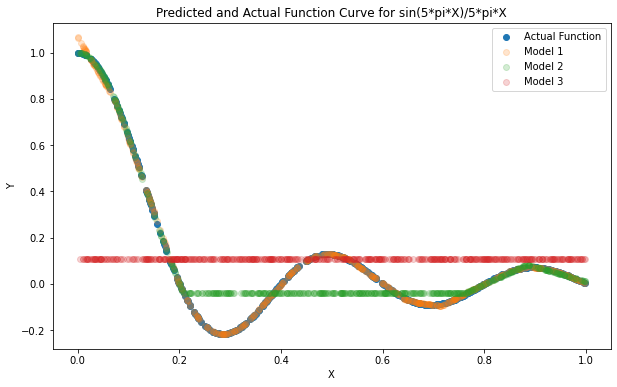

In [27]:
import matplotlib.pyplot as plt

plt_1 = plt.figure(figsize=(10, 6))

plt.title("Predicted and Actual Function Curve for sin(5*pi*X)/5*pi*X")

plt.scatter(ac_x_1[0].flatten(), ac_y_1[0].flatten(), label='Actual Function', alpha=1)
plt.scatter(ac_x_1[0].flatten(), p_y_1[0].flatten(), label="Model 1", alpha=0.2)
plt.scatter(ac_x_2[0].flatten(), p_y_2[0].flatten(), label="Model 2", alpha=0.2)
plt.scatter(ac_x_3[0].flatten(), p_y_3[0].flatten(), label="Model 3", alpha=0.2)
# naming the x axis
plt.xlabel('X')
# naming the y axis
plt.ylabel('Y')
plt.legend()
 
# giving a title to my graph
 
# function to show the plot
plt.show()

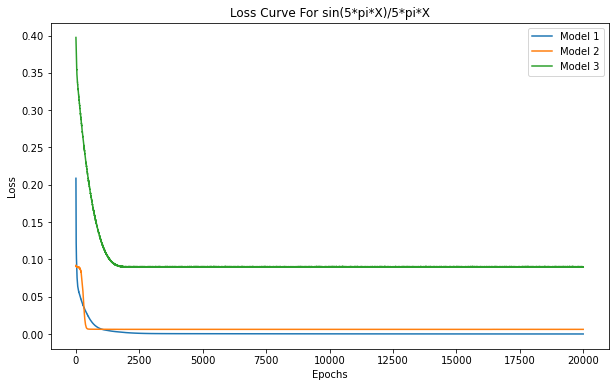

In [21]:
# plotting the points
plt_1 = plt.figure(figsize=(10, 6))
plt.title("Loss Curve For sin(5*pi*X)/5*pi*X")
plt.plot(np.array(t_ls_1), label="Model 1")
plt.plot(np.array(t_ls_2), label="Model 2")
plt.plot(np.array(t_ls_3), label="Model 3")
 
# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Loss')

plt.legend()
 
plt.show()